In [1]:
import pygad


In [2]:
__author__ = 'Anastasia Tsvetkova'
__email__  = 'tsvetkova.lea@gmail.com'

import os
import sys
import yaml, h5py
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style('darkgrid')

#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

#%config InlineBackend.figure_format='retina' # very useful command for high-res images
#%matplotlib inline

SEED=1998
def fix_all_seeds(seed):
    """Fix randomness. Usage: fix_all_seeds(42)"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.cuda.manual_seed_all(seed)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark     = True
fix_all_seeds(SEED)

In [3]:
# set the username for the path of the files:
#user='LB'
#user='AF'
#user='MM'
#user='bach
user='romano'

if user=='bach':
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/statistical_test')
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='LB':
    sys.path.append('/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/statistical_test')
    sys.path.append('/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='AF':
    sys.path.append('.../lc_pulse_avalanche/statistical_test')
    sys.path.append('.../lc_pulse_avalanche/lc_pulse_avalanche')
elif user=='MM':
    sys.path.append('/home/manuele/Documents/university/grbs/geneticgrbs/statistical_test')
    sys.path.append('/home/manuele/Documents/university/grbs/geneticgrbs/lc_pulse_avalanche')
elif user == 'romano':
    sys.path.append('/astrodata/romain/sde_GA/geneticgrbs_v2/statistical_test')
    sys.path.append('/astrodata/romain/sde_GA/geneticgrbs_v2/lc_pulse_avalanche')
else:
    raise ValueError('Assign to the variable "user" a correct username!')

#from geneticgrbs_v2 import statistical_test
from statistical_test import *
#from sde import LC, Restored_LC
from sde import *

### Let's generate several light curves

In [5]:
# def brownian2(n, dt, q):
#             # For each element of x0, generate a sample of n numbers from a
#             # normal distribution.
#             r = stats.norm.rvs(size=n, scale=np.sqrt(q*dt))
#             # This computes the Brownian motion by forming the cumulative sum of
#             # the random samples. 
#             beta= np.cumsum(r, axis=0)
#             return beta

In [6]:
#  def generale_lc_from_solution_SDE_without_norm(q,a,alpha,k,t_0,alpha_bpl,beta_bpl,F_break,F_min,gam,times):
#             #norm_A = generate_peak_counts(self.generated_fluence, self.k_values)
#             #norm_A = np.float64(norm_A)
#             #print("norm=",norm_A)
#             #print("q=",q,"a=",a,"alpha=",alpha,"k=",k)
#             n=len(times)
#             dt=times[1]-times[0]
#             beta = brownian2(n,dt,q)
#             return 100*times**(alpha)*np.exp(-a*times)*np.exp(-k*(times/t_0)**(gam))*np.exp(beta)

In [24]:
# old version with X_0>1e2
# q       = 0.33   
# a = q/2
# alpha     = 3.71   
# k    = 0.09   
# t_0    = 5.96   
# norm     = 2210444.48   
# n_cut=250

#new version with X_0>1e2
q = 0.33 
alpha = 2.71 
k = 3.02 
t_0 = 37.6 
norm = 156.24 


ncurves=2000
SNs=np.zeros(ncurves)

In [25]:
2210444.48/150

14736.296533333334

/tmp/ipykernel_1864059/2644843839.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,10))


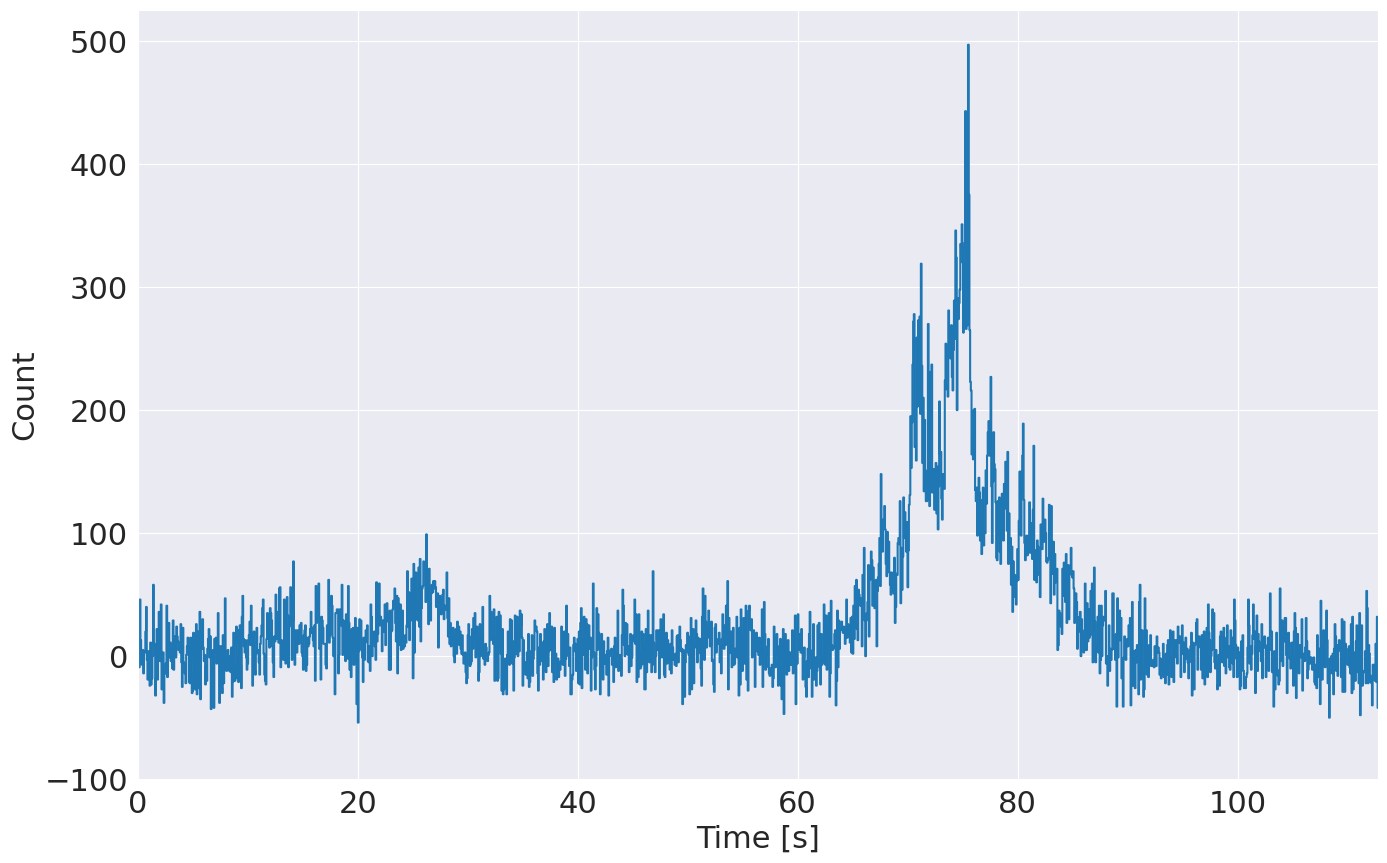

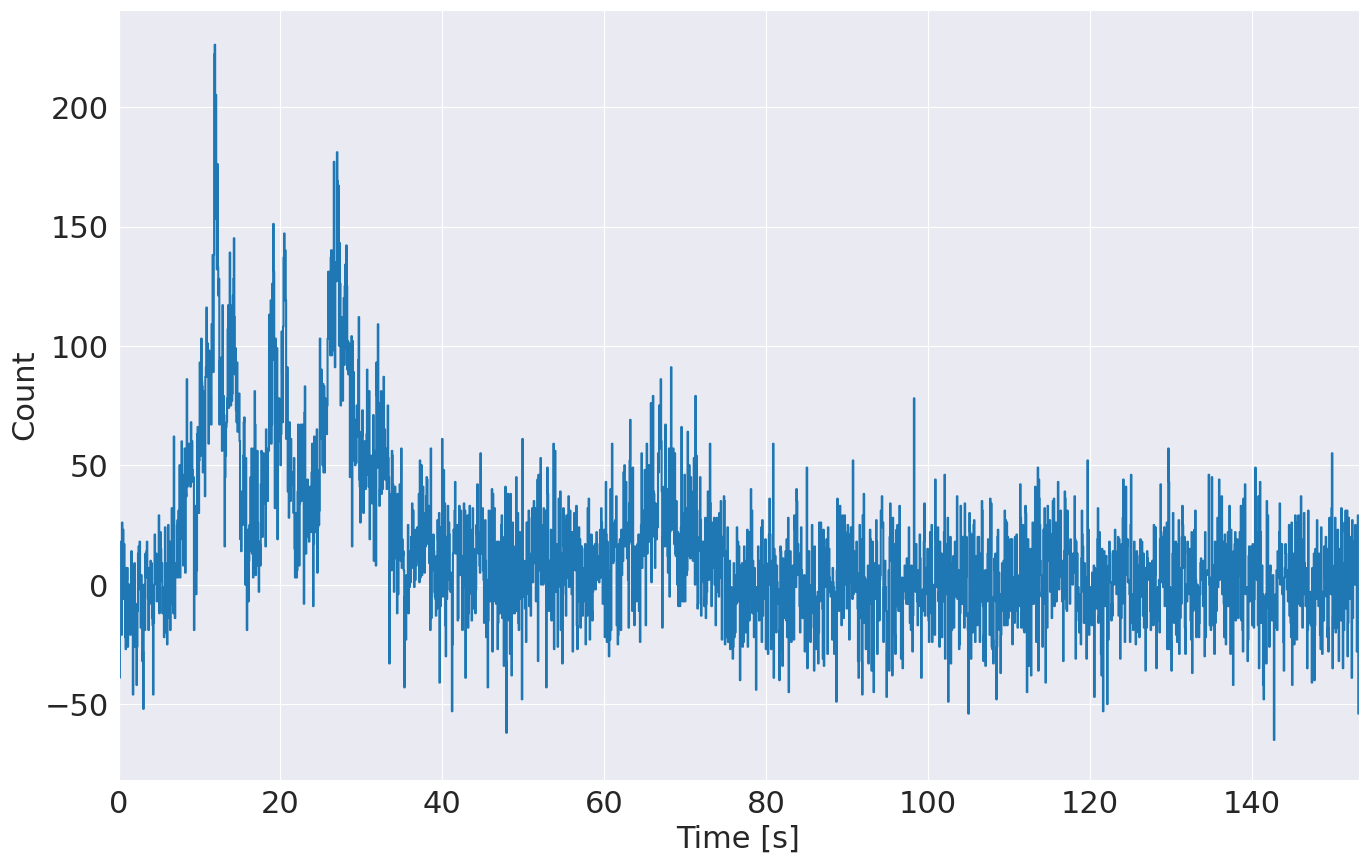

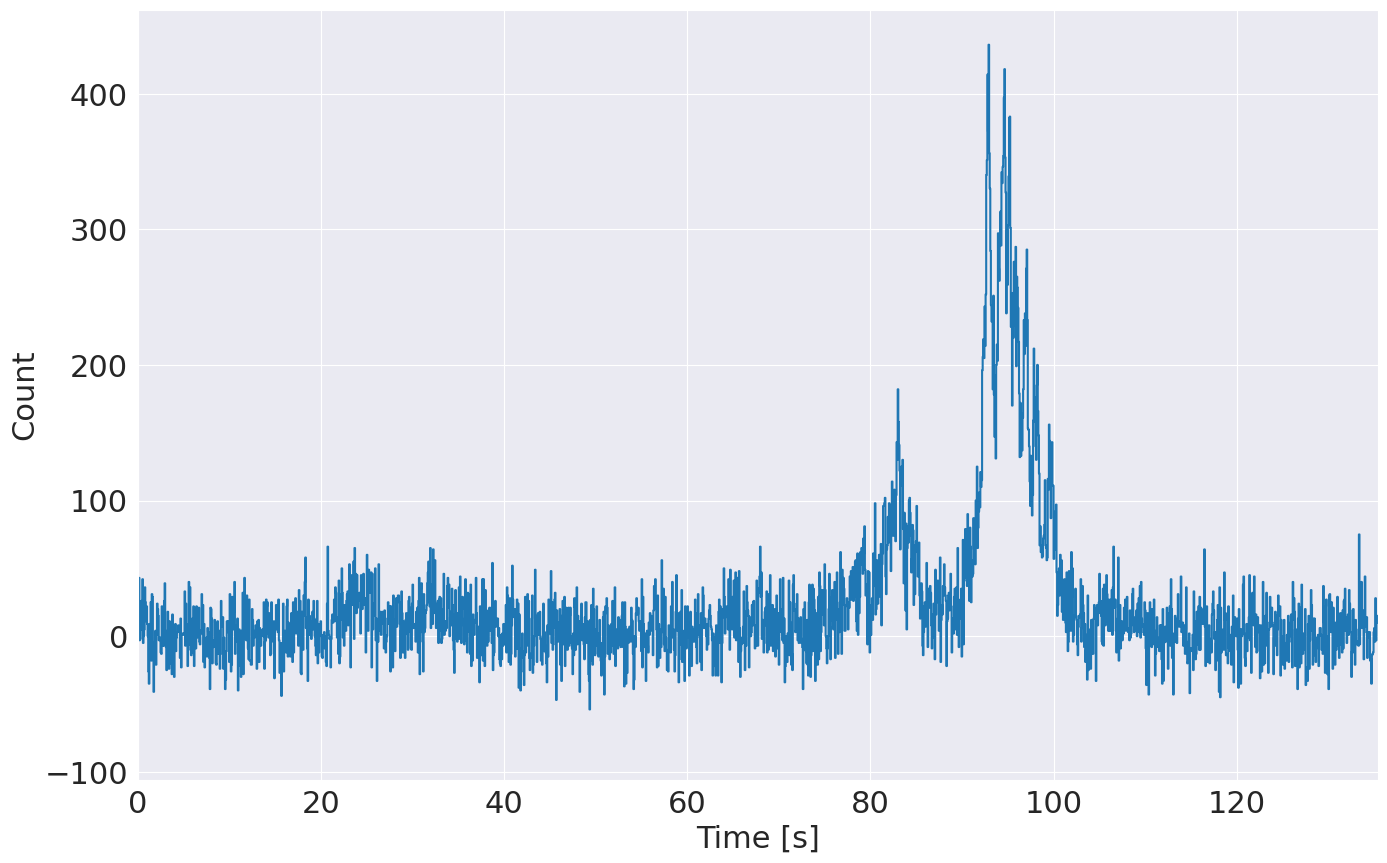

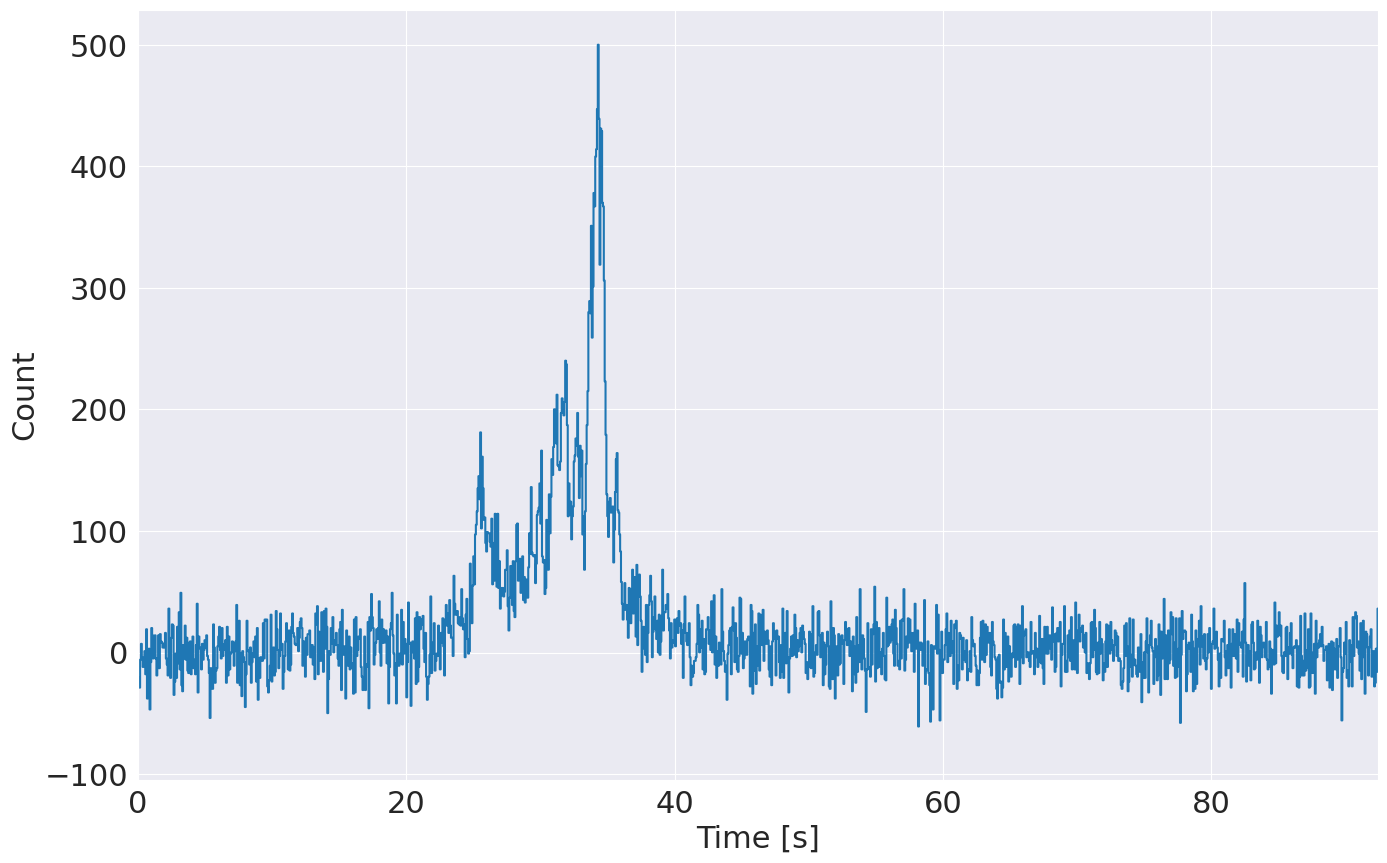

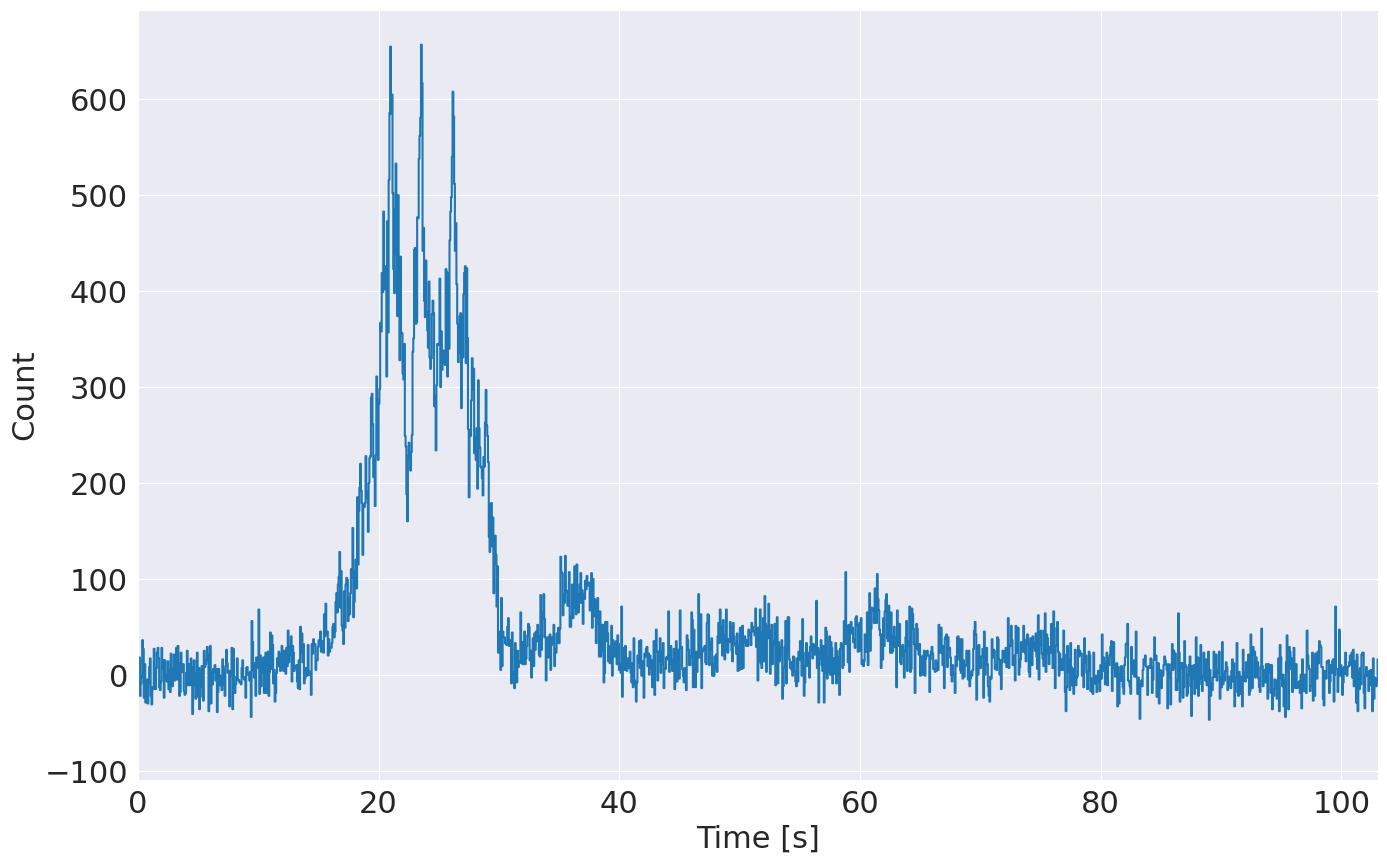

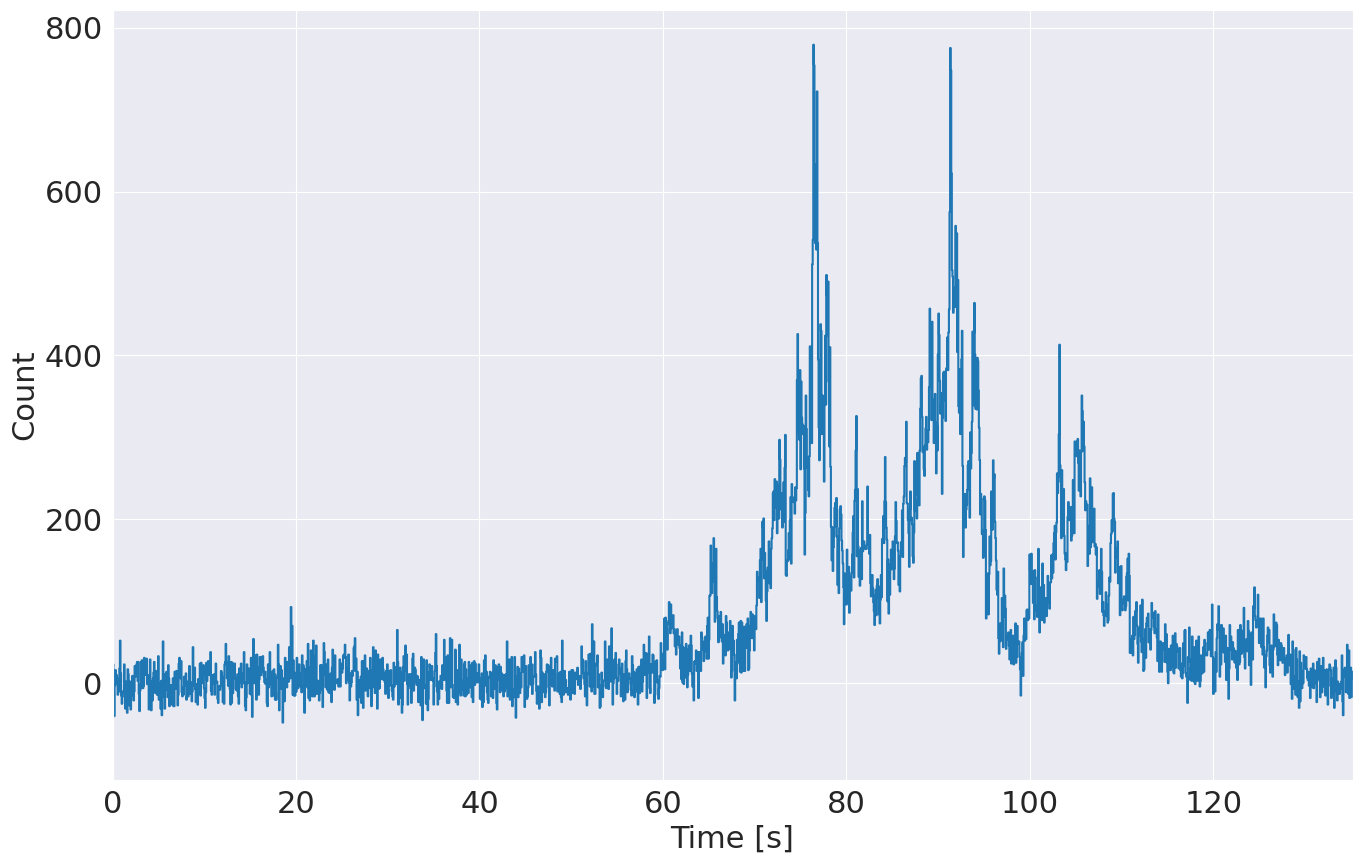

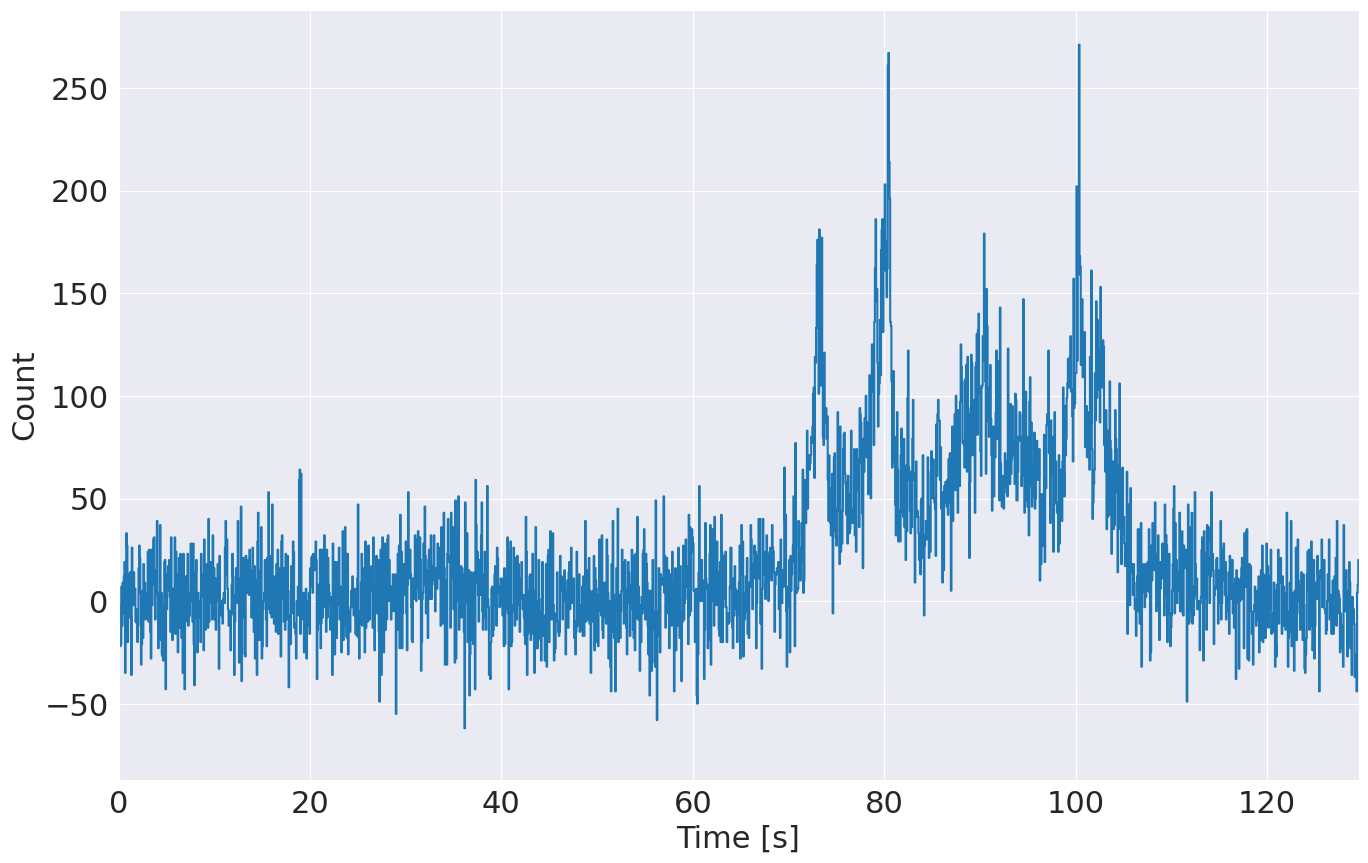

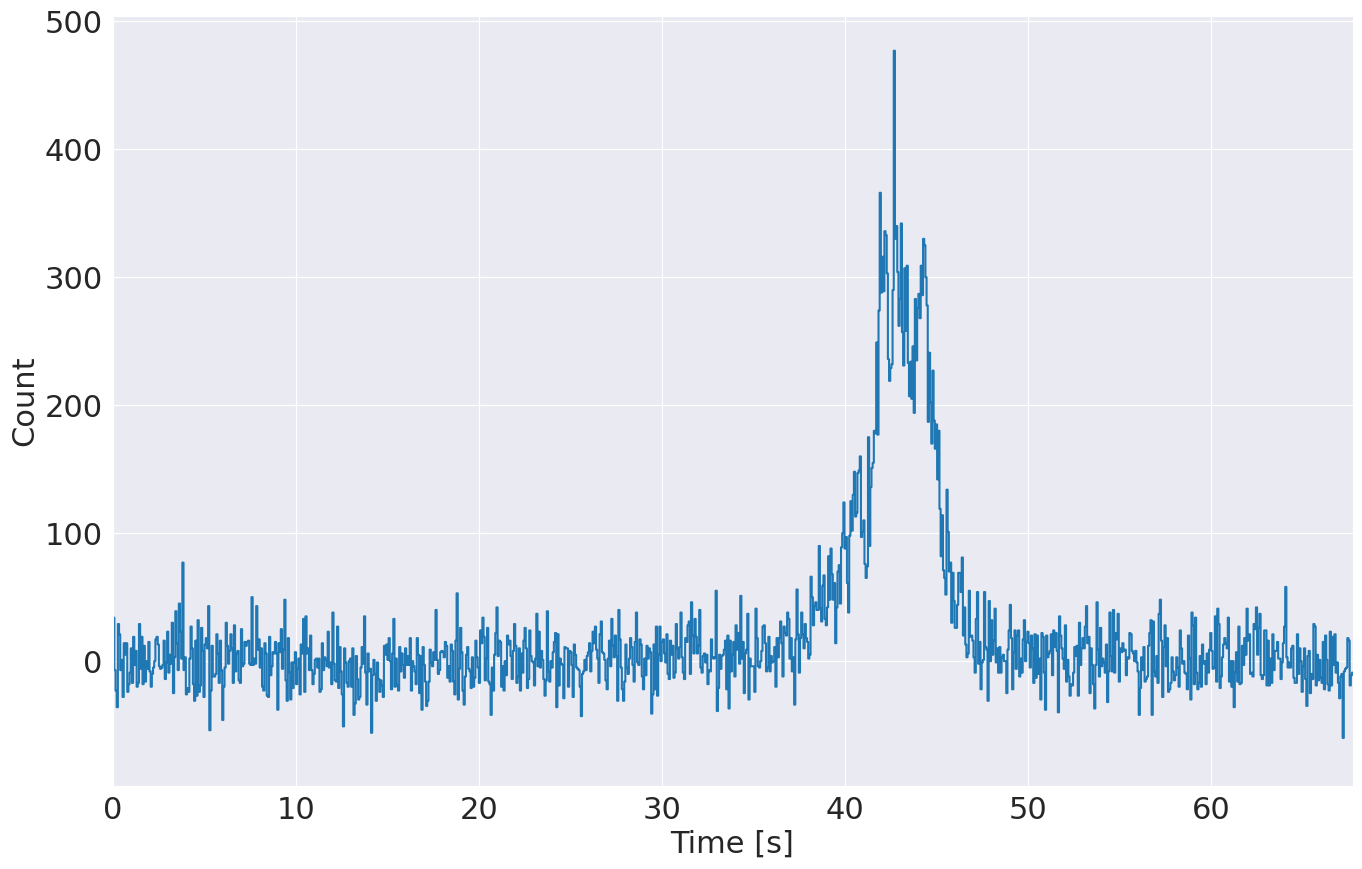

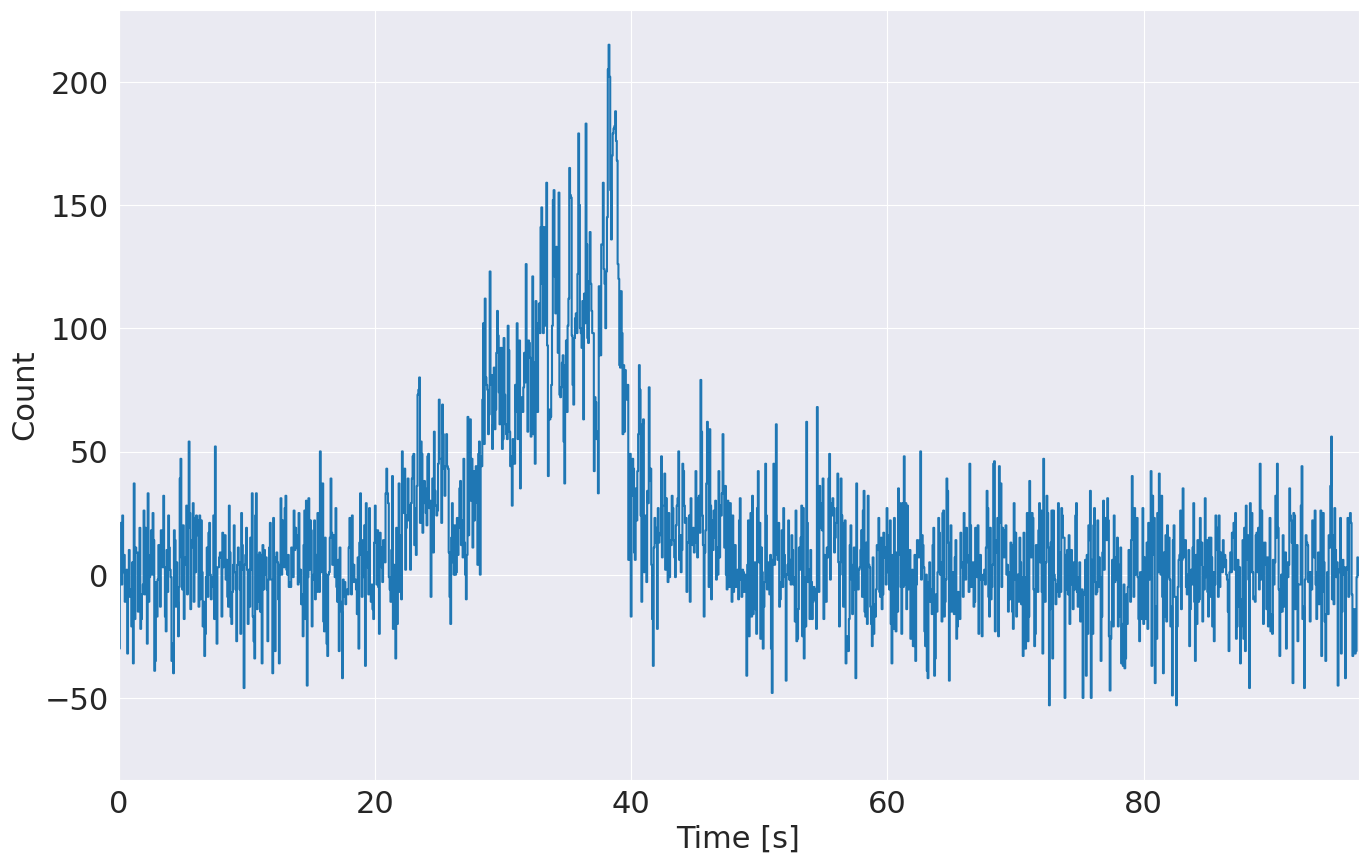

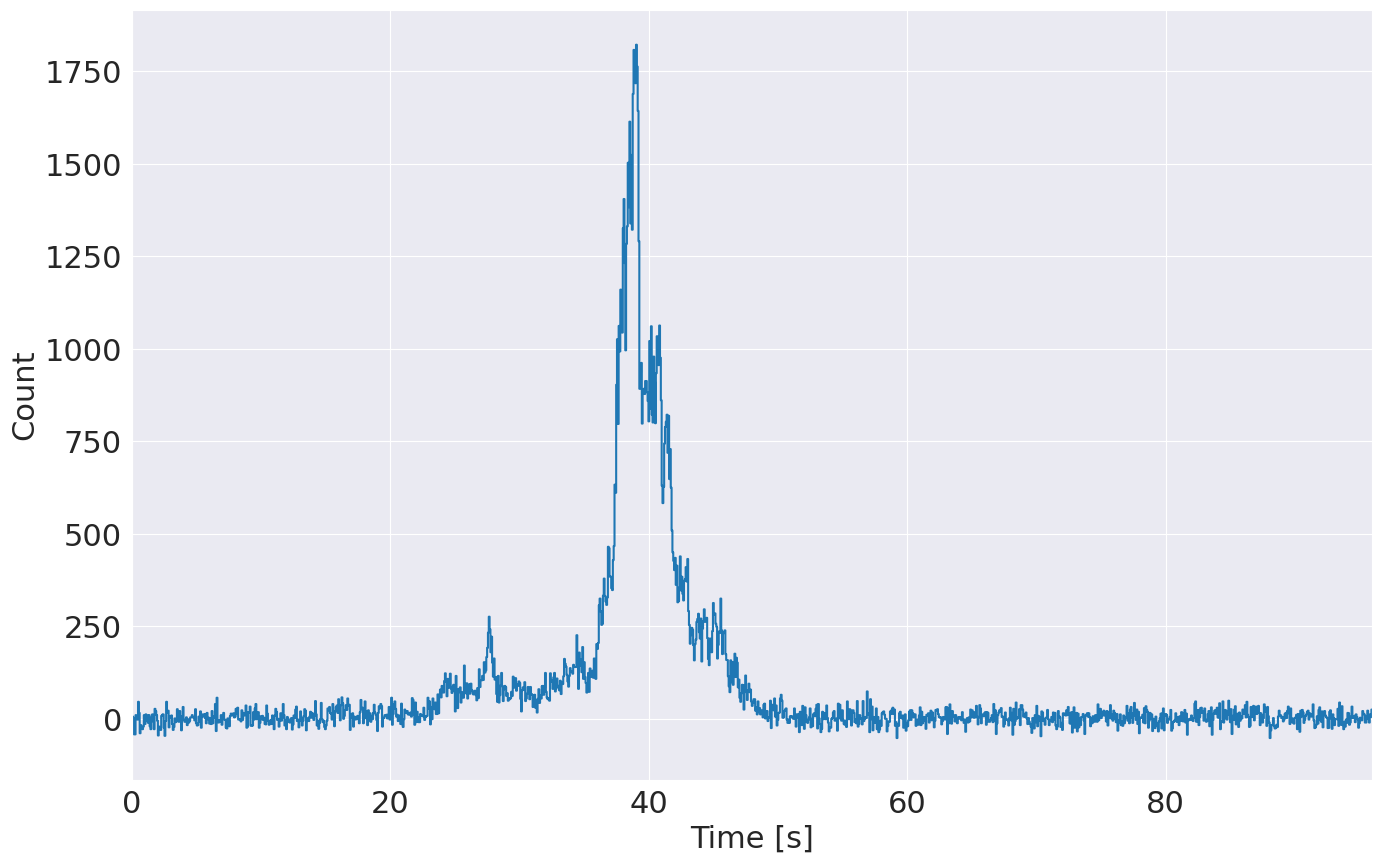

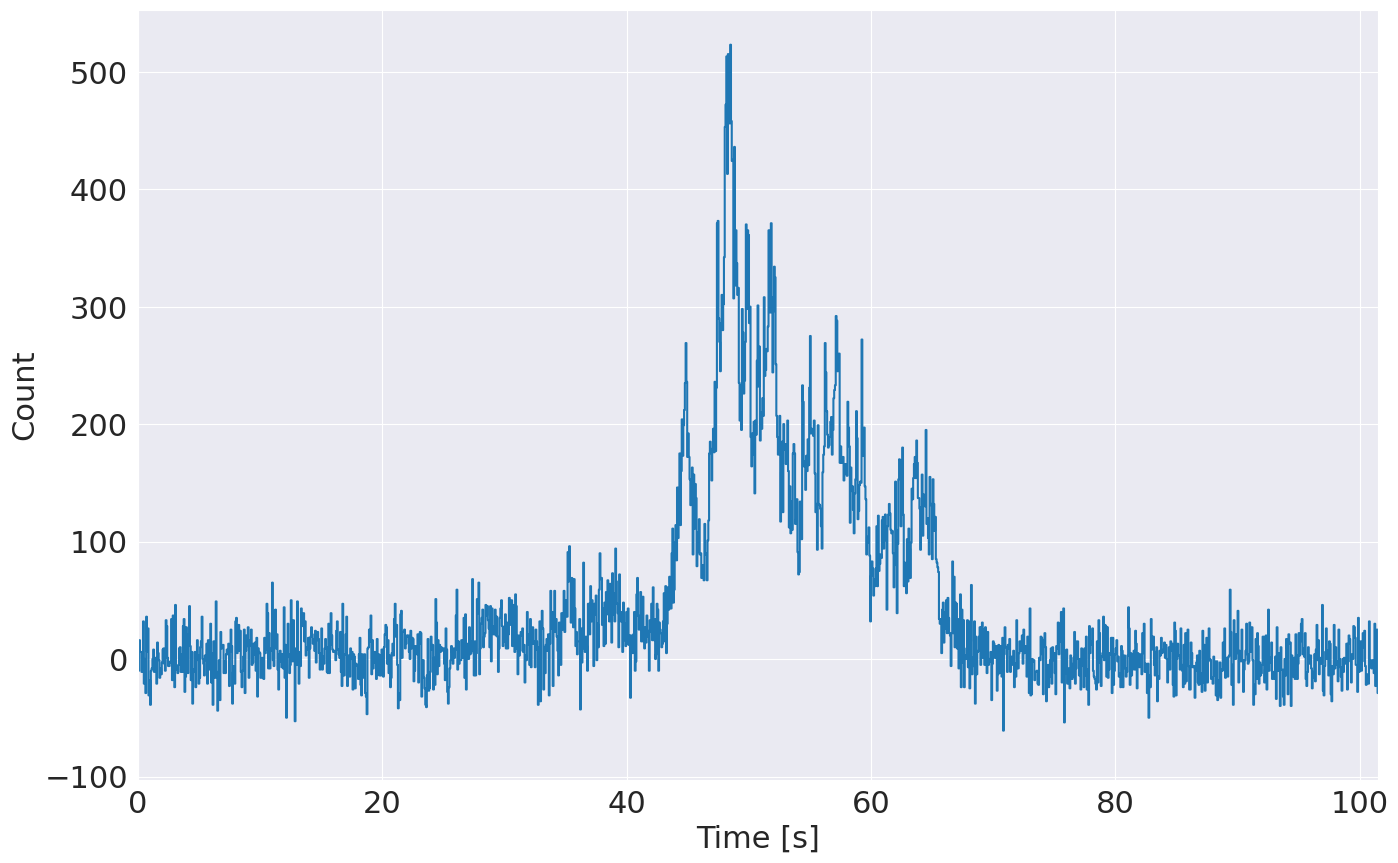

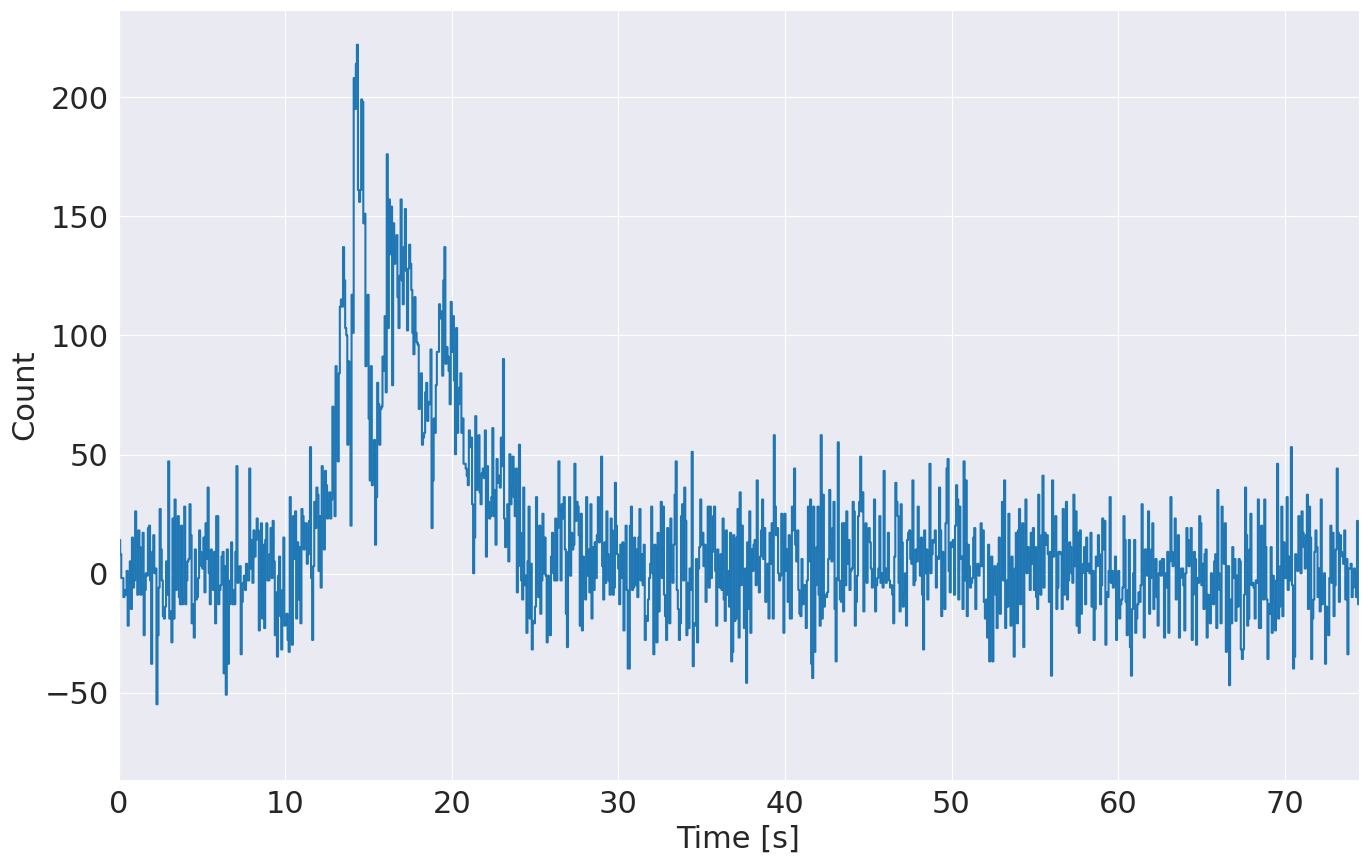

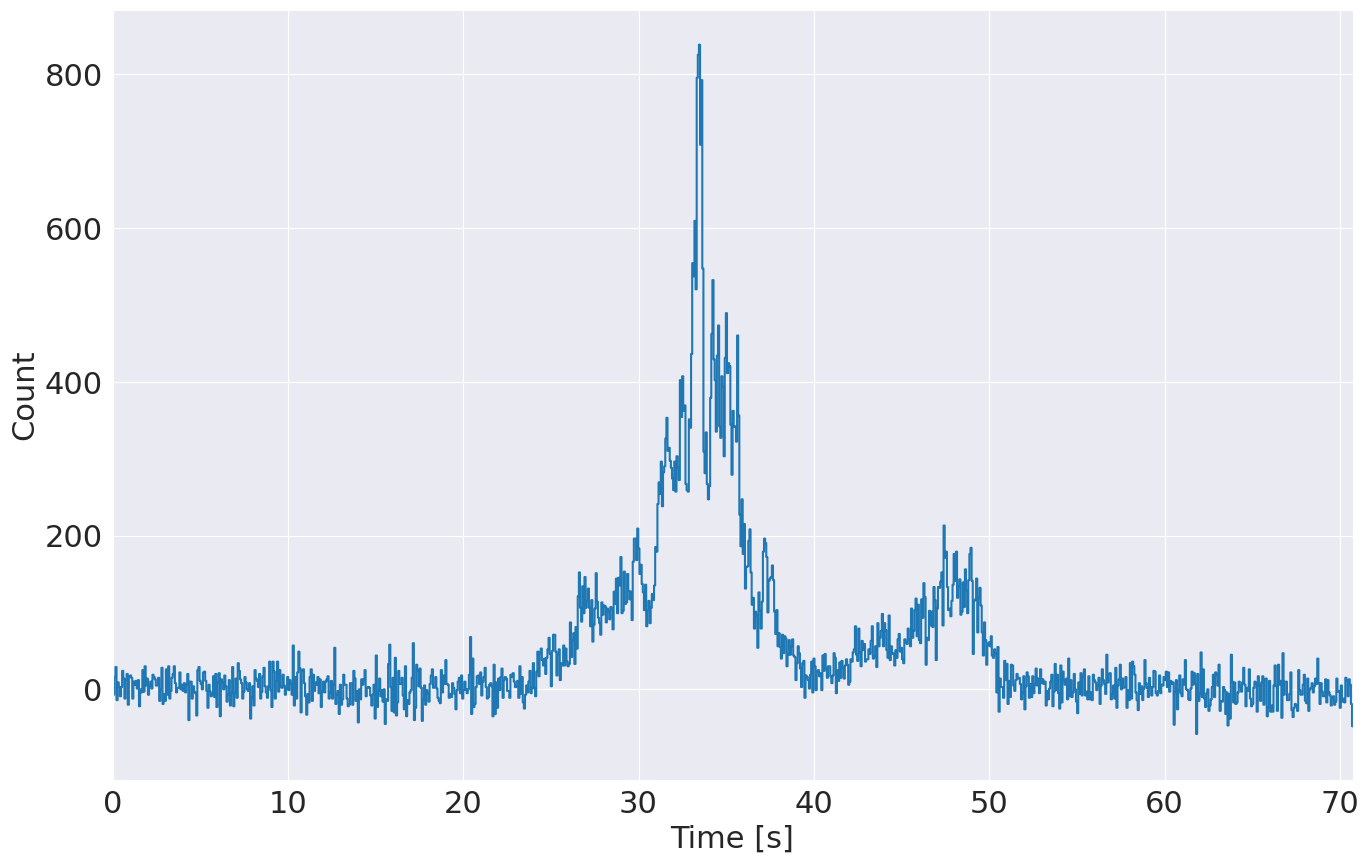

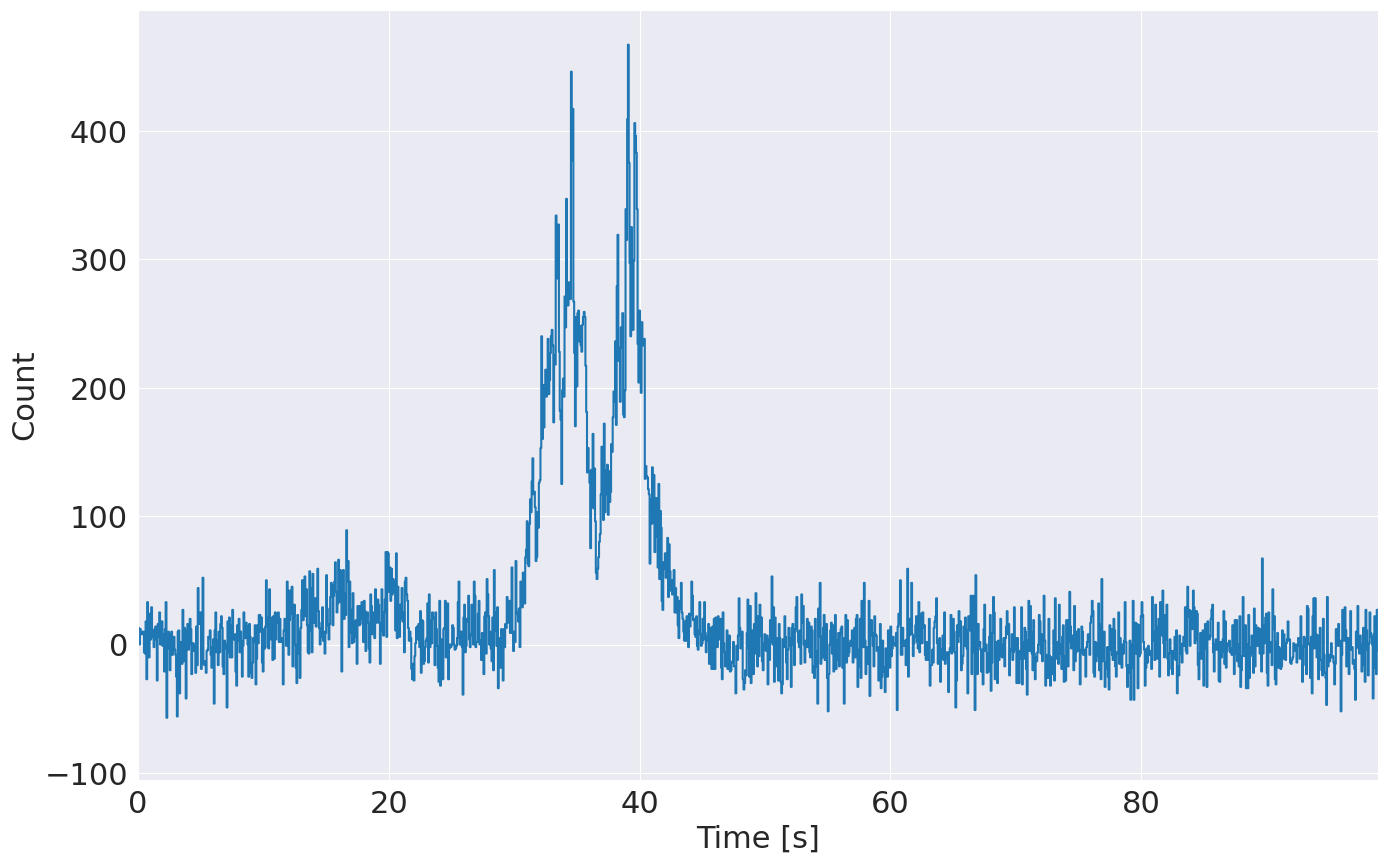

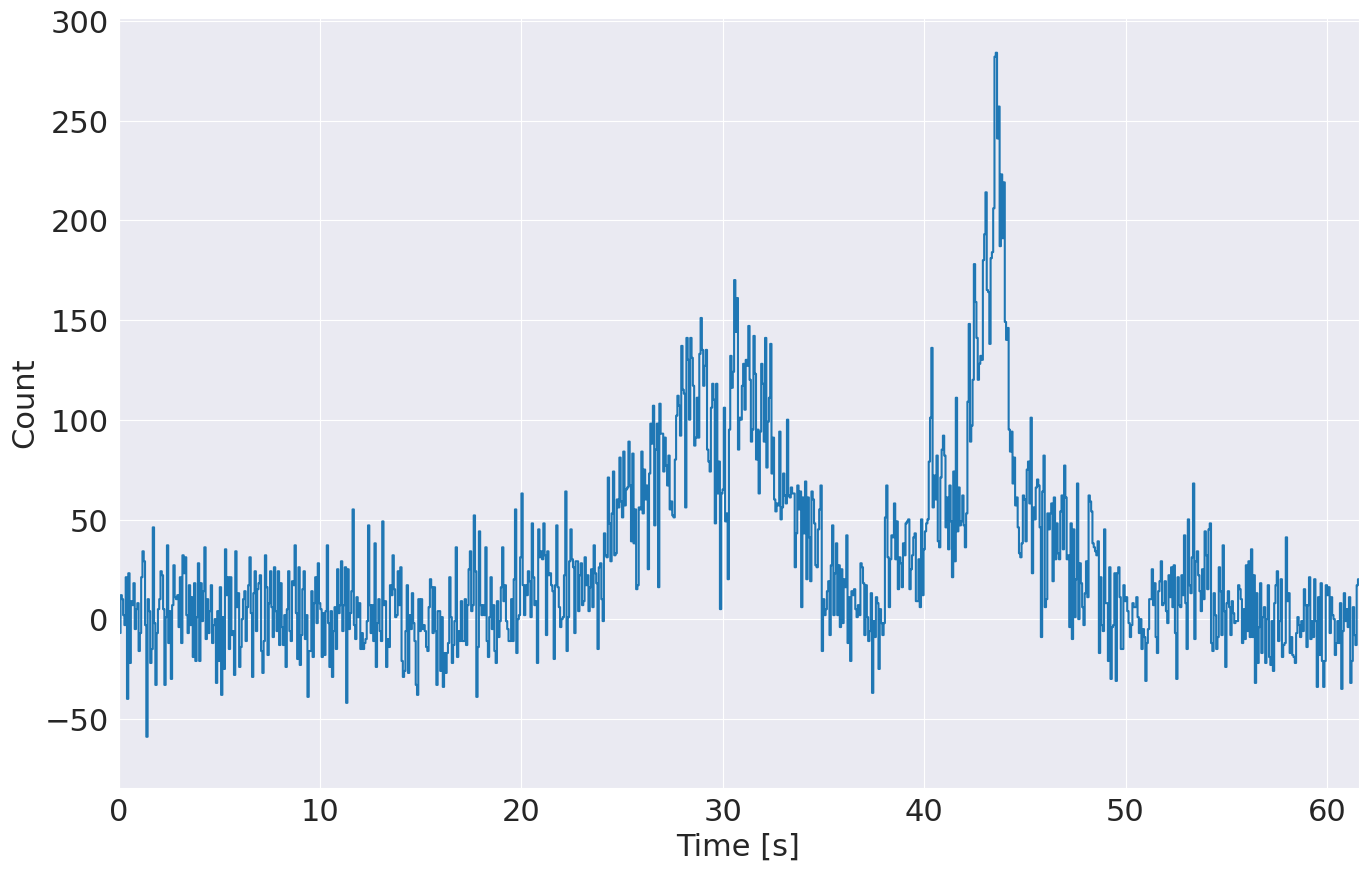

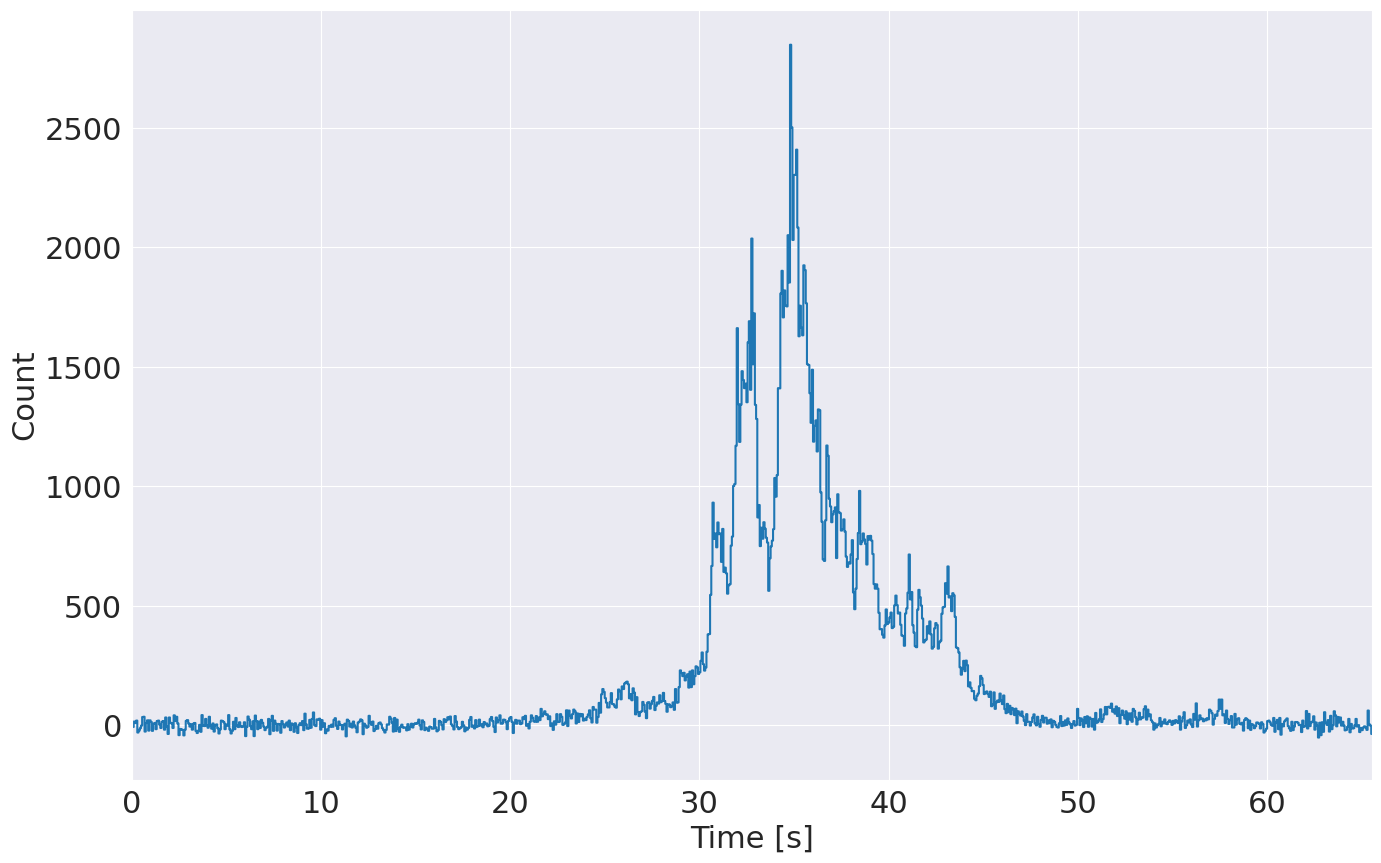

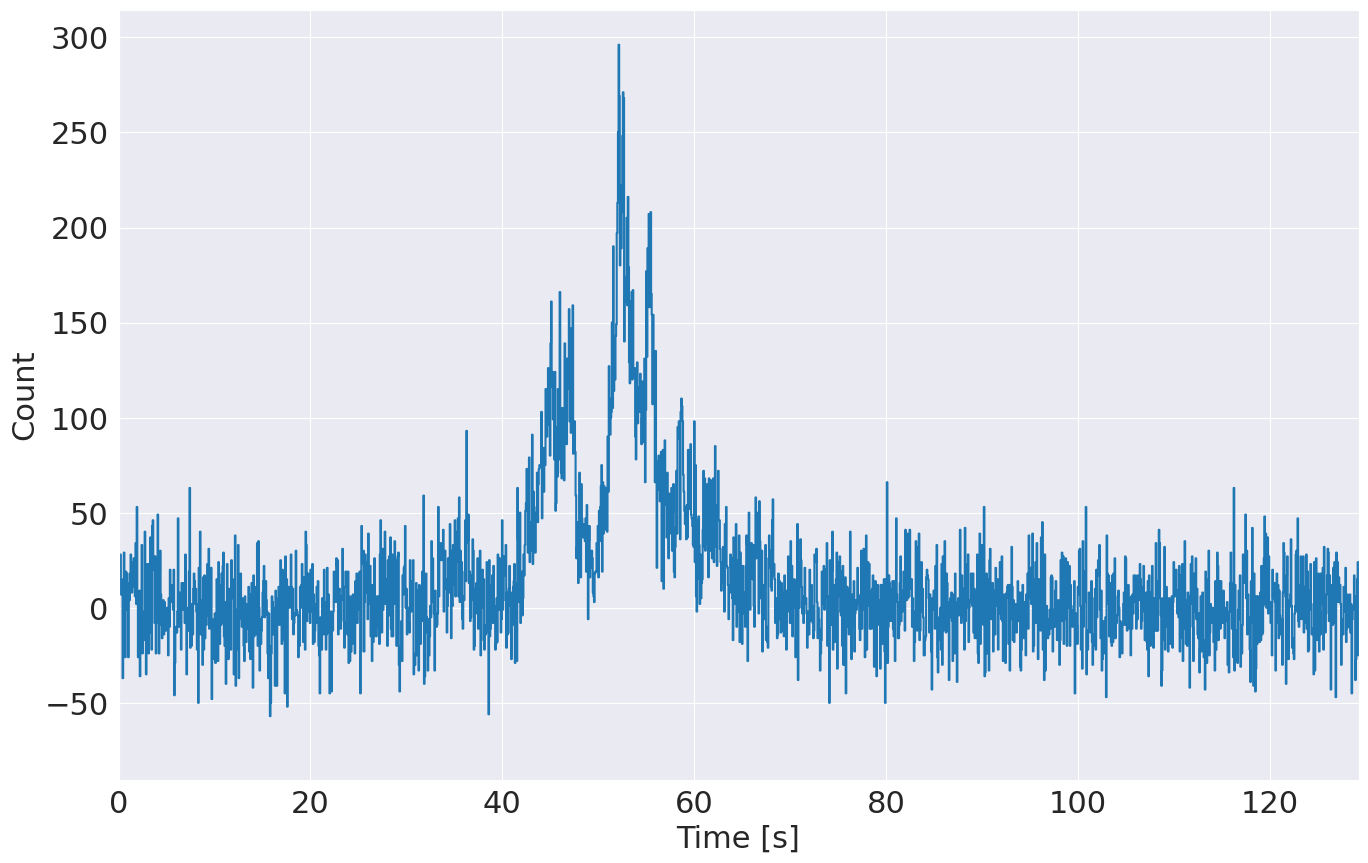

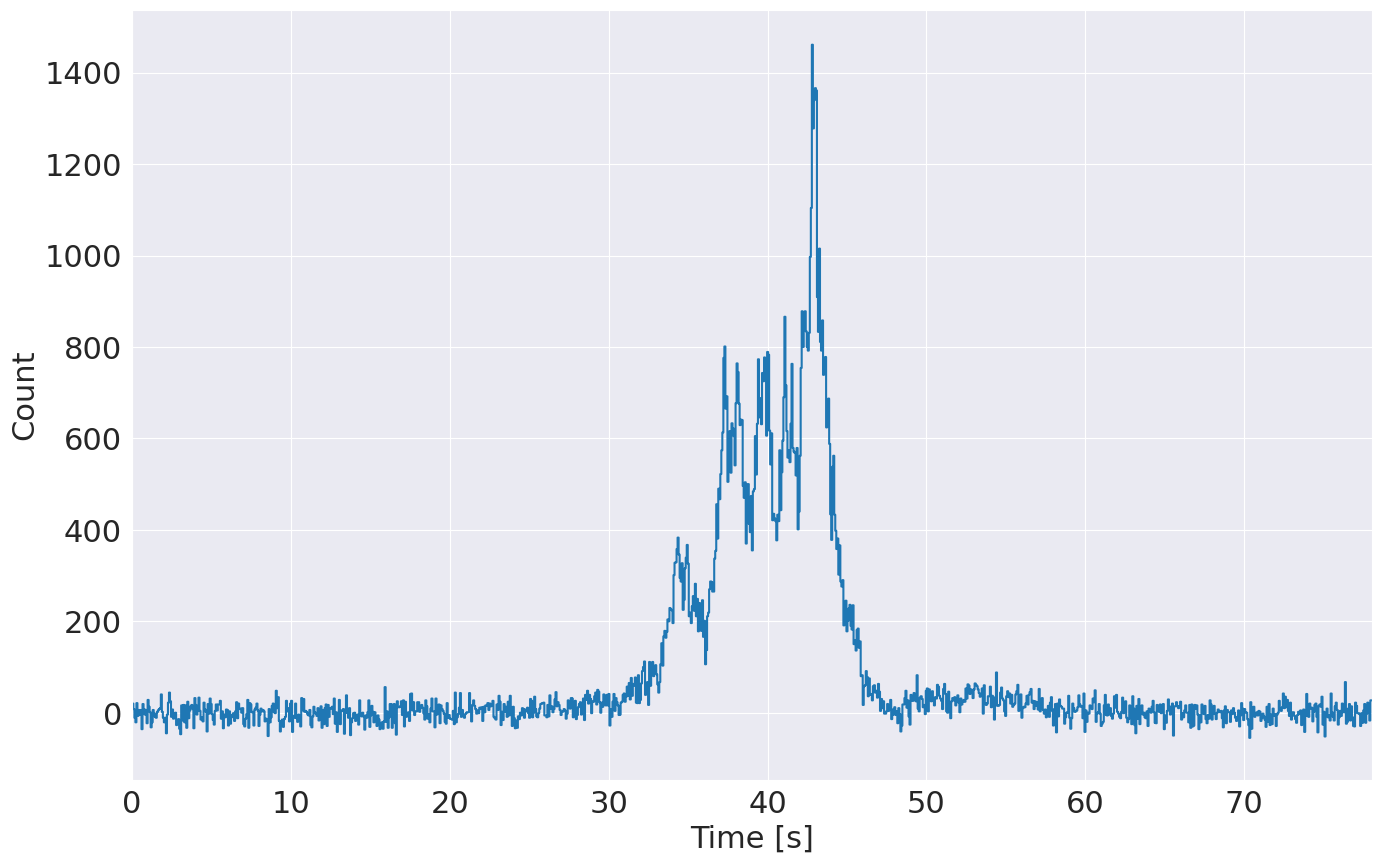

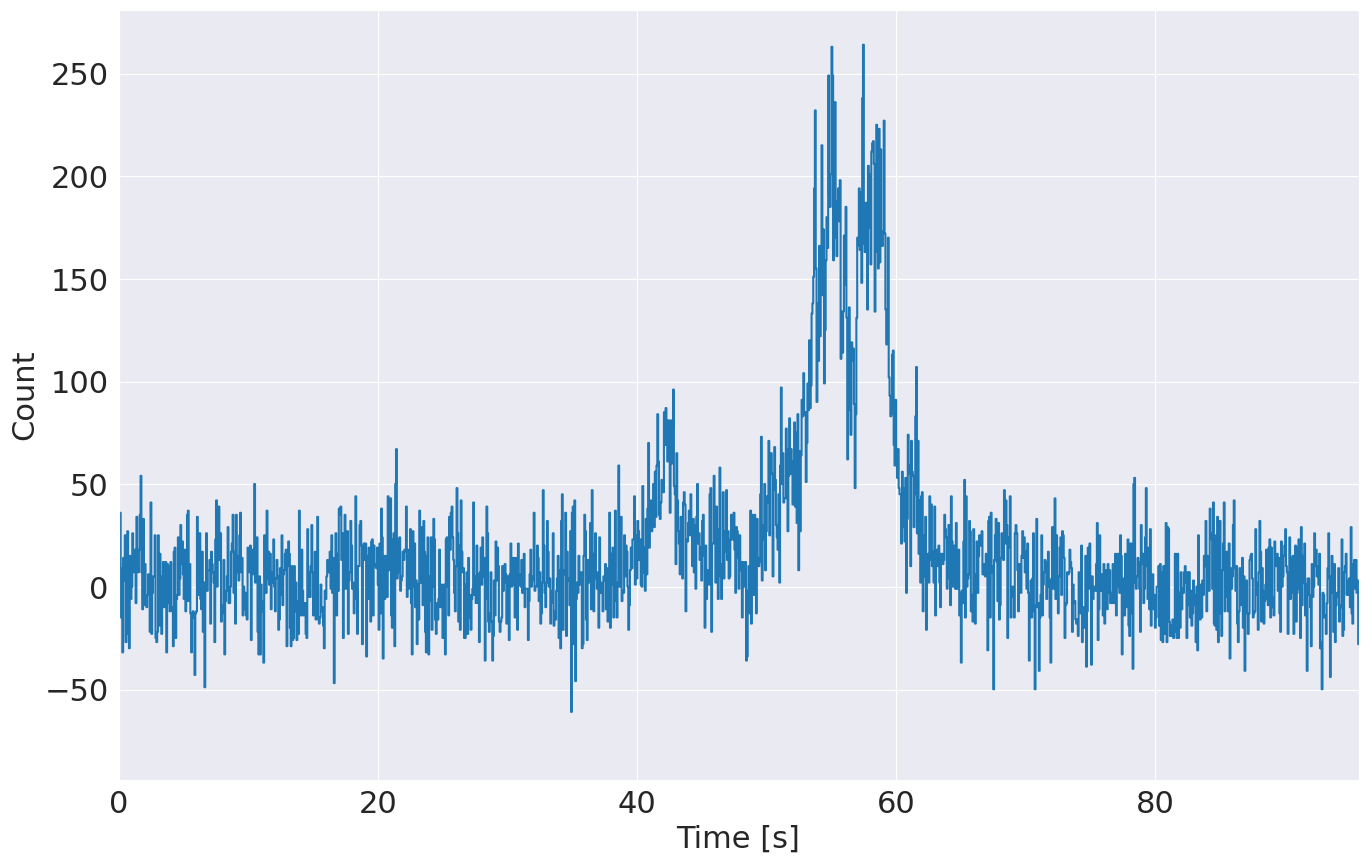

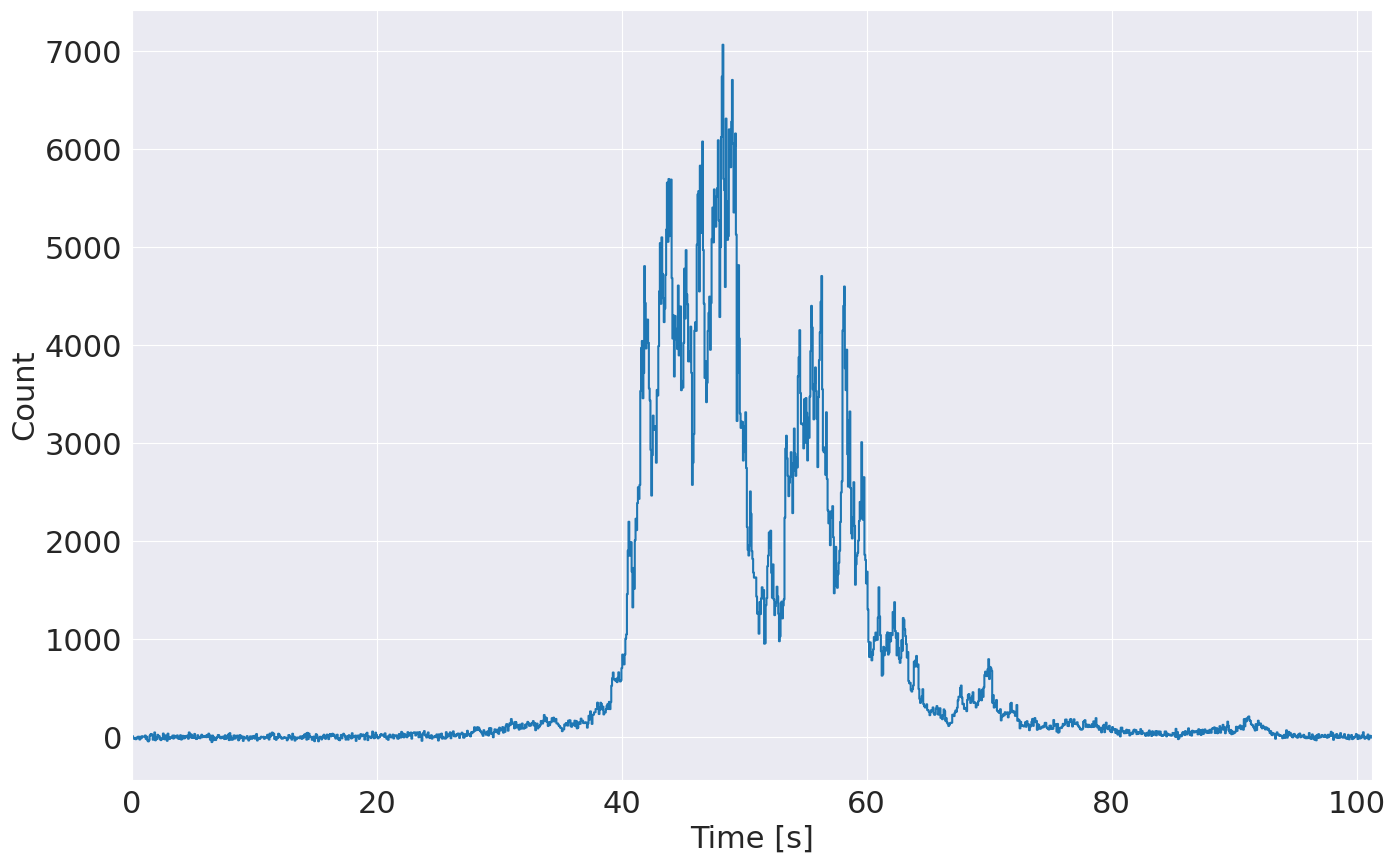

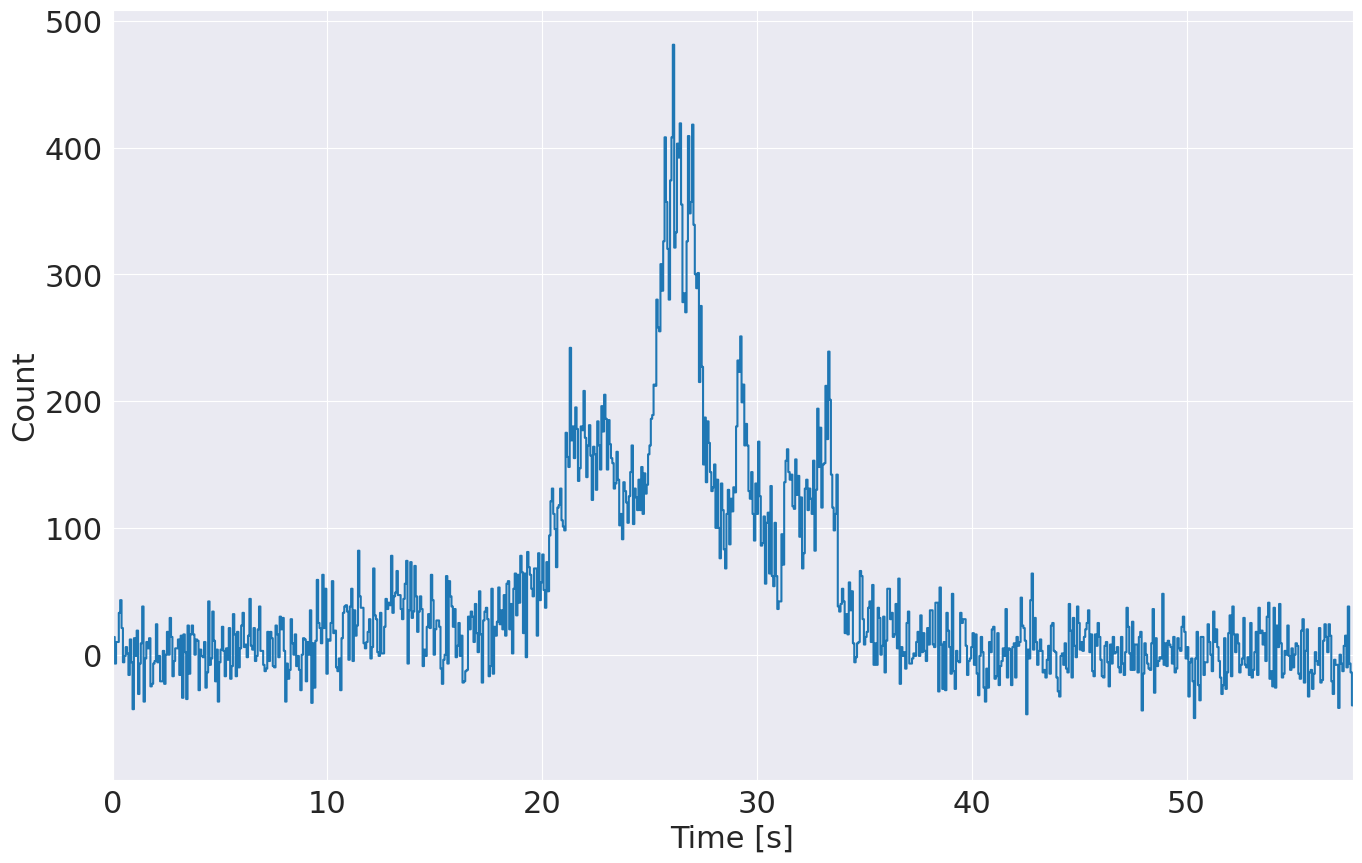

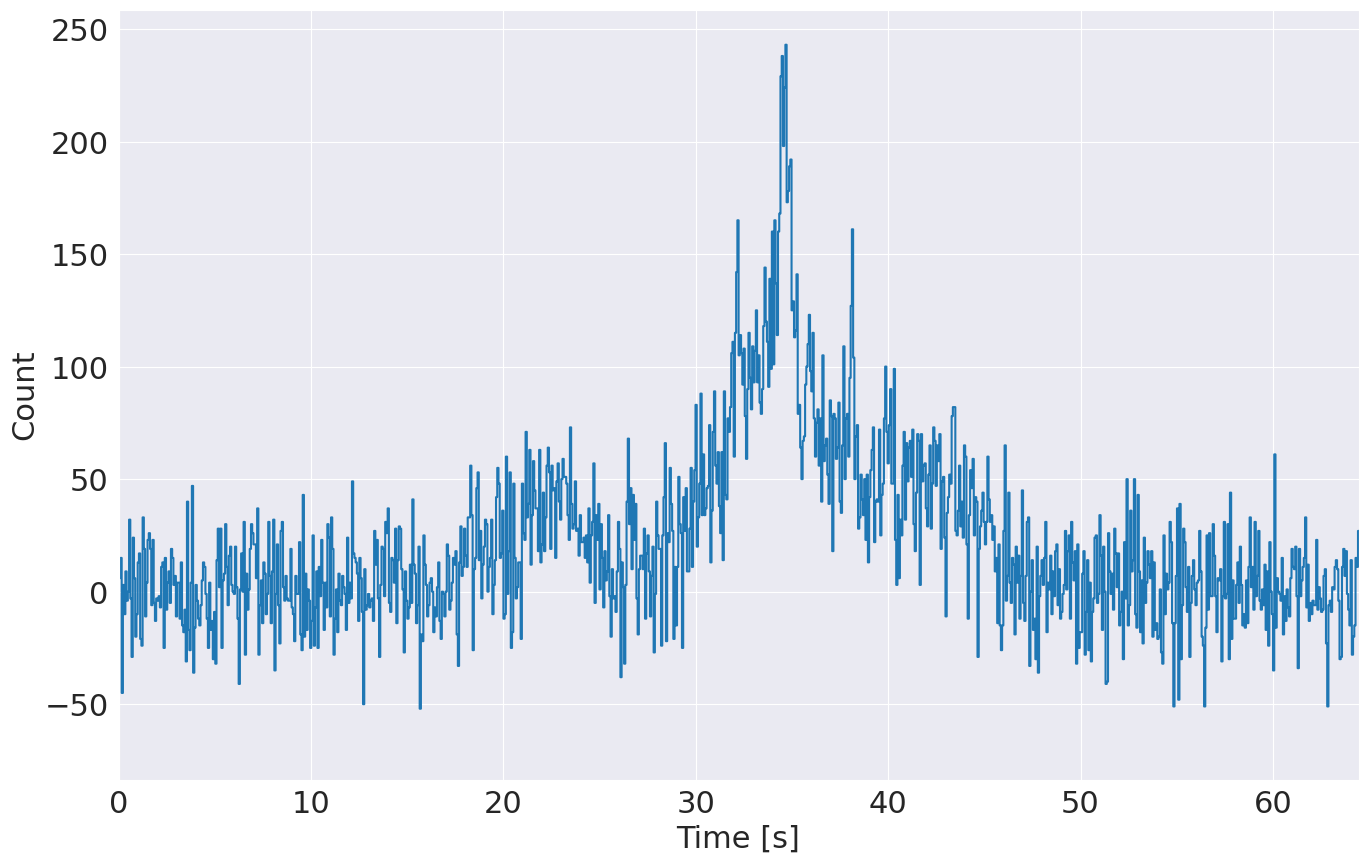

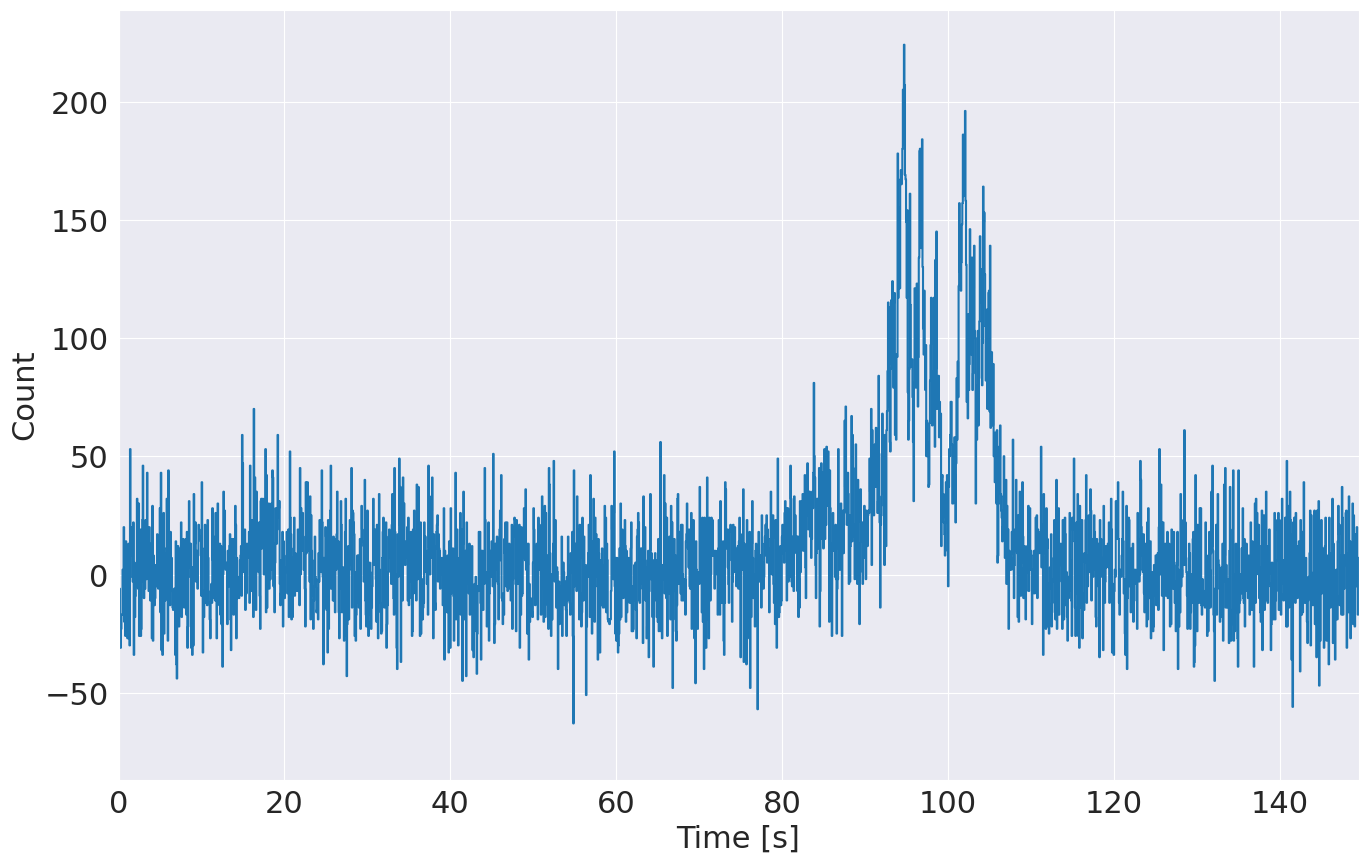

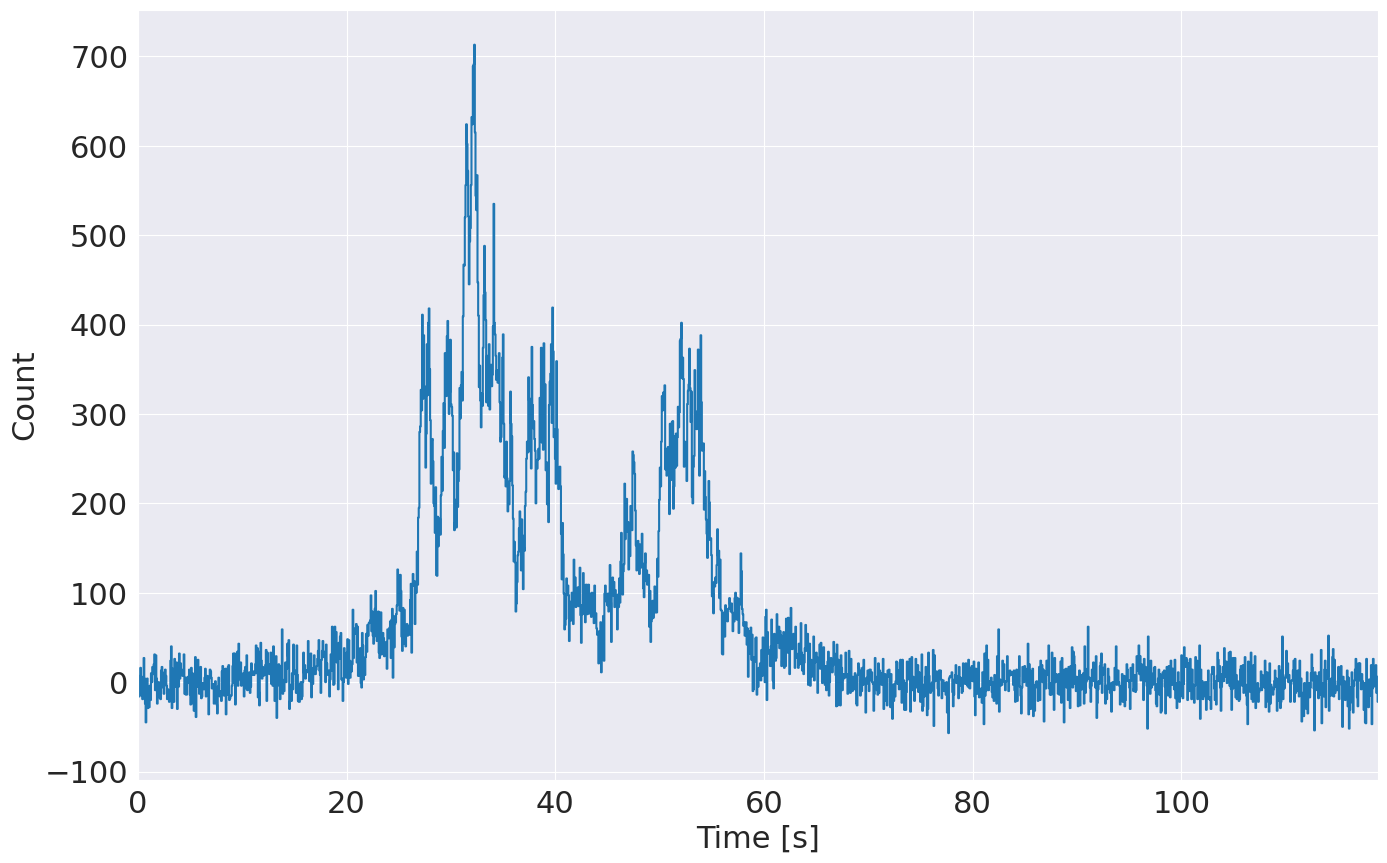

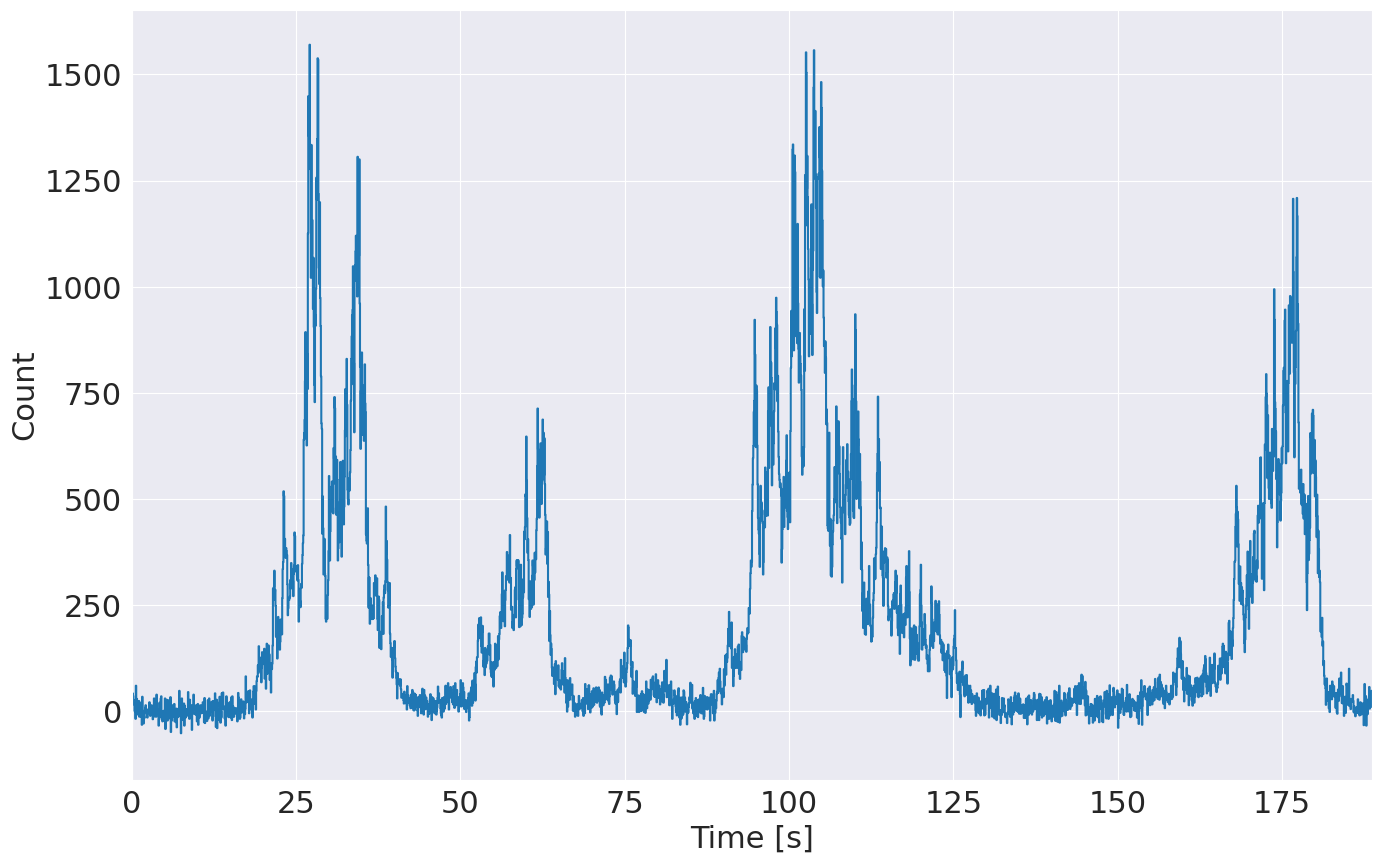

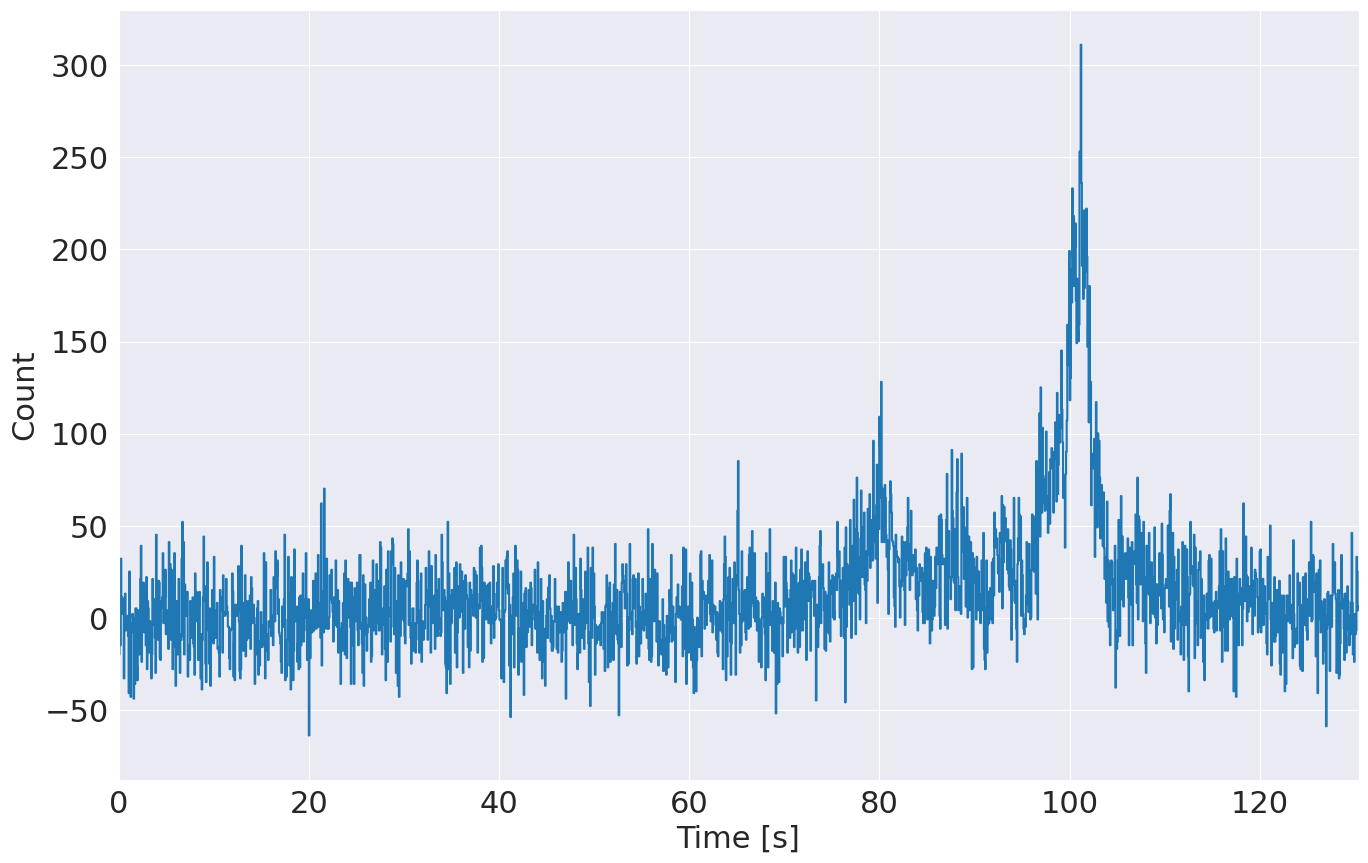

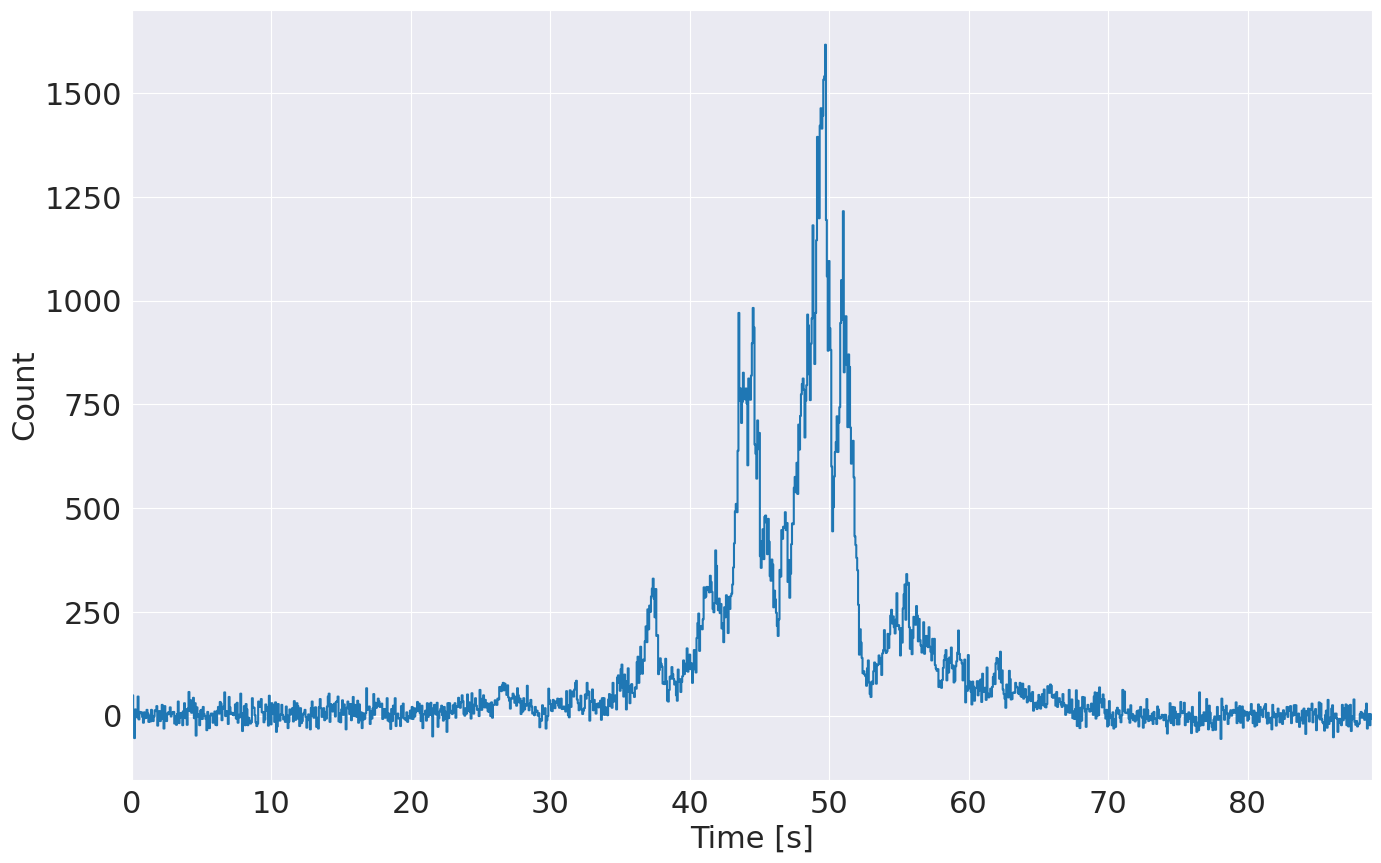

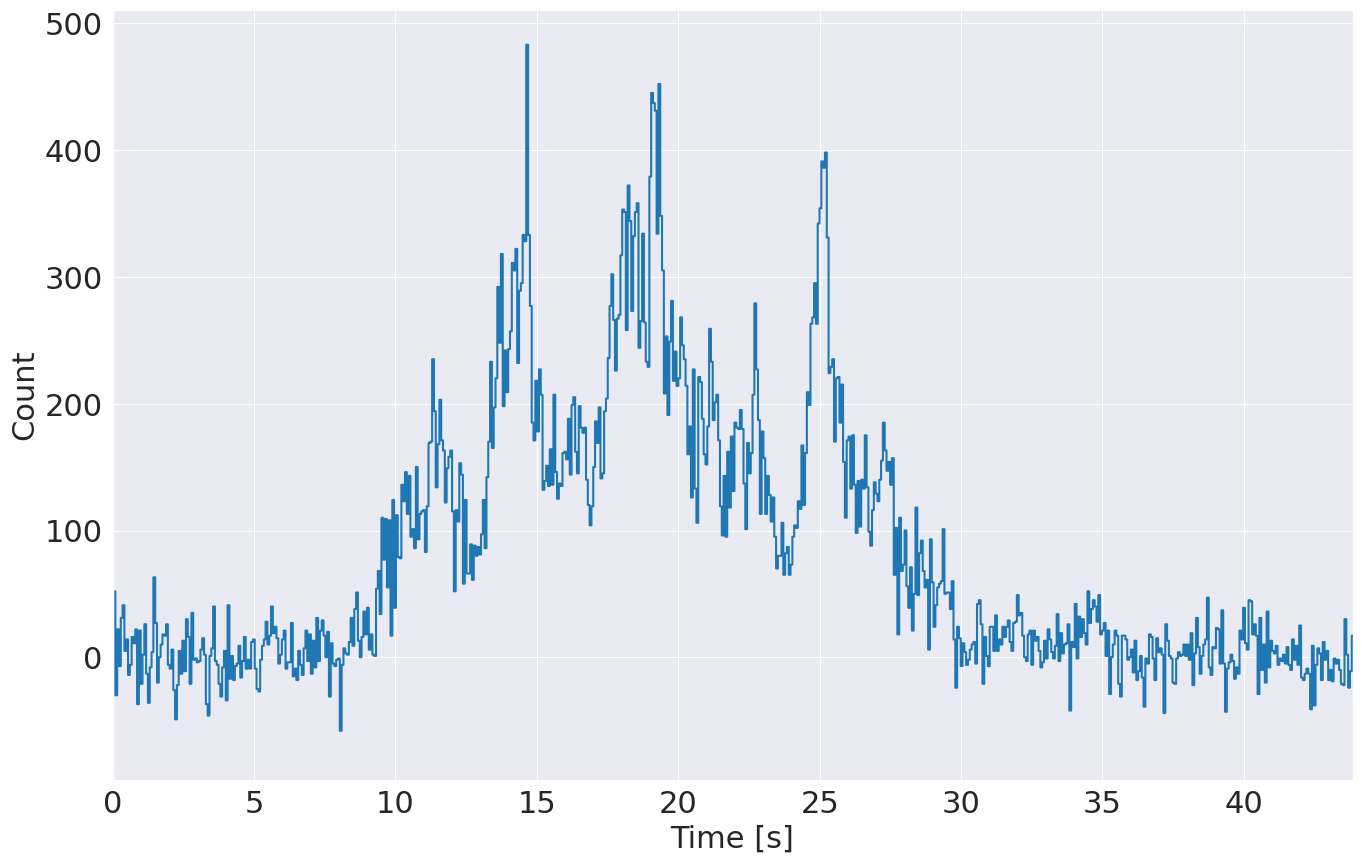

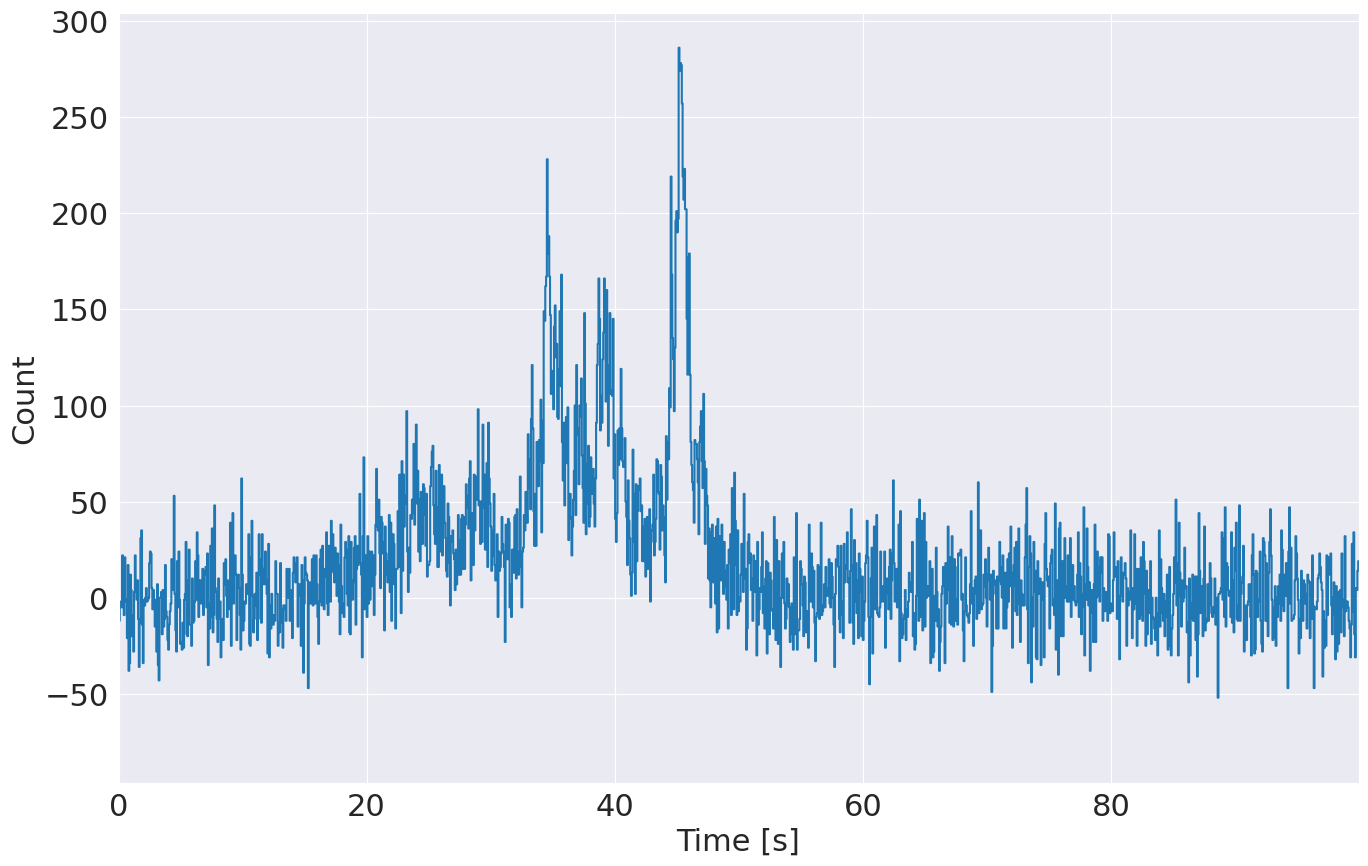

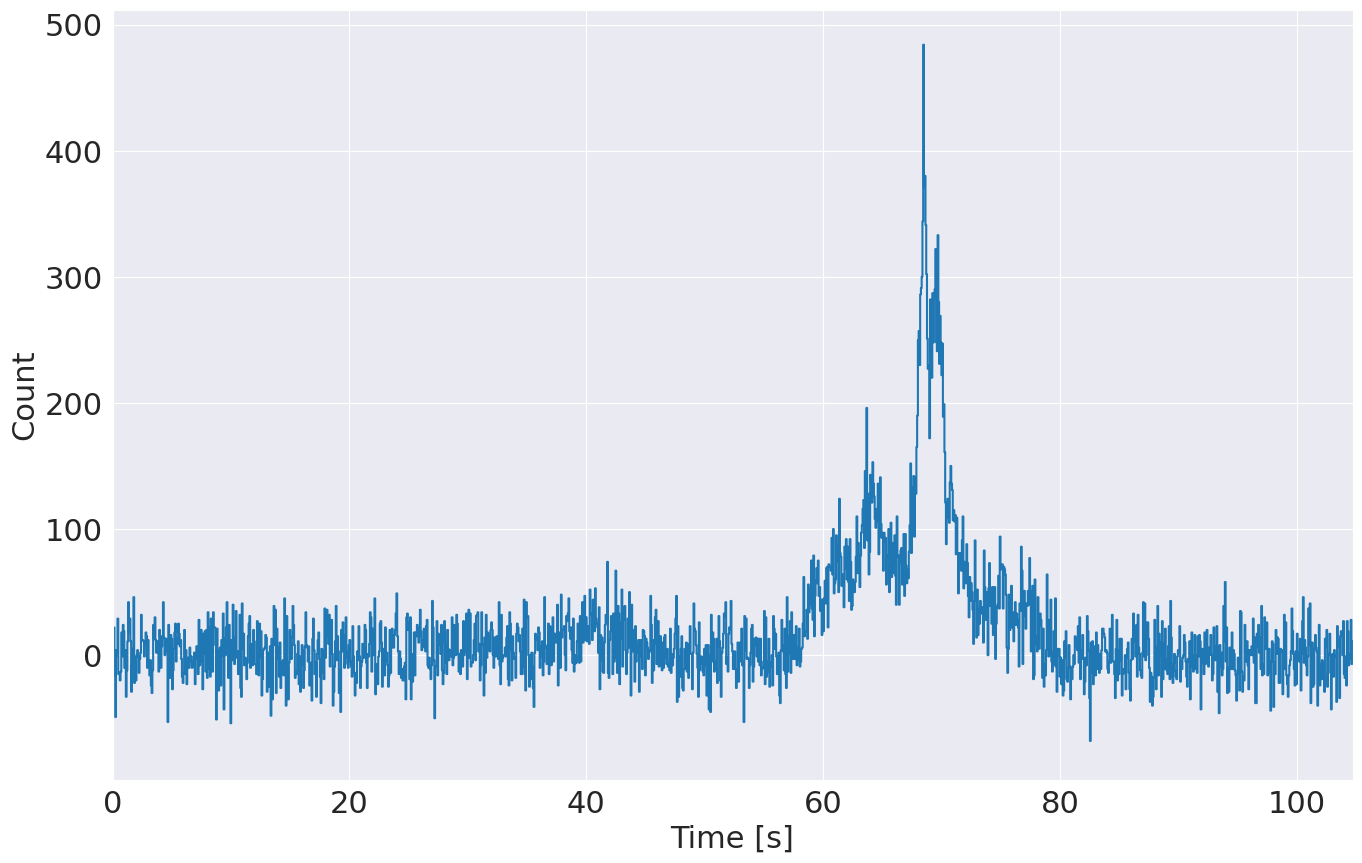

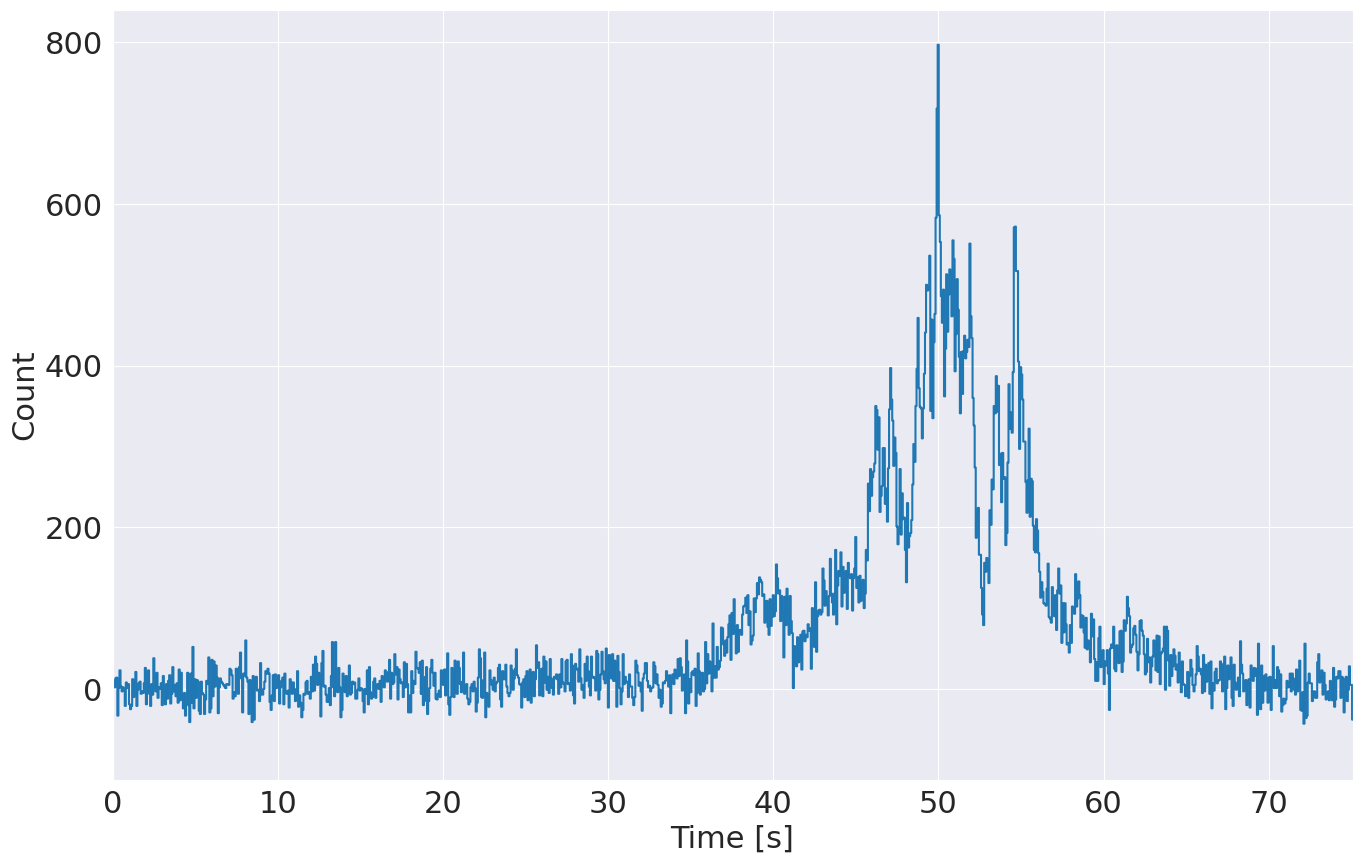

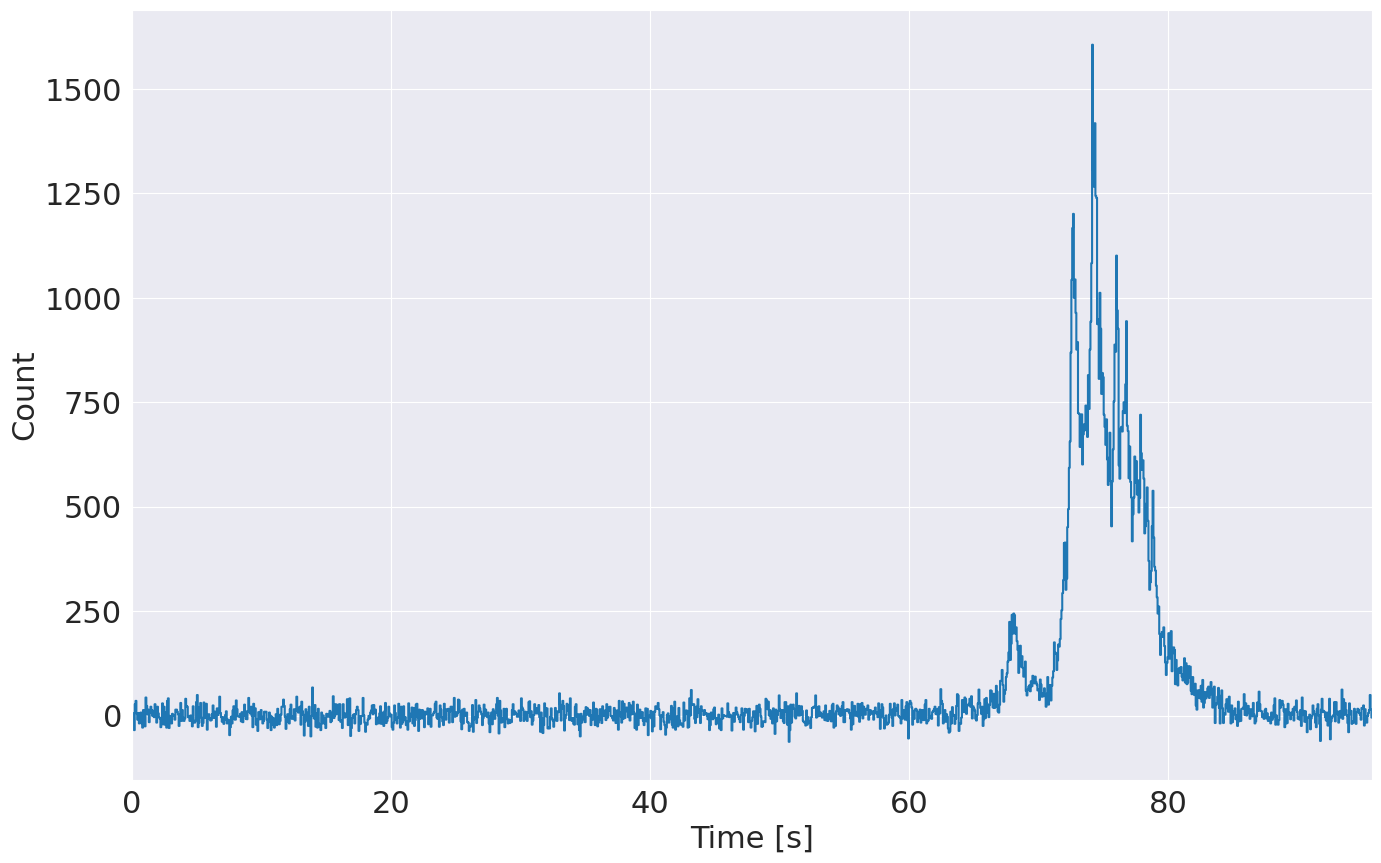

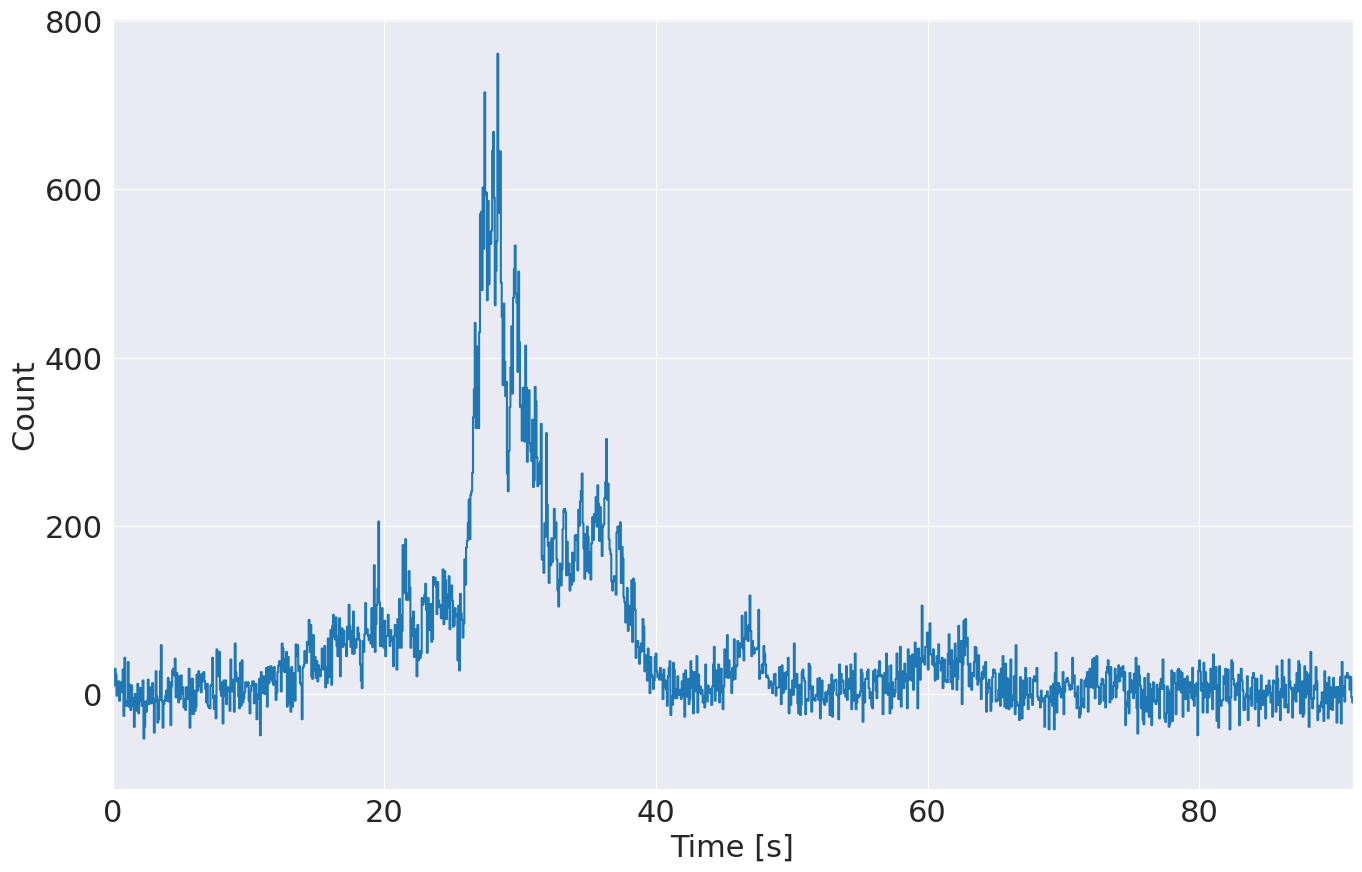

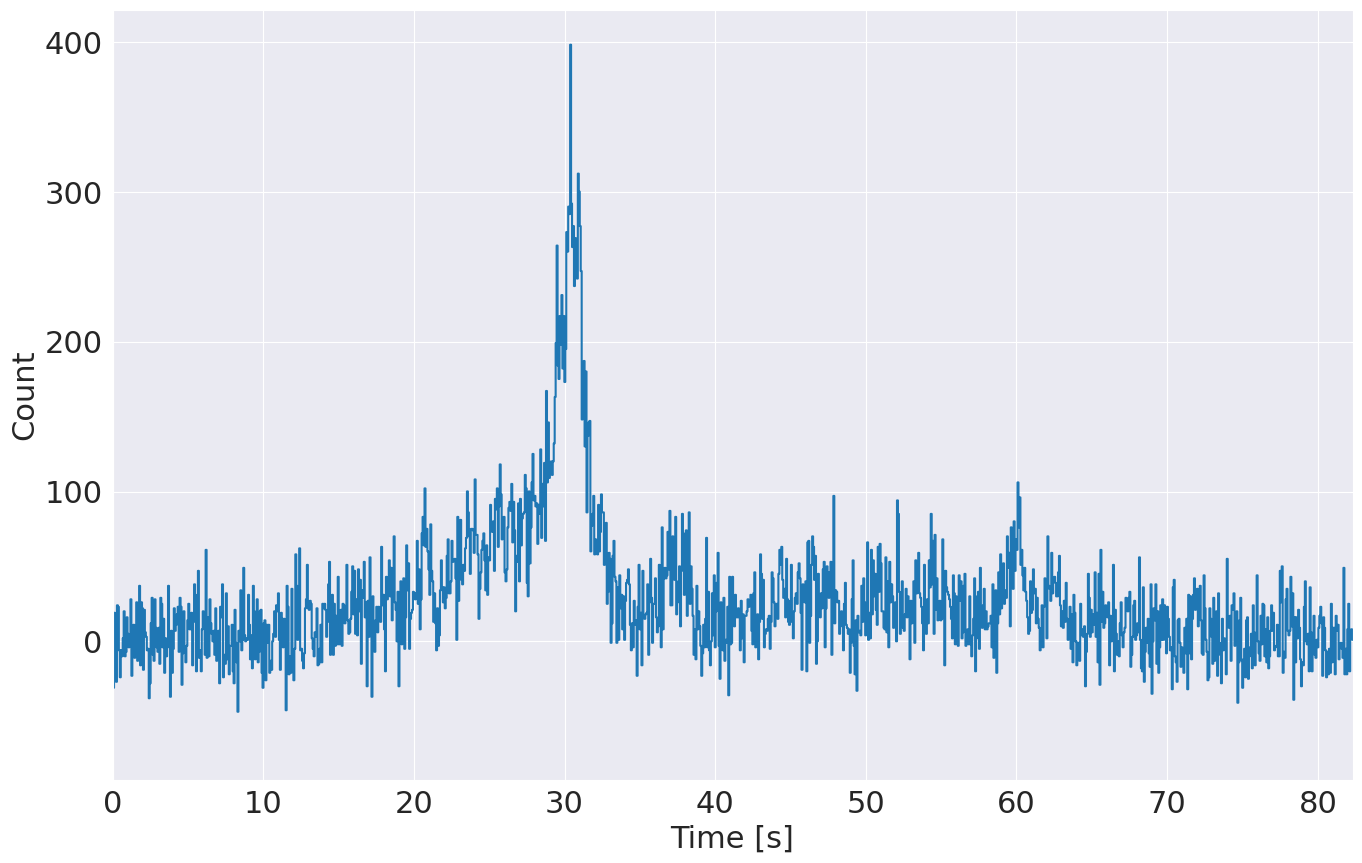

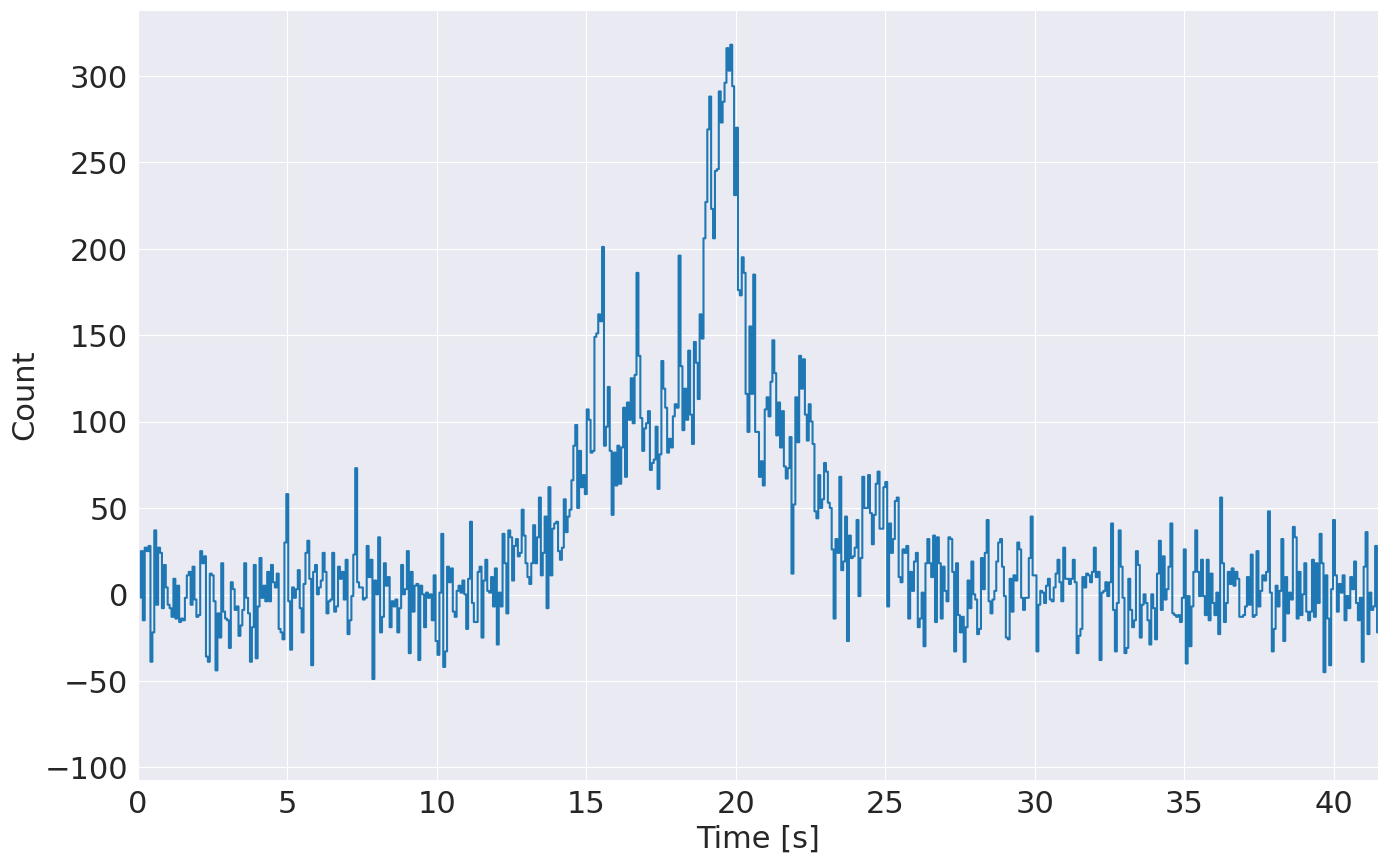

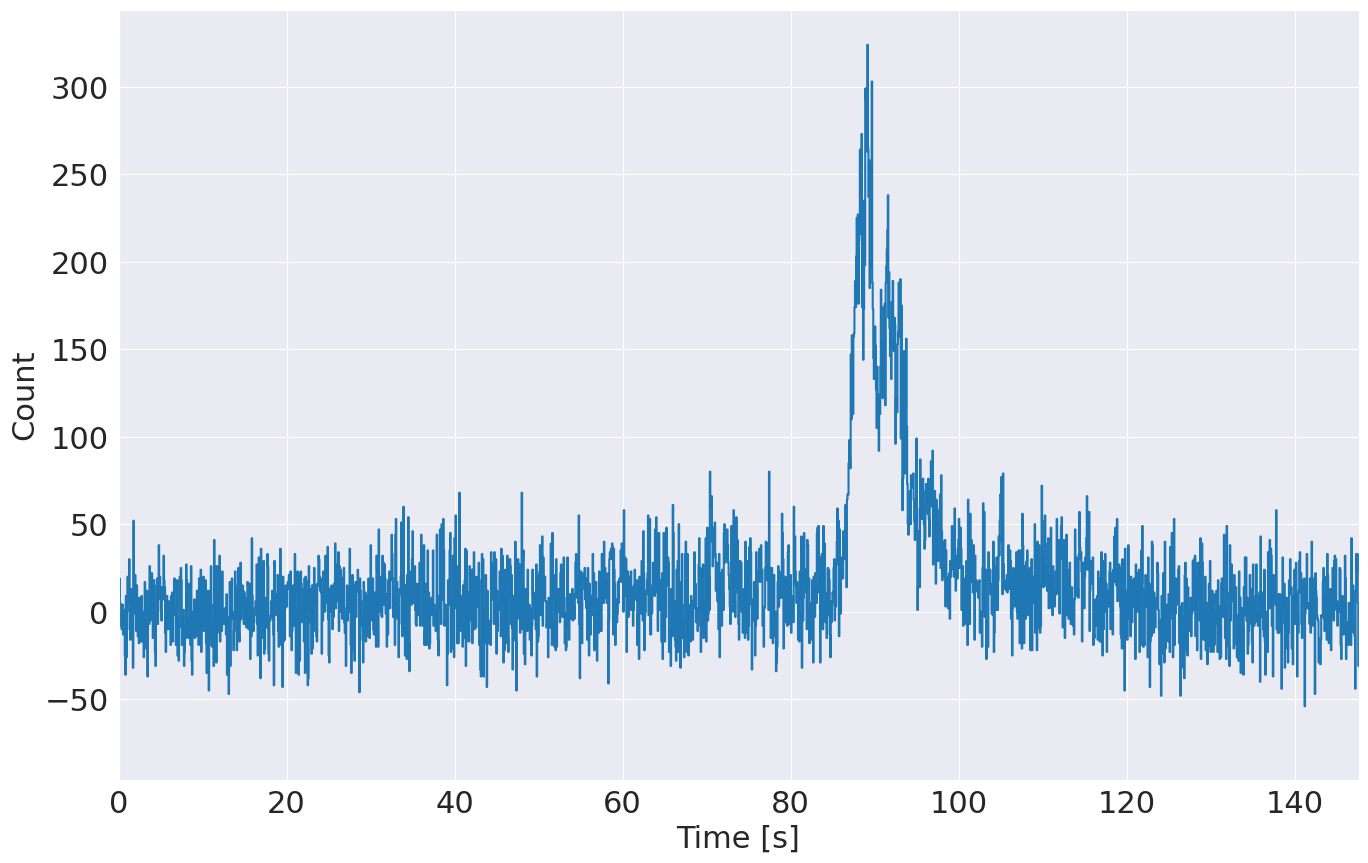

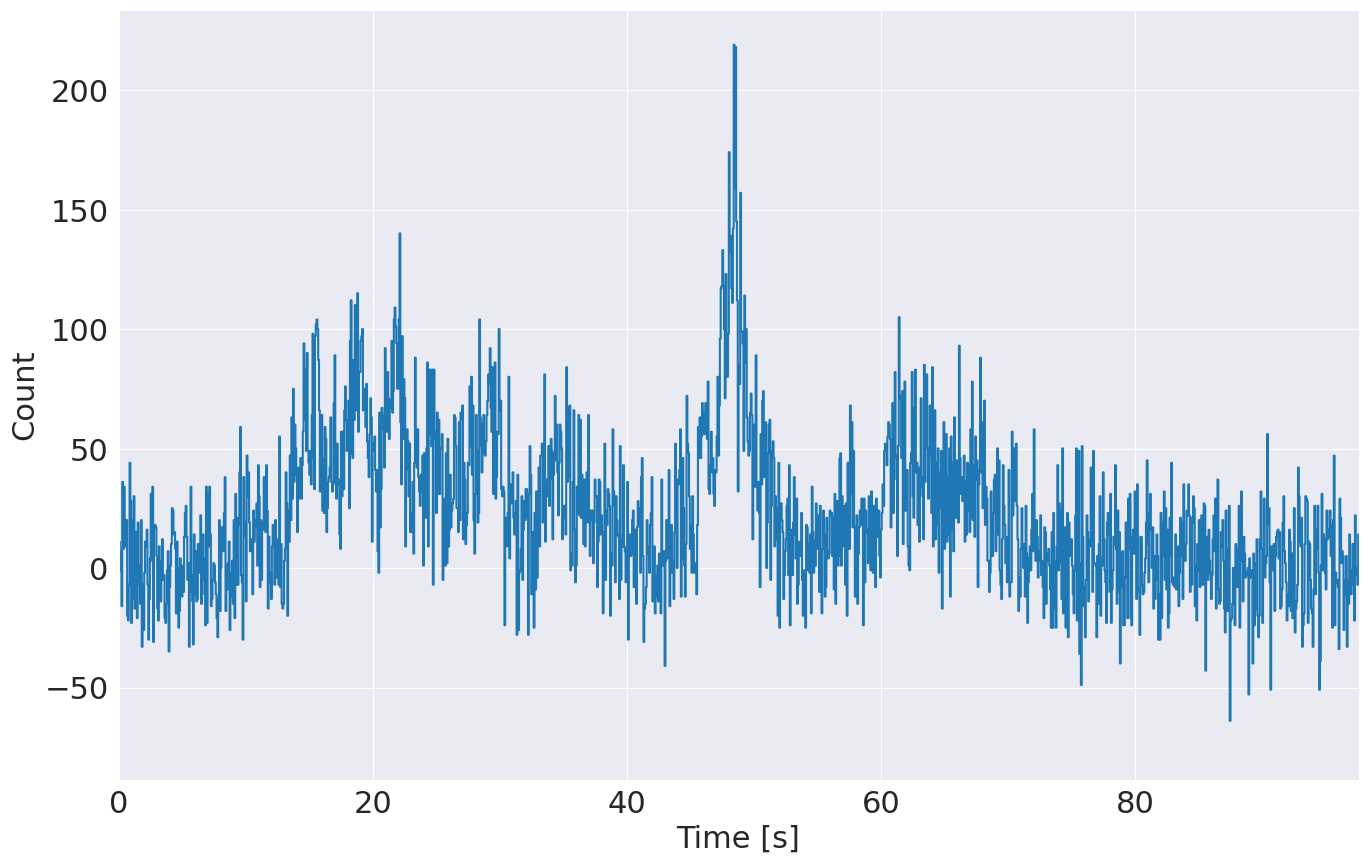

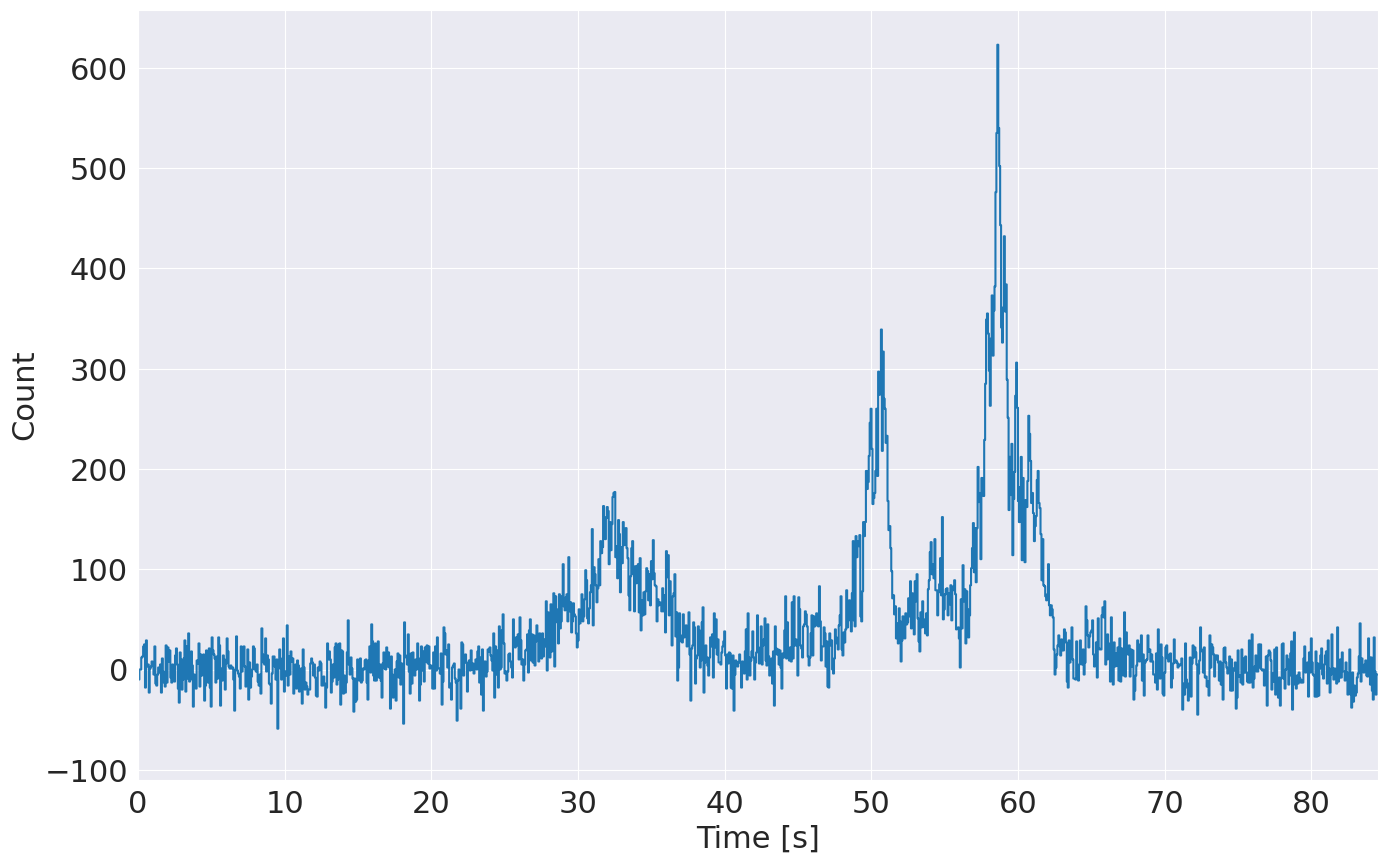

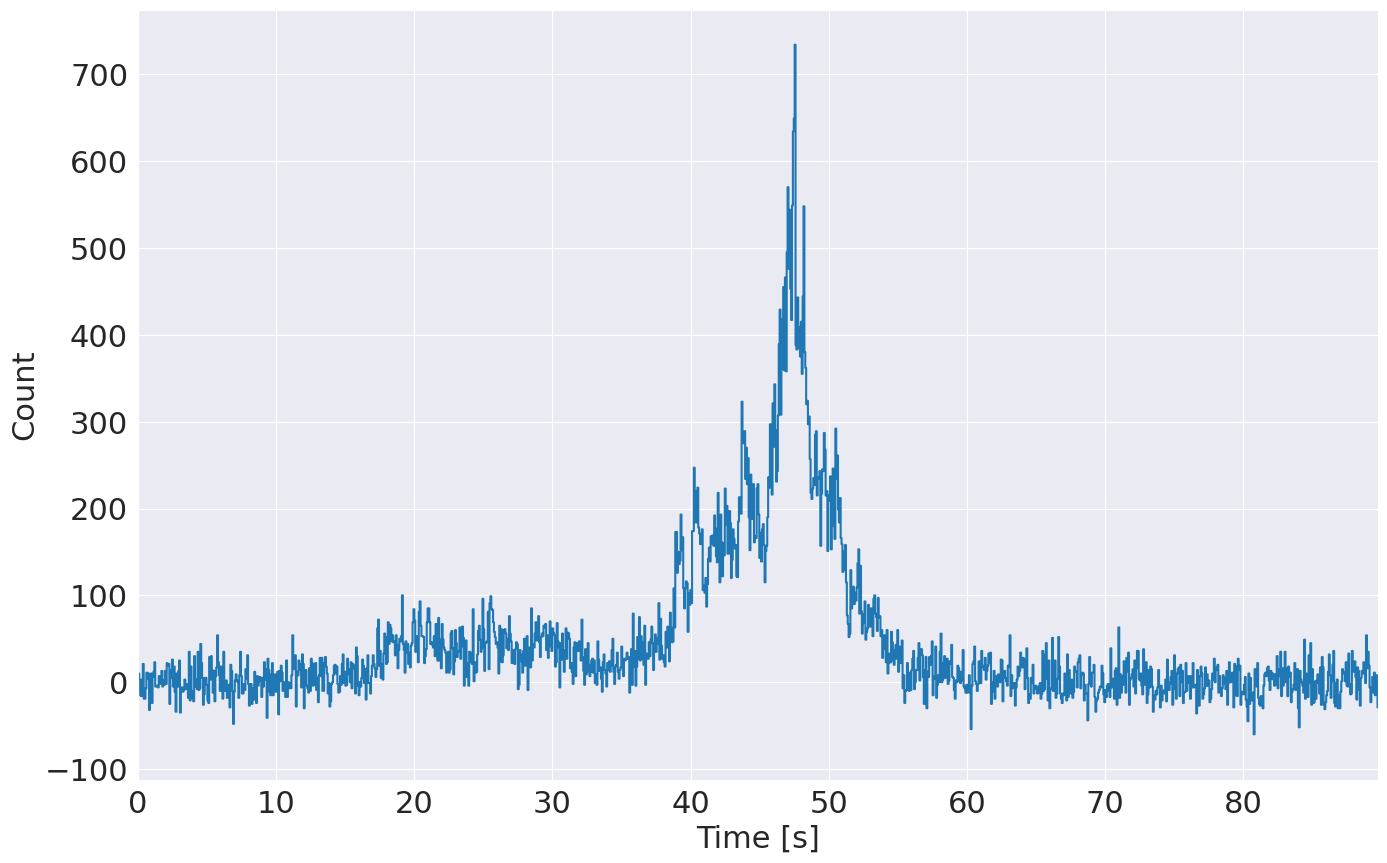

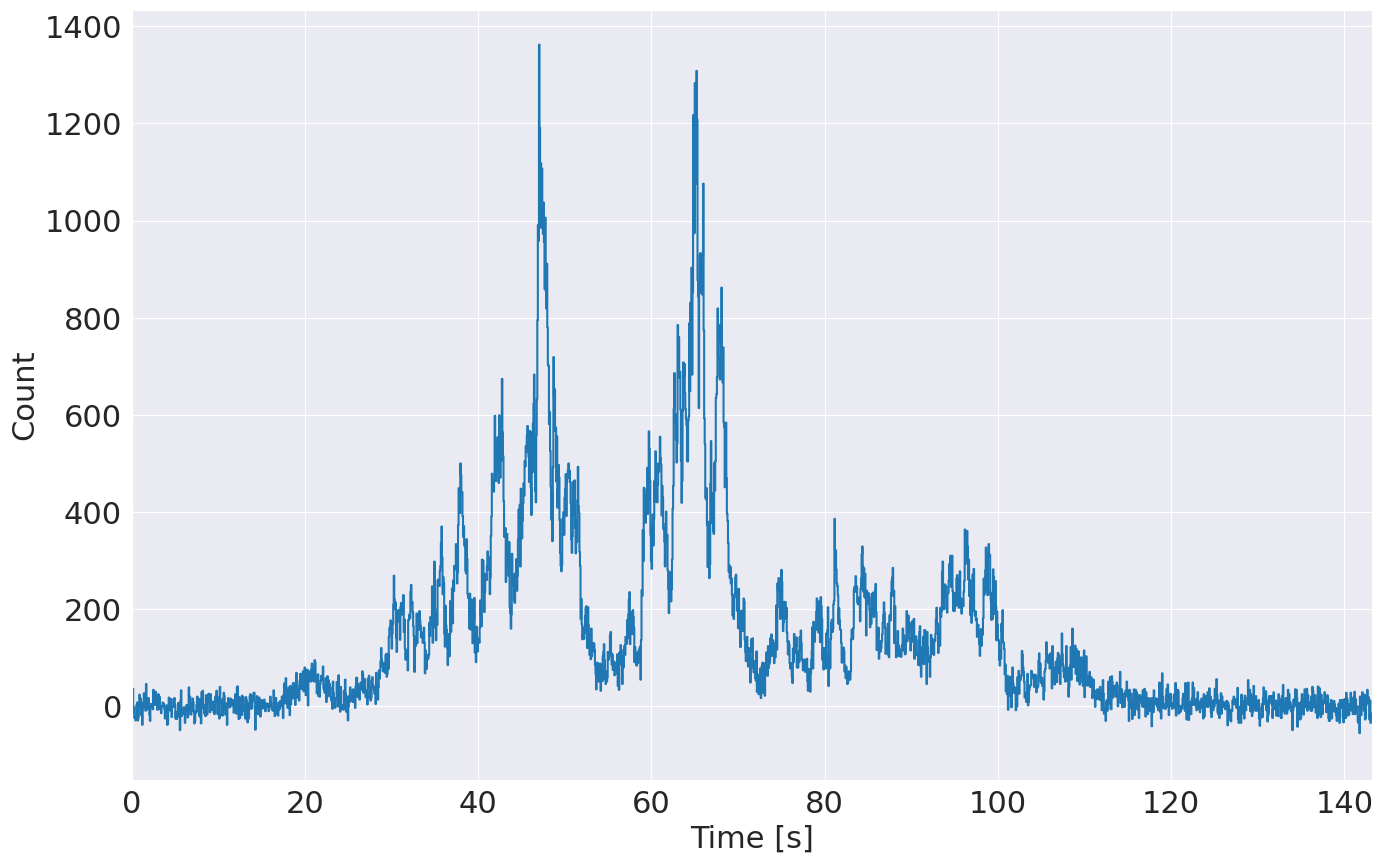

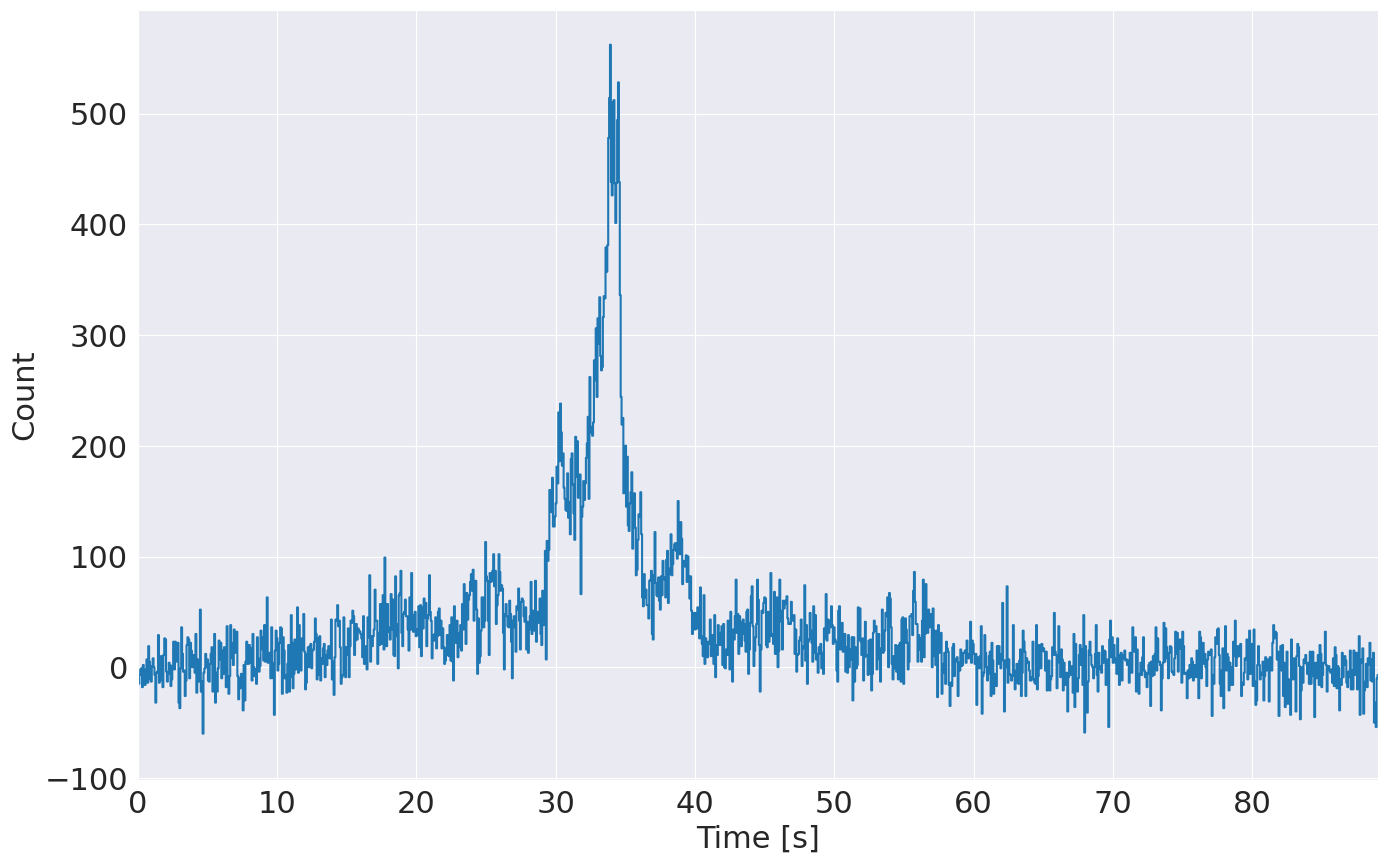

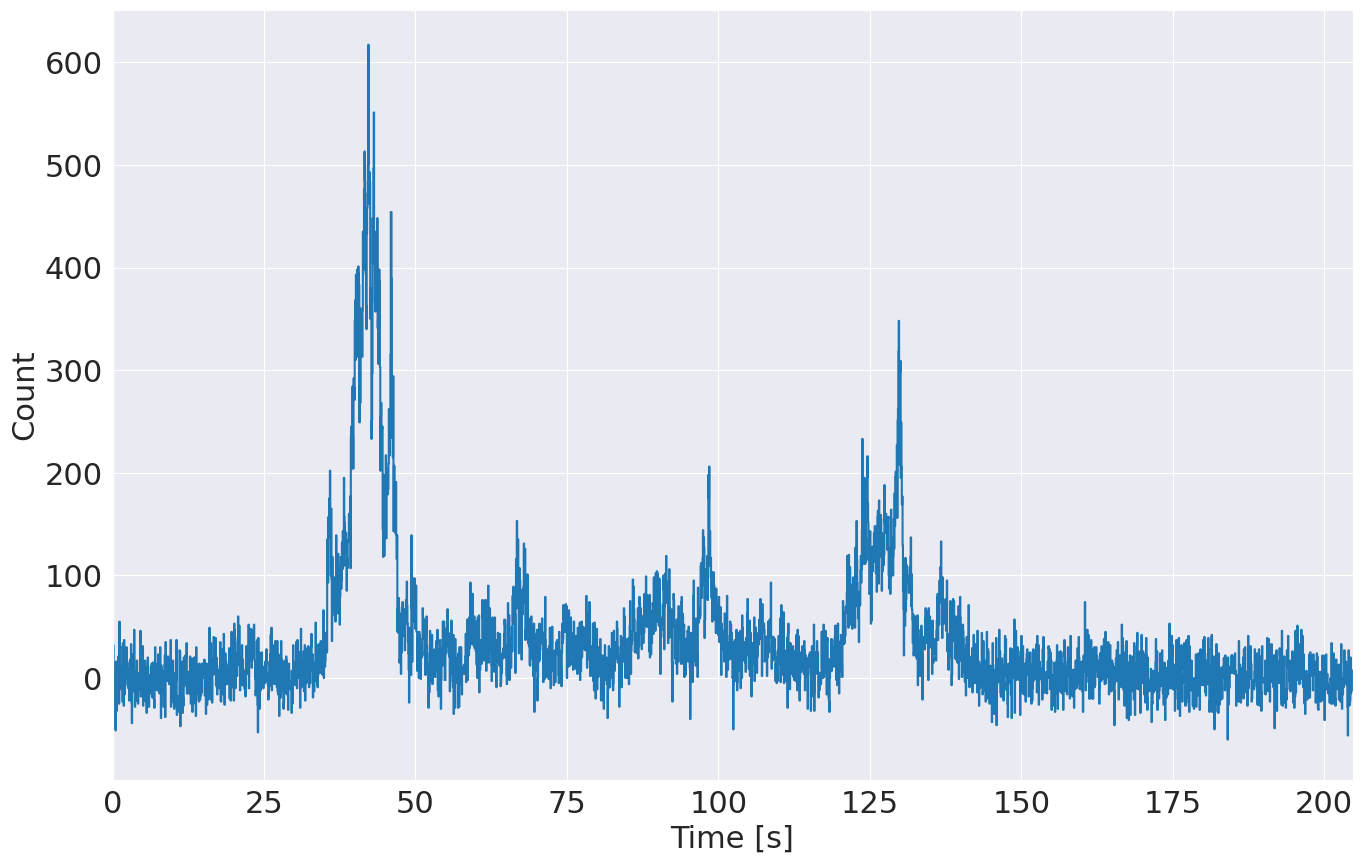

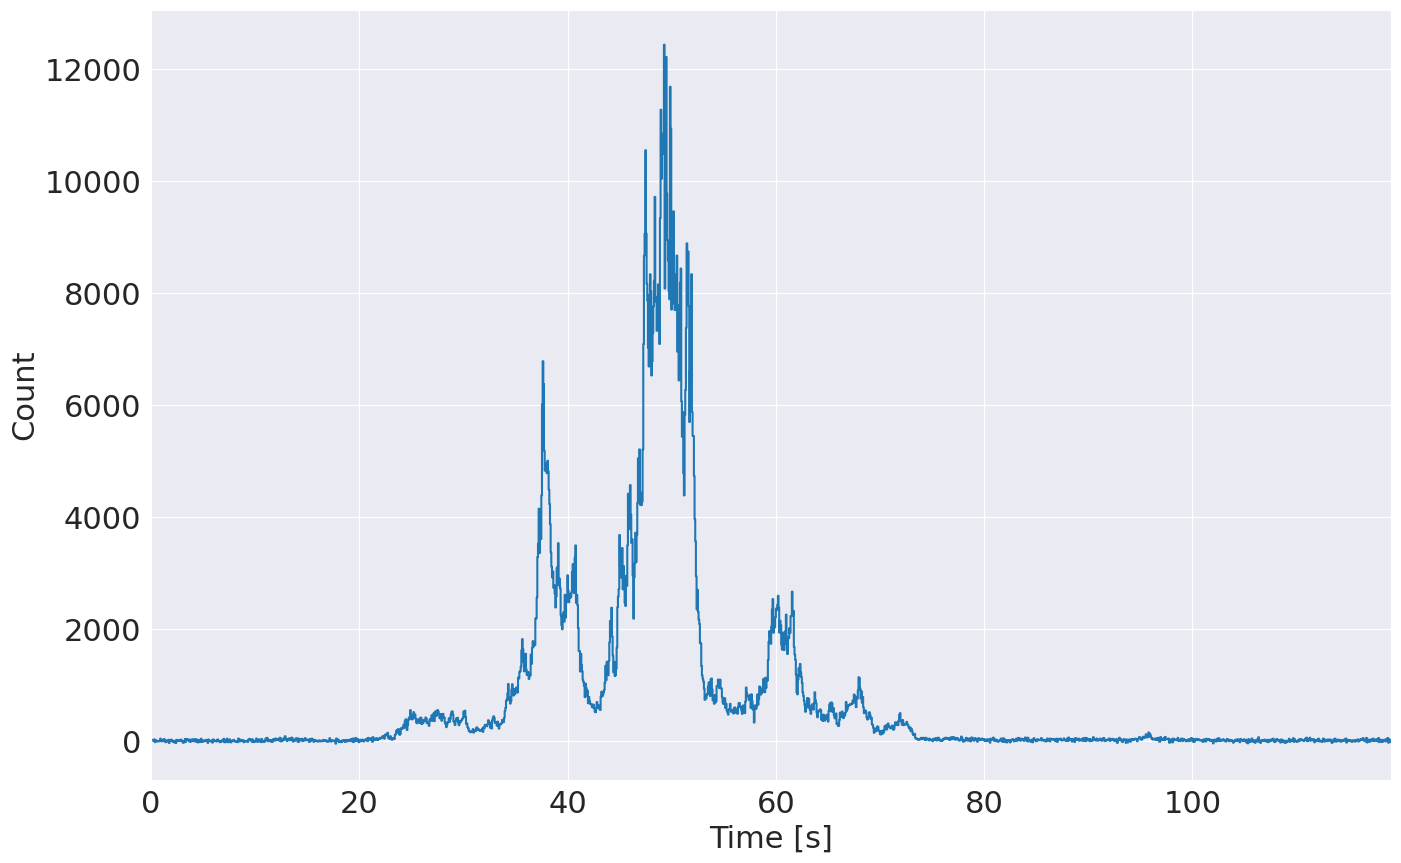

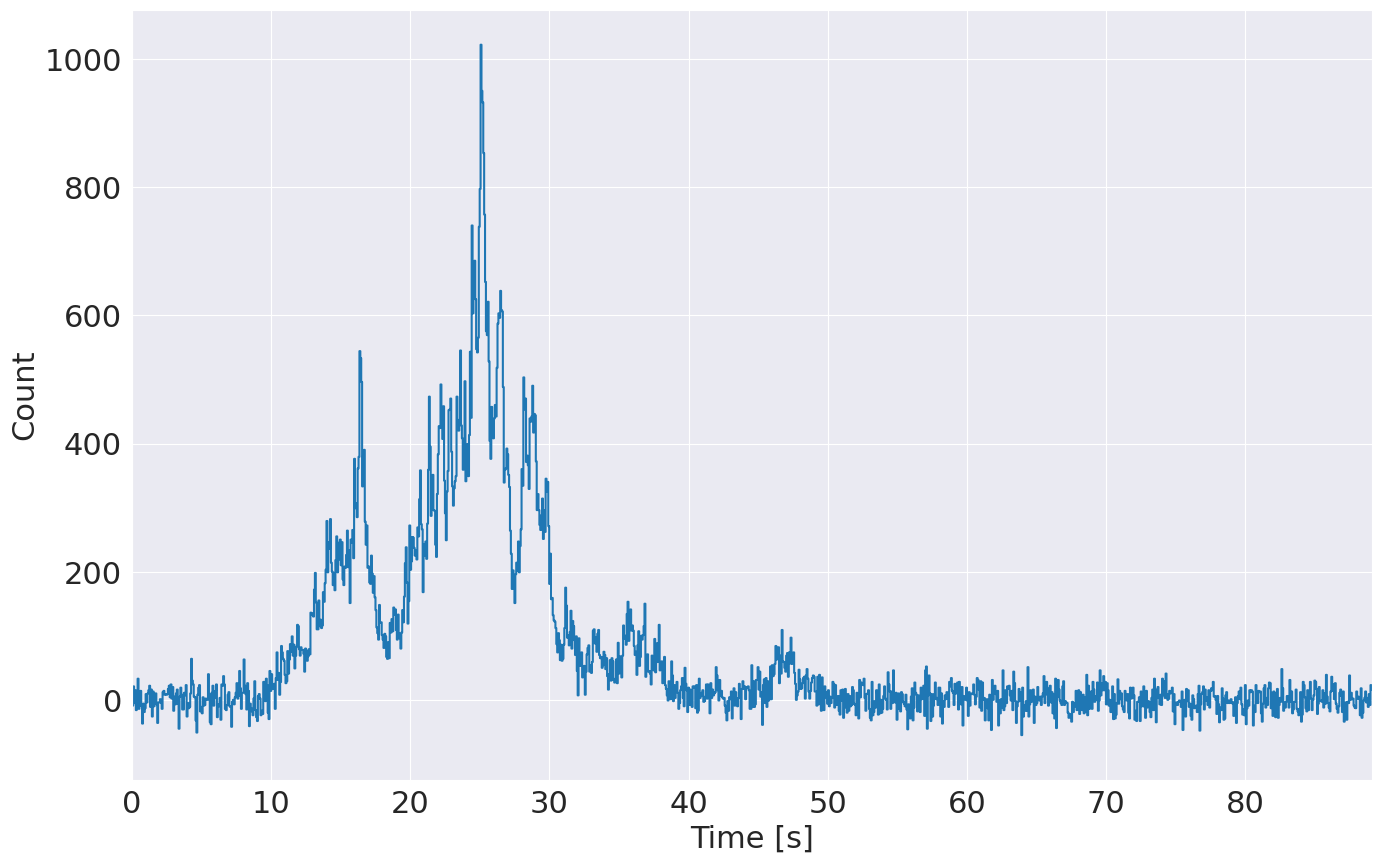

In [26]:
for i in range(ncurves):
        lc = LC(q=q,
                a=a,
                alpha=alpha,
                k=k,
                t_0=t_0,
                norm_A=norm,
                res=res_batse,
                eff_area=eff_area_batse,
                bg_level=bg_level_batse,
                n_cut=n_cut,
                with_bg=False,
                verbose=False)
        lc.generate_LC_from_sde(q, a, alpha, k, t_0,norm)
        SN = evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,0.064,True,return_cnts=False)[0]
        if SN > 50:
                plt.figure(figsize=(16,10))
                plt.step(lc._times,lc._plot_lc)
                plt.xlim(0,1*lc._t100)
                plt.xlabel('Time [s]',size=22)
                plt.ylabel('Count',size=22)
                plt.xticks(size=22)
                plt.yticks(size=22)

                
        SNs[i] = evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,0.064,True,return_cnts=False)[0]


SN= 5.027e-01


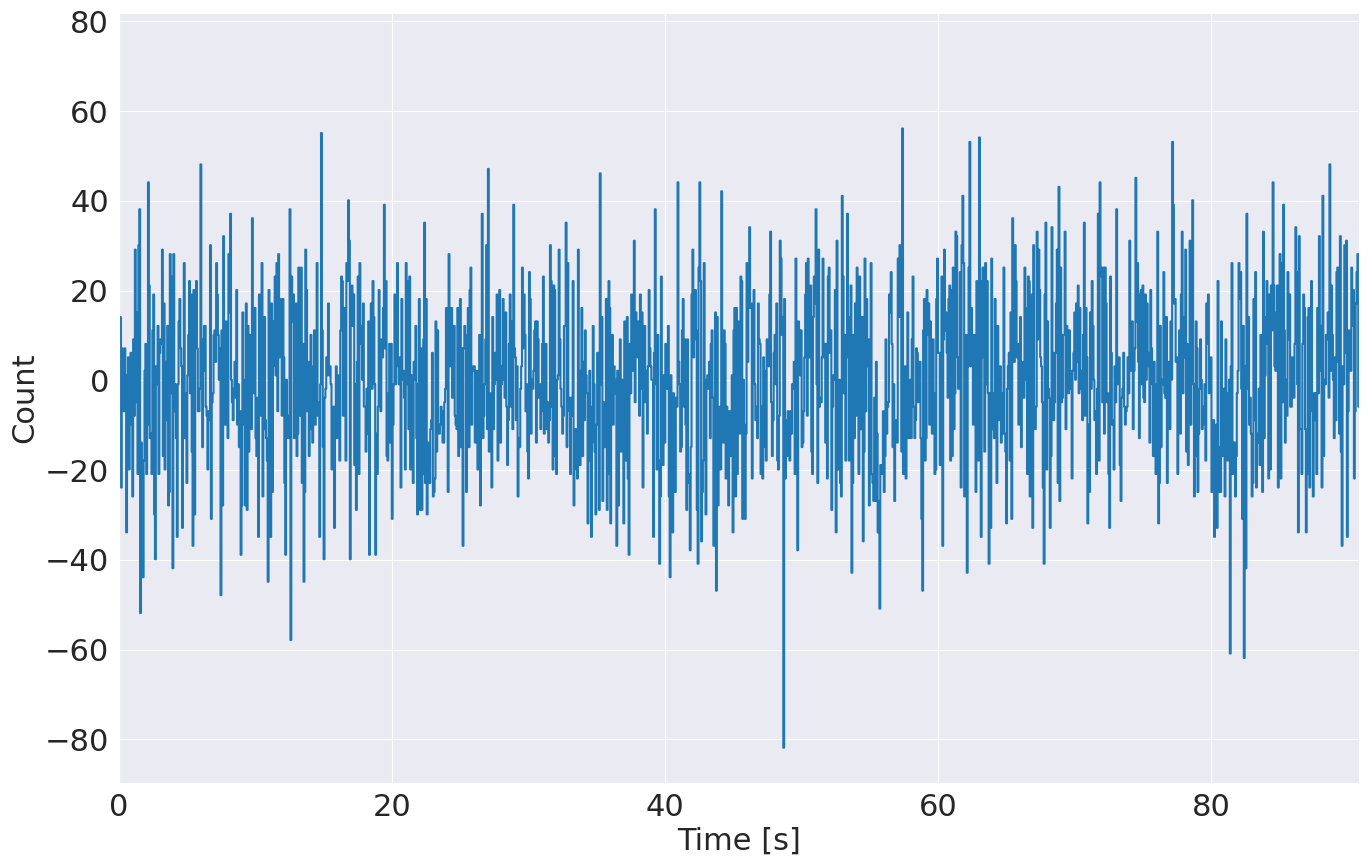

In [20]:
#plt.plot(lc._times,lc._rates)
#plt.xlim(0,100)
lc = LC(q=q,
a=a,
alpha=alpha,
k=k,
t_0=t_0,
norm_A=norm,
res=res_batse,
eff_area=eff_area_batse,
bg_level=bg_level_batse,
n_cut=n_cut,
with_bg=False,
verbose=False)
lc.generate_LC_from_sde(q, a, alpha, k, t_0,norm)
plt.figure(figsize=(16,10))
plt.step(lc._times,lc._plot_lc)
plt.xlim(0,1*lc._t100)
plt.xlabel('Time [s]',size=22)
plt.ylabel('Count',size=22)
plt.xticks(size=22)
plt.yticks(size=22)

SN = evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,0.064,True,return_cnts=False)[0]
print('SN=',"%1.3e"%SN)

In [16]:
len(np.where(SNs<15)[0])/len(SNs)


0.966

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

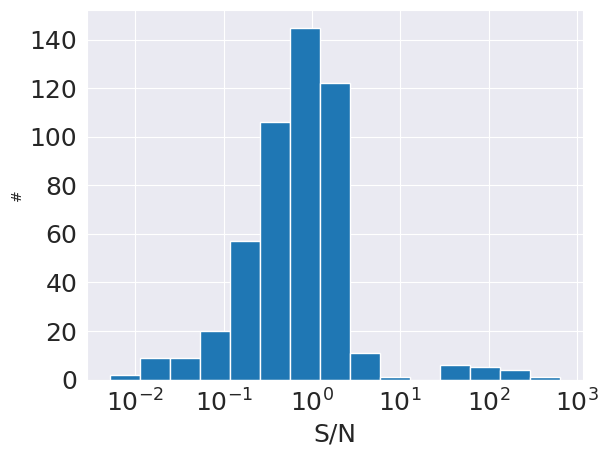

In [13]:
plt.hist(SNs,bins=np.logspace(np.min(np.log10(SNs)),np.max(np.log10(SNs)),16))
plt.xscale('log')
plt.xlabel('S/N',size=18)
plt.ylabel('#')
plt.xticks(size=18)
plt.yticks(size=18)

In [54]:
16.2/5000

0.00324

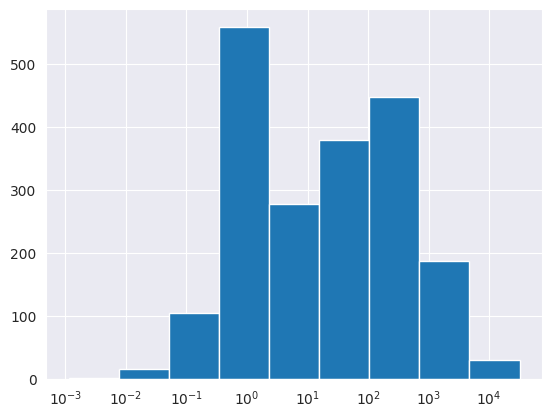

<Figure size 1600x1000 with 0 Axes>

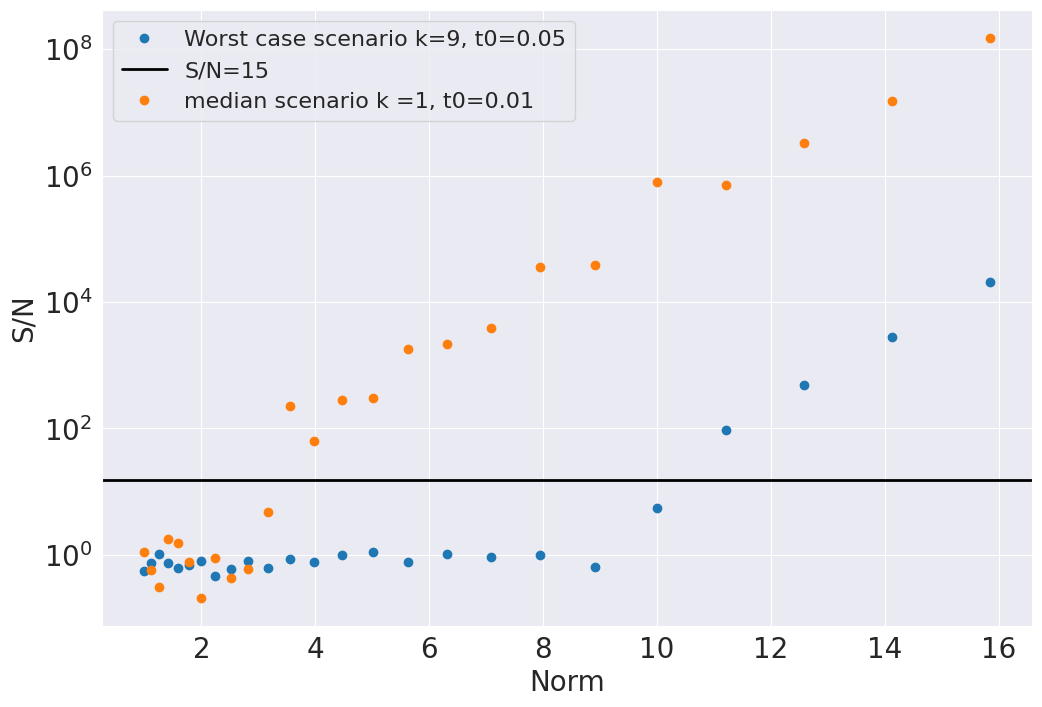

In [5]:
ntime = int(15625)
times = np.linspace(0,1e3,int(1e3/0.064))
#logq=np.random.uniform(low=-3,high=1)
#q = 10**logq
q=0.1
a=q/2
#alpha=np.random.uniform(low=1,high=4)
alpha = 2.5
# k=9
# t_0 =5e-2
# norm=1e10

ncurves=1



alpha_bpl = 0.5
beta_bpl = 1.5
F_break = 1e-6
F_min = 1e-10

bintime = 0.064

X= np.zeros((ncurves,ntime))
plt.figure(figsize=(16,10))

norms = np.logspace(0,1.2,25)
SNs_worst_case=np.zeros_like(norms)
SNs_median=np.zeros_like(norms)
peak_max=np.zeros_like(norms)

nsimus=10

for i in range(len(norms)):
        # caso peggiore
        k_w=9
        t_0w = 5e-2
        
        lc = LC(q=q,
                a=a,
                alpha=alpha,
                k=k_w,
                t_0=t_0w,
                res=res,
                eff_area=eff_area,
                bg_level=bg_level,
                n_cut=n_cut,
                with_bg=False,
                verbose=False)
        sns=[]
        for j in range(nsimus):
                lc.generate_LC_from_sde(q, a, alpha, k_w, t_0w,alpha_bpl,beta_bpl,F_break,F_min,10**norms[i])
                sns.append(evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,bintime,True,return_cnts=False)[0])
        SNs_worst_case[i]=np.mean(sns)



        # caso medio
        k_m=1
        t_0m = 1e-2
        lc = LC(q=q,
                a=a,
                alpha=alpha,
                k=k_m,
                t_0=t_0m,
                res=res,
                eff_area=eff_area,
                bg_level=bg_level,
                n_cut=n_cut,
                with_bg=False,
                verbose=False)
        
        sns=[]
        for j in range(nsimus):
                lc.generate_LC_from_sde(q, a, alpha, k_m, t_0m,alpha_bpl,beta_bpl,F_break,F_min,10**norms[i])
                sns.append(evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,bintime,True,return_cnts=False)[0])
        SNs_median[i]=np.mean(sns)
        
        peak_max[i]=np.max(lc._plot_lc)
        SNs_median[i] = evaluateGRB_SN(lc._times,lc._plot_lc,lc._err_lc,lc._t90,15,bintime,True,return_cnts=False)[0]
        #if SNs_median[i] > 1e3:
        #plt.figure()
        #plt.plot(lc._times,lc._plot_lc)
        


        #print(SN)
        #lc.generate_avalanche(seed=None)
        #X[i,:] =  generale_lc_from_solution_SDE_without_norm(q,a,alpha,k,t_0,alpha_bpl,beta_bpl,F_break,F_min,times)
        #rates = generale_lc_from_solution_SDE_without_norm(q,a,alpha,k,t_0,alpha_bpl,beta_bpl,F_break,F_min,gam,times)
        # print( len(lc._plot_lc) )
        # plt.figure(figsize=(16,10))
        #plt.step(lc._times,lc._rates)
        #plt.xlim(0,150)
        # plt.xlim(-1,2*lc._t90)
        # plt.xlabel('Time [s]',size=20)
        # plt.ylabel('Counts',size=20)
        # plt.xticks(size=20)
        # plt.yticks(size=20)
        # plt.figure(figsize=(16,10))
        # lc.plot_lc(save=False,
        #          show_duration=True,
        #          rescale=True)



plt.figure(figsize=(12,8))
plt.plot(norms,SNs_worst_case,'o',label='Worst case scenario k={0}, t0={1}'.format(k_w,t_0w))
plt.axhline(15,lw=2,color='k',label='S/N=15')
plt.plot(norms,SNs_median,'o',label='median scenario k ={0}, t0={1}'.format(k_m,t_0m))
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Norm',size=20)
plt.ylabel('S/N',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.xlim(0,1e4)
plt.legend(prop={'size':16})
# ampl_cnts_list = []
# for params in lc._lc_params:
#     tau  = params['tau']
#     ampl = params['norm']
#     if params['tau']>lc._res:

#         ampl_cnts = ampl * lc._re

#     else:
#         ampl_cnts = ampl * tau
#     ampl_cnts_list.append(ampl_cnts) 

# print('N of pulses:', lc._n_pulses)
# print('bg (cnt) =', lc._bg * lc._res)

# print('max norm (cnt) =', np.max(ampl_cnts_list))
# print('T100 [s] =', lc._t100)
# print('T90  [s] =', lc._t90)
# #print(lc._lc_params)

In [25]:
k=9
t_0 = 5e-2

norm=norms[-1]

lc = LC(q=q,
        a=a,
        alpha=alpha,
        k=k,
        t_0=t_0,
        res=res,
        eff_area=eff_area,
        bg_level=bg_level,
        n_cut=n_cut,
        with_bg=False,
        verbose=False)
lc.generate_LC_from_sde(q, a, alpha, k, t_0,alpha_bpl,beta_bpl,F_break,F_min,10**norm)

plt.plot(lc._times,lc._rates)
plt.xlim(0,10)


max_lc inf
high lam


/tmp/ipykernel_937701/4042471616.py:17: RuntimeWarning: overflow encountered in scalar power
  lc.generate_LC_from_sde(q, a, alpha, k, t_0,alpha_bpl,beta_bpl,F_break,F_min,10**norm)


AttributeError: 'LC' object has no attribute '_plot_lc'

max_lc 1816112.4185135837


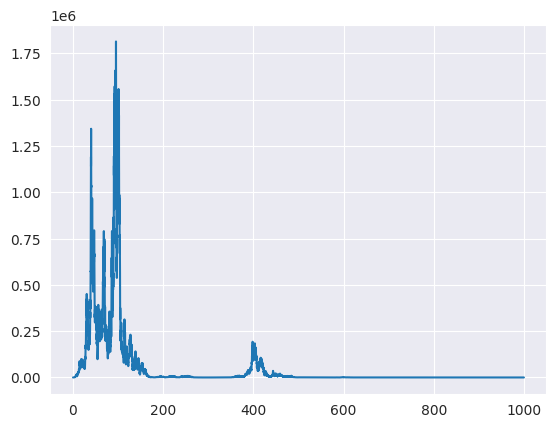

In [19]:
k=0.1
t_0 = 1
lc =LC(q=q,
    a=a,
    alpha=alpha,
    k=k,
    t_0=t_0,
    res=res,
    eff_area=eff_area,
    bg_level=bg_level,
    n_cut=n_cut,
    with_bg=False,
    verbose=False)

lc.generate_LC_from_sde(q, a, alpha, k, t_0,alpha_bpl,beta_bpl,F_break,F_min,100)
plt.plot(lc._times,lc._plot_lc)


(0.0, 10.0)

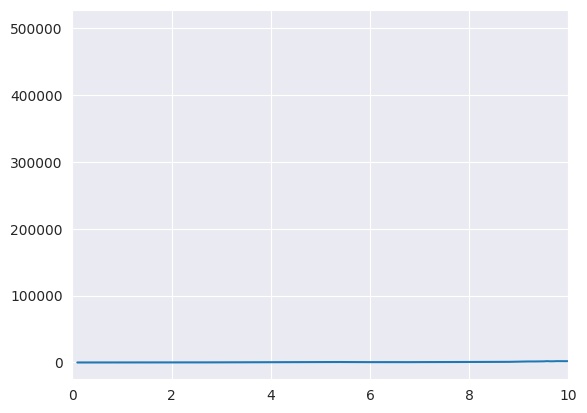

In [21]:
plt.plot(lc._times,lc._rates)
plt.xlim(0,10)

In [127]:
from scipy.optimize import curve_fit

def model(t, norm,alpha, k,t_0,ga):    
    return norm*(t**alpha)*np.exp(-k*(t/t_0)**(ga))



q=0.1
a= q/2
alpha=1
k=0.06
t_0 =0.7
norm=0.015
ga=2/3+0.1


x,y,z=np.loadtxt('/astrodata/romain/sde_GA/reb_5sigma_atp_7sigma.txt',usecols=[0,1,2],unpack=True)

idx=np.where(x>0)[0]
x=x[idx]
y=y[idx]
popt, pcov = curve_fit(model, x, y,p0=[norm,alpha,k,t_0,ga])
fit_ = model(x,*popt)


/tmp/ipykernel_891605/3297003038.py:4: RuntimeWarning: invalid value encountered in power
  return norm*(t**alpha)*np.exp(-k*(t/t_0)**(ga))


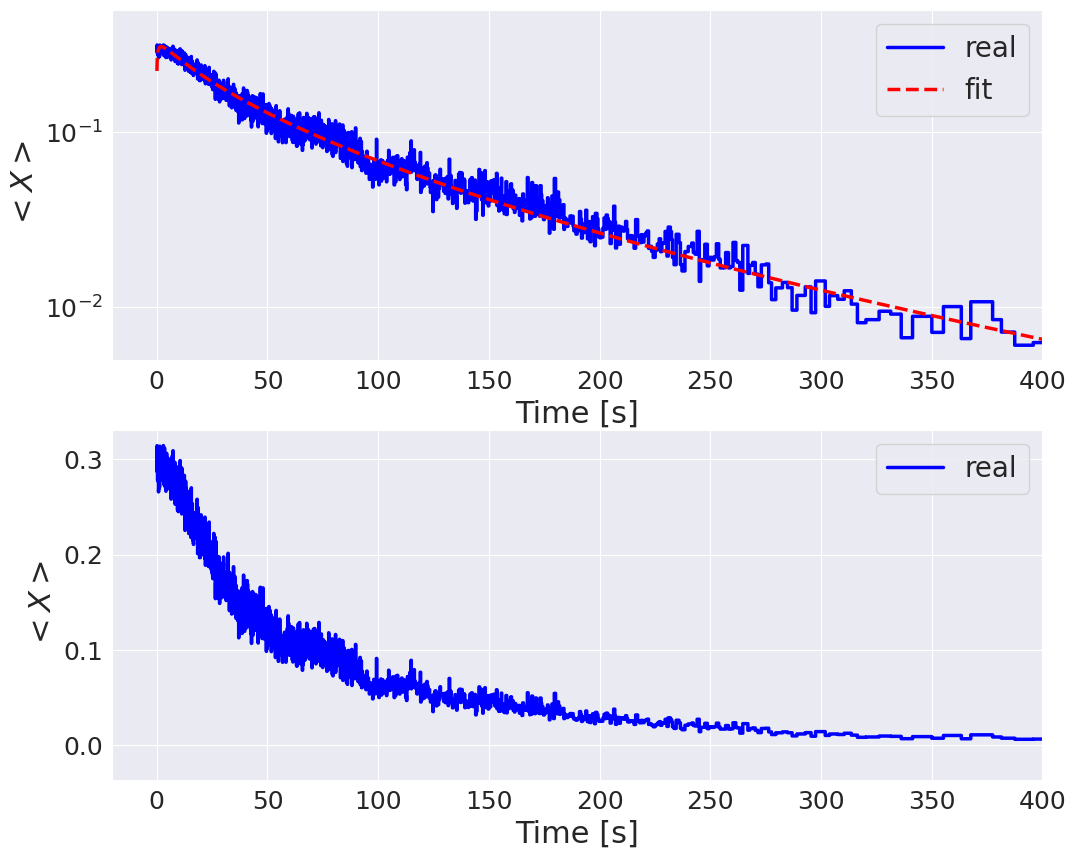

In [135]:
#x,y,z=np.loadtxt('/astrodata/romain/sde_GA/reb_5sigma_atp_7sigma.txt',usecols=[0,1,2],unpack=True)
#plt.plot(x,y)


from matplotlib.figure import figaspect


#x,y,z=np.loadtxt('/astrodata/romain/sde_GA/reb_5sigma_atp_trigger_time.txt',usecols=[0,1,2],unpack=True)

#plt.figure(figsize=(16,10))

fig,axs=plt.subplots(2,1,figsize=(12,10))

#array([0.38667368, 0.17725015, 0.10635994, 0.18863971, 0.50634244])

q=0.1
a= q/2

alpha=0.17725
k=0.106
t_0 =0.1886
norm=0.015
ga=0.506

medium_profile = norm*(times**alpha)*np.exp(-k*(times/t_0)**(ga))


#plt.step(x,y,label='Real',lw=2.)
#axs[0].step(times,np.mean(X,axis=0),label='simulated',lw=2.5,color='r',ls='-')
axs[0].step(x,y,label='real',lw=2.5,color='blue',ls='-')
#axs[0].plot(times,medium_profile,label='theoretical',lw=2.5,color='r',ls='--')
axs[0].plot(x,fit_,label='fit',lw=2.5,color='r',ls='--')


axs[0].set_yscale('log')
axs[0].set_ylim(5e-3,0.5)
axs[1].step(x,y,label='real',lw=2.5,color='blue',ls='-')
#plt.plot(times,medium_profile/np.mean(X,axis=0),label='ratio',lw=2.5)
for ax in axs:
    ax.set_xlabel('Time [s]',size=22)
    ax.set_ylabel(r'$<X>$',size=22)
#.xticks(size=20)
#plt.yticks(size=20)
#plt.xscale('log')
for ax in axs:
    ax.set_xlim(-20,400)
    ax.tick_params(axis='both', which='major', labelsize=18)
    #ax.xticks(size=22)
    #ax.yticks(size=22)
#plt.yscale('log')

axs[0].legend(prop={'size':20})
axs[1].legend(prop={'size':20})

In [130]:
popt

array([0.38667368, 0.17725015, 0.10635994, 0.18863971, 0.50634244])

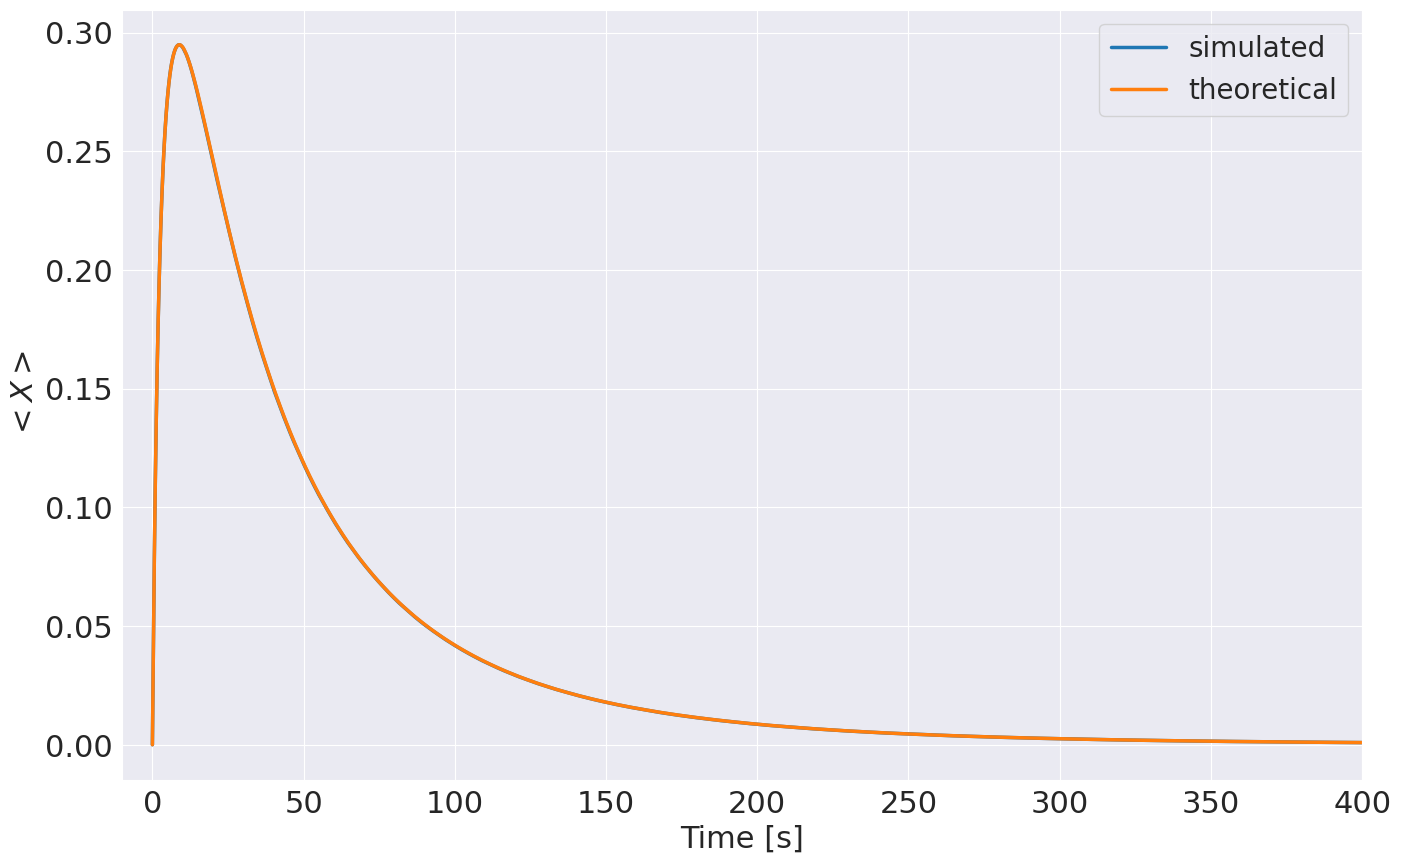

In [49]:
plt.figure(figsize=(16,10))

medium_profile = (times**alpha)*np.exp(-k*(times/t_0)**(1./3.))
plt.plot(times,np.mean(X,axis=0),label='simulated',lw=2.5)
plt.plot(times,medium_profile,label='theoretical',lw=2.5)
plt.xlabel('Time [s]',size=22)
plt.ylabel(r'$<X>$',size=22)
plt.xticks(size=22)
plt.yticks(size=22)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-10,400)
plt.legend(prop={'size':20})

In [ ]:
times = np.linspace(0.001,10,10000)

def sde_euler_maruyama(times, mu, sigma, n_paths):
    N = len(times)
    dt = times[1]-times[0]
    X = np.zeros((N, n_paths))
    x0 = np.random.random() # first point of the sde is set randomly
    X[0, :] = 0.1
    dW = np.random.normal(0, np.sqrt(dt), (N-1, n_paths))
    for i in range(1, N):
        X[i, :] = X[i-1, :] + mu(X[i-1, :], times[i-1]) * dt + sigma(X[i-1, :], times[i-1]) * dW[i-1, :]

    return X

print(" sono qua 2")

f = lambda x,t: (0.5*q-a+alpha/t-(k/3/t_0)*(t/t_0)**(-2/3))*x
g = lambda x,t:np.sqrt(q)*x

test_rates = sde_euler_maruyama(times, f, g,1).T[0]
test_rates
plt.plot(times,test_rates)

In [15]:
np.shape(test_rates),np.shape(times)
plt.plot(times,test_rates)

Error in callback <function _draw_all_if_interactive at 0x7f71cf4263b0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [29]:
test_rates.T[0]

array([0.1       , 0.09967703, 0.09914722, ..., 0.09214154, 0.09279319,
       0.09188163])

In [ ]:
# test execution time

test_execution_time=False

if test_execution_time:
    lc = LC(mu=mu,
            mu0=mu0,
            alpha=alpha,
            delta1=delta1,
            delta2=delta2,
            tau_min=tau_min, 
            tau_max=tau_max,
            res=res,
            eff_area=eff_area,
            bg_level=bg_level,
            n_cut=n_cut,
            verbose=False) 

    %timeit lc.generate_avalanche(seed=None) # ~4 ms per lc

The quantity `LC._plot_lc` contains the final light curve

--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 5
Total number of child pulses          : 77
---
Total number of pulses                : 82
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 5
Total number of child pulses          : 77
---
Total number of pulses                : 82


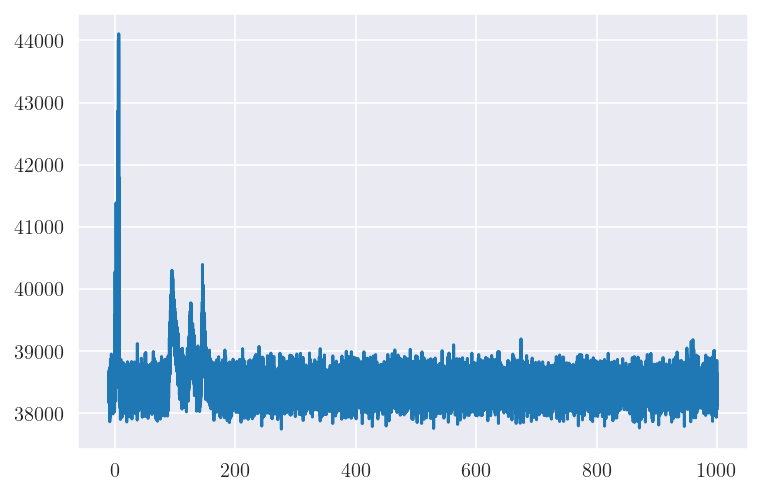

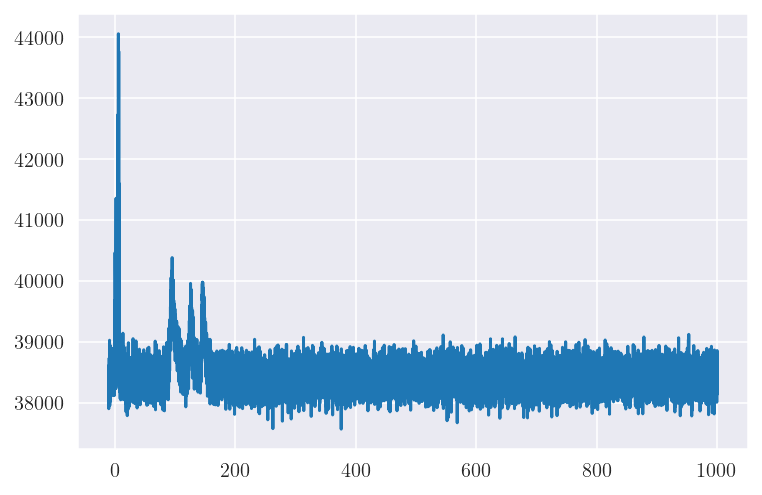

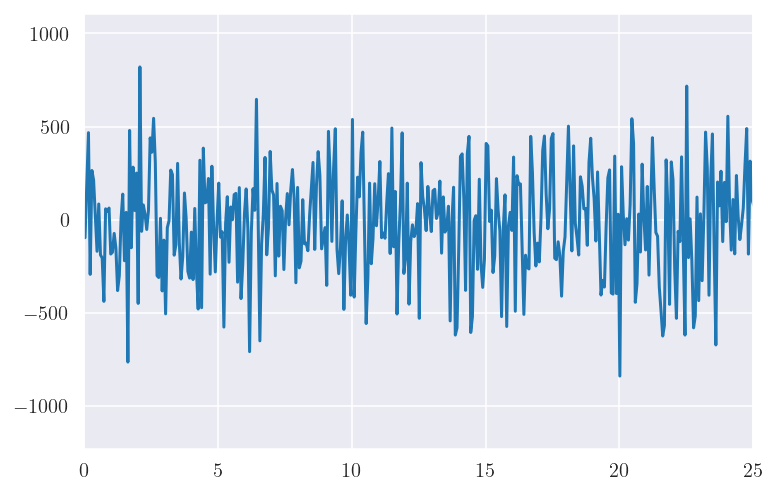

In [8]:
n_cut_1=10000
n_cut_2=100

lc1 = LC(mu=mu,
         mu0=mu0,
         alpha=alpha,
         delta1=delta1,
         delta2=delta2,
         tau_min=tau_min, 
         tau_max=tau_max,
         res=res,
         eff_area=eff_area,
         bg_level=bg_level,
         n_cut=n_cut_1)
lc2 = LC(mu=mu,
         mu0=mu0,
         alpha=alpha,
         delta1=delta1,
         delta2=delta2,
         tau_min=tau_min, 
         tau_max=tau_max,
         res=res,
         eff_area=eff_area,
         bg_level=bg_level,
         n_cut=n_cut_2)
            
par_1 = lc1.generate_avalanche(seed=SEED+3)
par_2 = lc2.generate_avalanche(seed=SEED+3)

plt.plot(lc1._times, lc1._plot_lc)
plt.show()

plt.plot(lc2._times, lc2._plot_lc)
plt.show()

plt.plot(lc1._times, lc1._plot_lc-lc2._plot_lc) 
# maybe the difference is not zero due to poissonian background;
# try to fix the seed also there and see if it disappears... 
plt.xlim(0, 25)
plt.show()

In [9]:
print(lc1._ampl)

0.5021942016886071


In [12]:
def export_lc(LC, idx, instrument, path='../simulations/'):
    """
    Export the simulated light curves in a file with these columns: 
        times, counts, err_counts, T90.
    Input:
    - LC: object that contains the light curve;
    - idx: number of the light curve;
    - instrument: string with the name of the instrument;
    - path: path where to store the results of the simulations;
    """
    outfile  = path+instrument+'/'+'lc'+str(idx)+'.txt'
    savefile = open(outfile, 'w')
    times    = LC._times
    lc       = LC._plot_lc
    err_lc   = LC._err_lc
    T90      = LC._t90
    for i in range(len(times)):
        savefile.write('{0} {1} {2} {3}\n'.format(times[i], lc[i], err_lc[i], T90))
    savefile.close()

## SIMULATE AND EXPORT GRBs

In [17]:
j=0
with_bg=False
N_grb=1000

grb_list_sim  = []

while (j<N_grb):
    lc = LC(# 7 parameters
            mu=mu,
            mu0=mu0,
            alpha=alpha,
            delta1=delta1,
            delta2=delta2,
            tau_min=tau_min, 
            tau_max=tau_max,
            ### instrument parameters:
            res=res,
            eff_area=eff_area,
            bg_level=bg_level,
            ### other parameters:
            n_cut=n_cut,
            with_bg=with_bg) 
    lc.generate_avalanche(seed=None)
    # save only lc with T90 > 2 sec
    if (lc._t90>2):
        export_lc(LC=lc, idx=j, instrument='sax')
        grb_list_sim.append(lc)
        j+=1
    del(lc)

--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 7
---
Total number of pulses                : 8
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 11
---
Total number of pulses                : 12
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 568
---
Total number of pulses                : 569
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 0
---
Total number of pulses                : 1
--------------------------------------------------------------------------
Number of spontaneous (primary) pulses: 1
Total number of child pulses          : 0
---
Total numbe

### Export file with data

In [7]:
lc.hdf5_lc_generation(outfile="./test.h5", overwrite=True, seed=17)

In [9]:
filename = "./test.h5"

with h5py.File(filename, "r") as hf:
    data = np.array(hf.get('GRB_PARAMETERS/GRB_1')[:])
    hf['GRB_PARAMETERS/GRB_1'].attrs.keys()
    n_pulses  = hf['GRB_PARAMETERS/GRB_1'].attrs['N_PULSES']
    peak_flux = hf['GRB_PARAMETERS/GRB_1'].attrs['PEAK_VALUE']
    
data.shape

(8246, 4)

In [11]:
hf

<Closed HDF5 file>

### Let's open a yaml-file with avalanches and plot the T90 distribution for the sample

In [2]:
with open("./avalanche_parameters.yml", 'r') as f:
        loaded_data = yaml.safe_load(f)

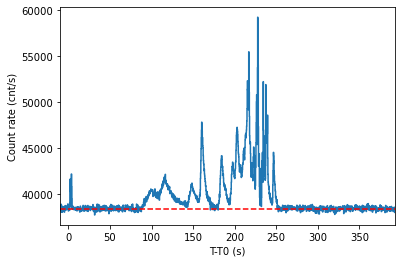

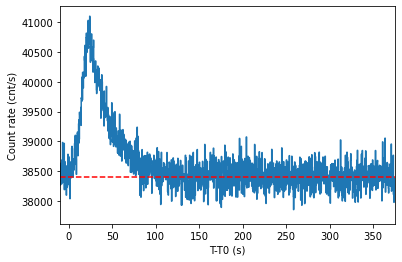

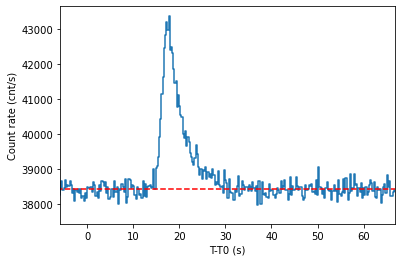

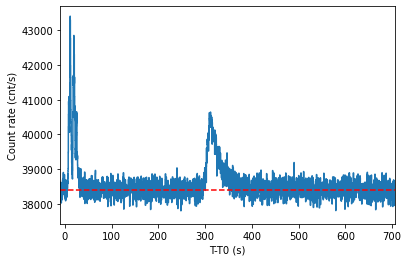

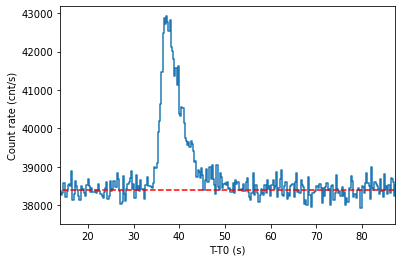

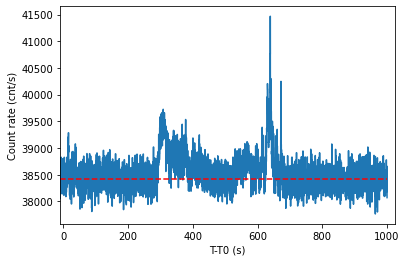

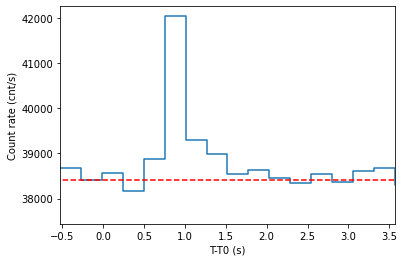

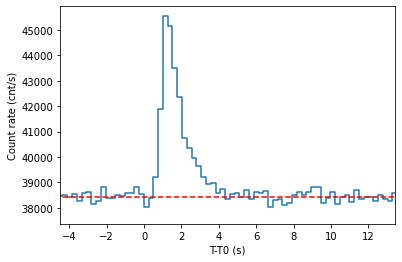

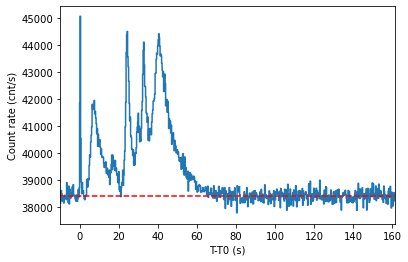

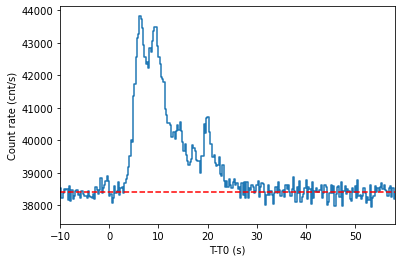

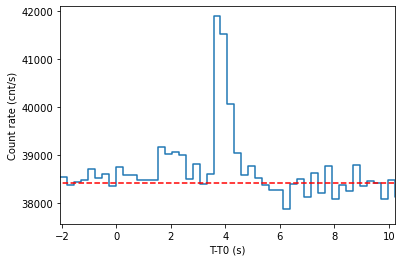

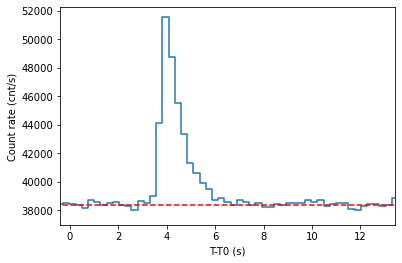

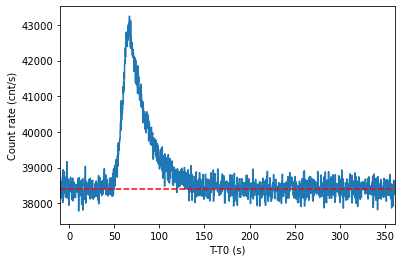

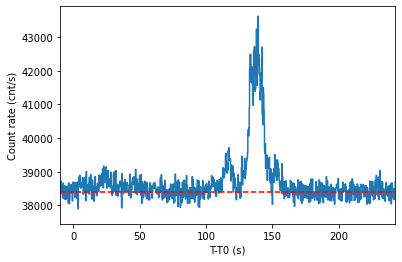

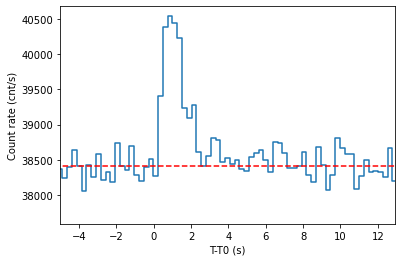

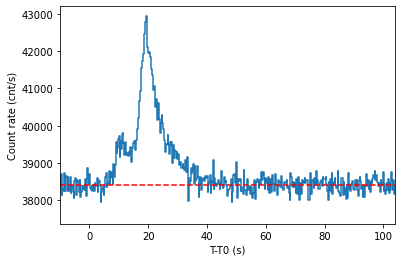

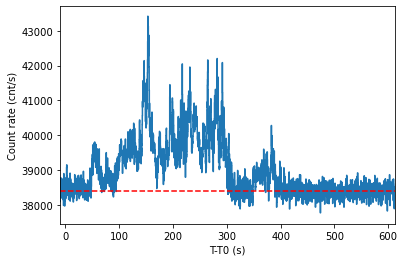

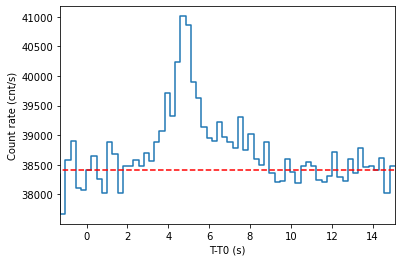

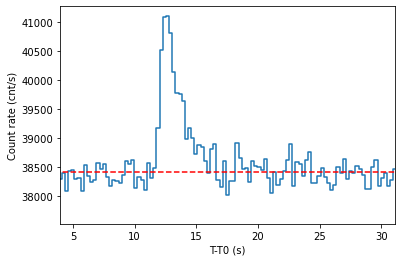

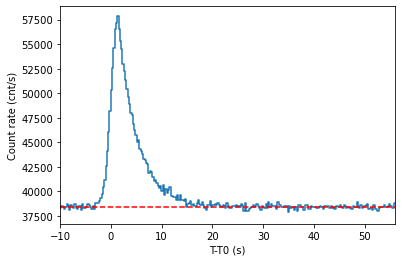

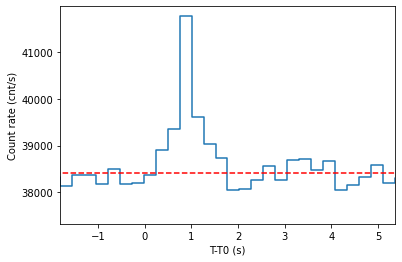

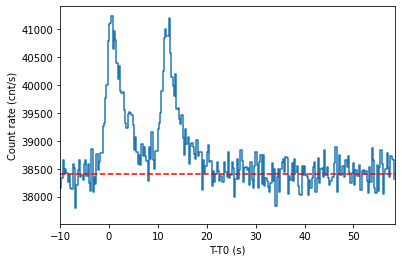

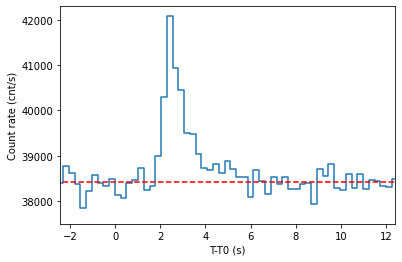

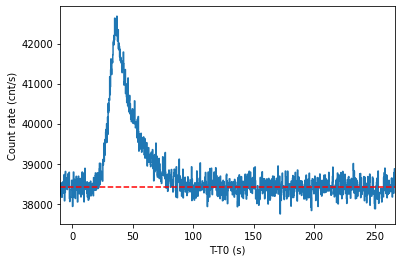

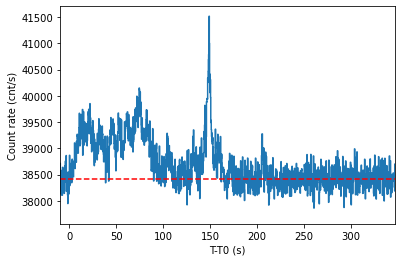

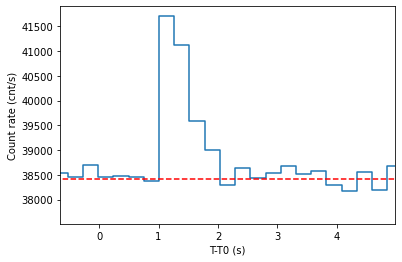

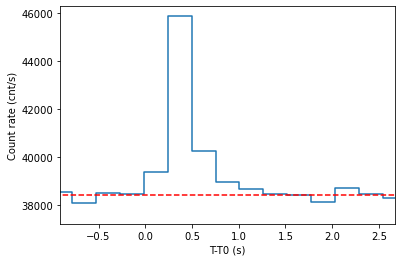

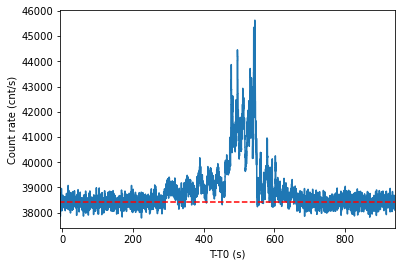

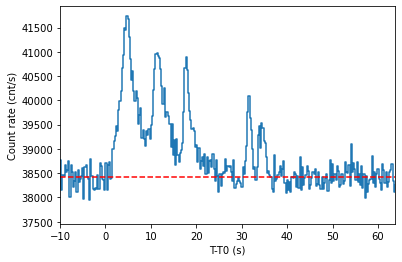

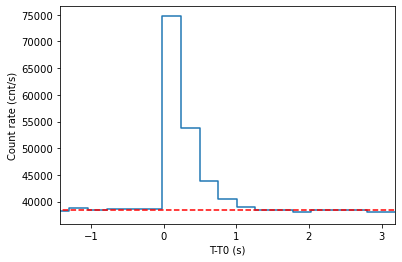

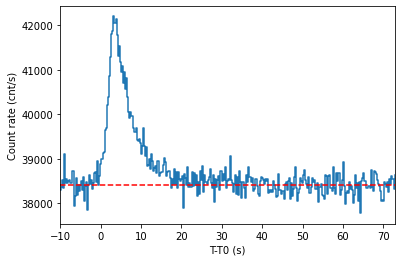

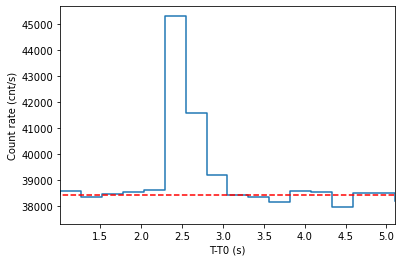

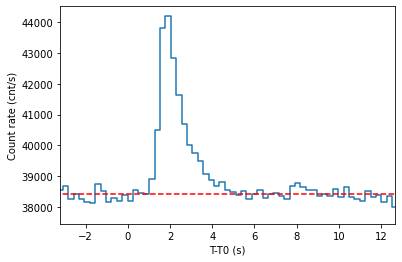

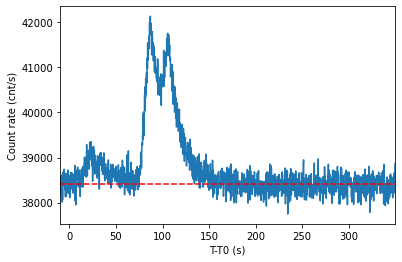

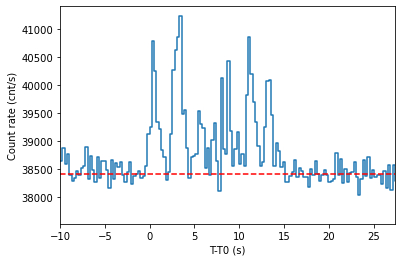

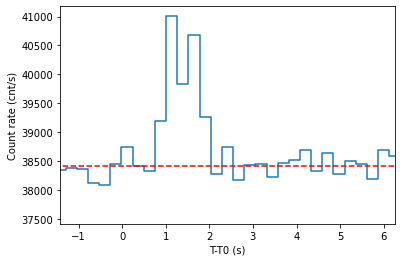

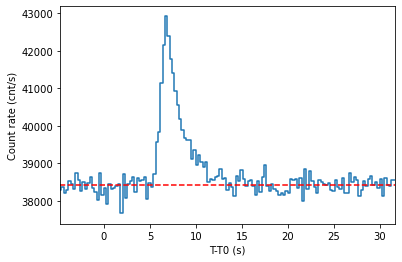

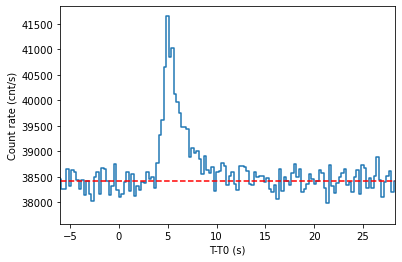

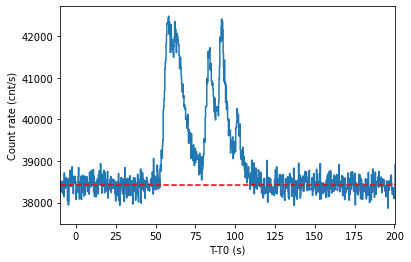

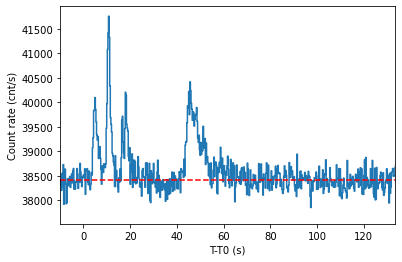

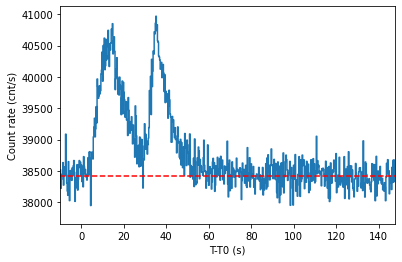

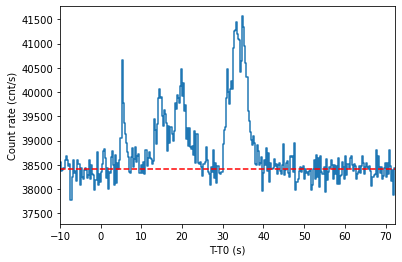

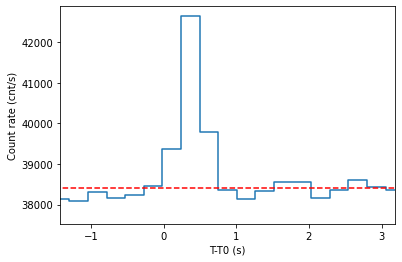

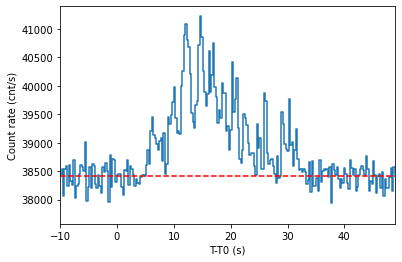

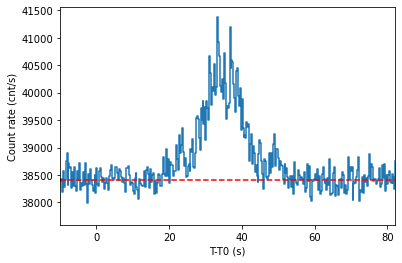

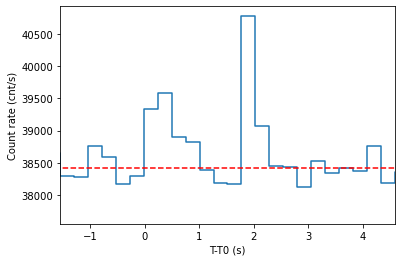

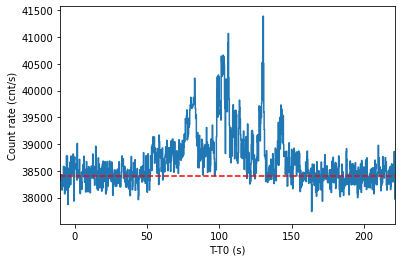

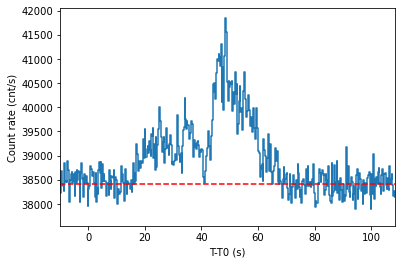

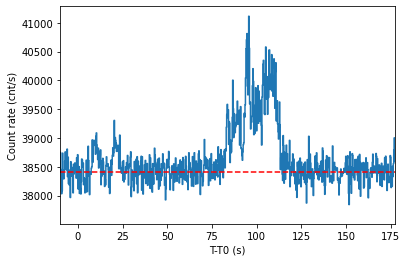

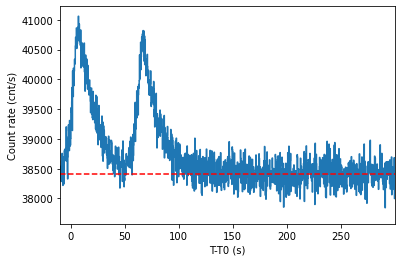

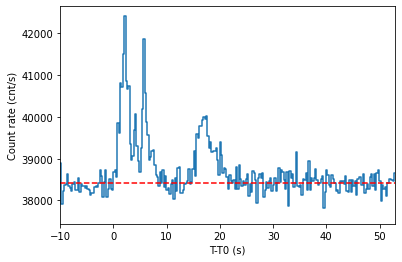

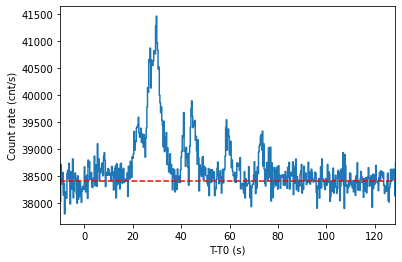

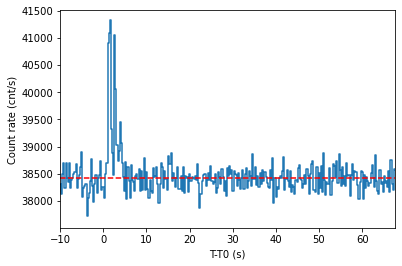

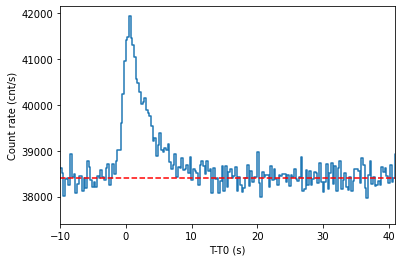

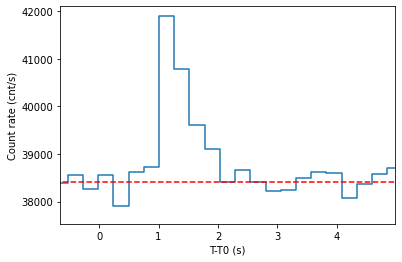

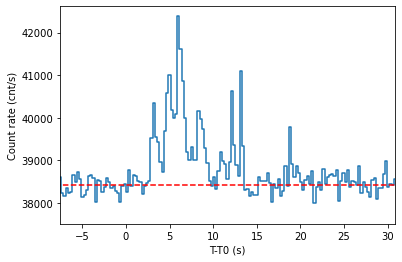

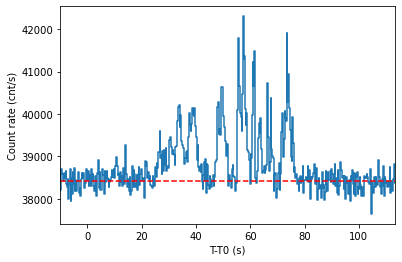

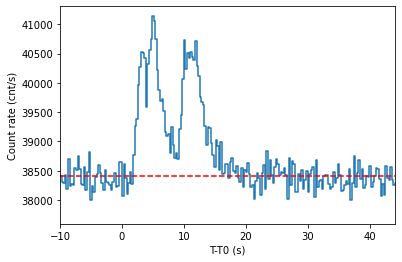

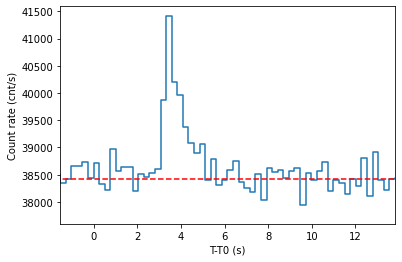

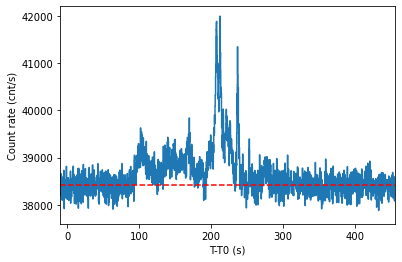

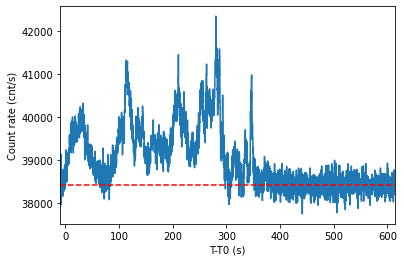

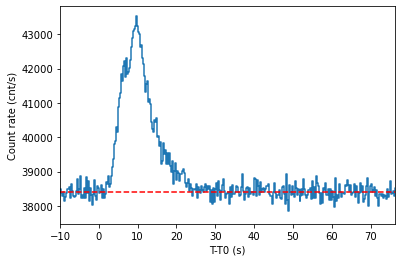

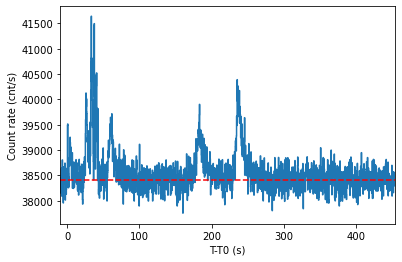

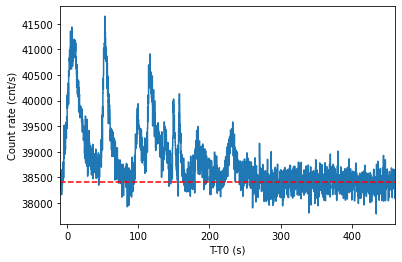

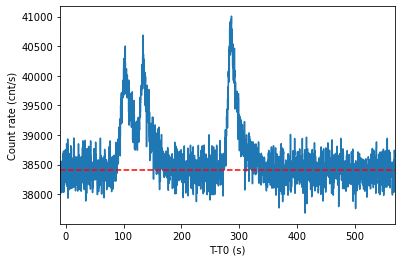

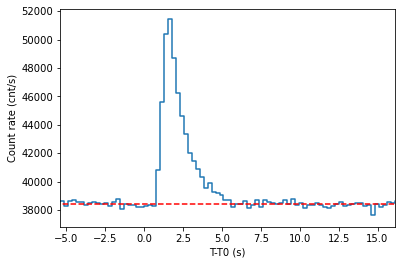

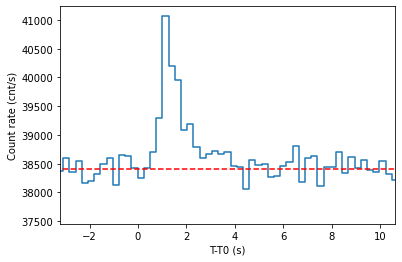

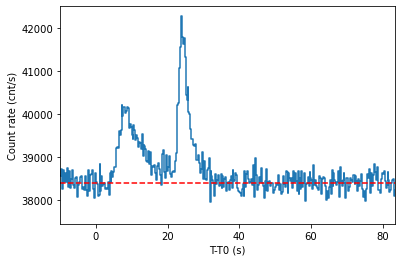

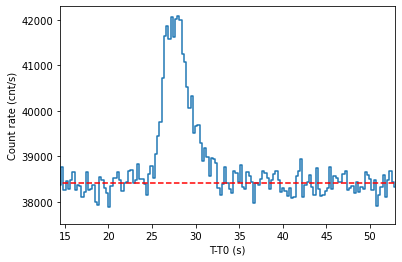

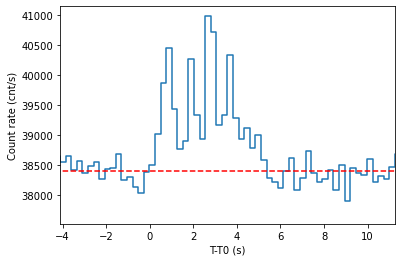

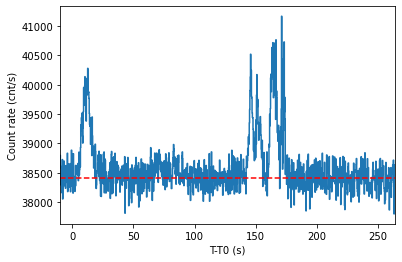

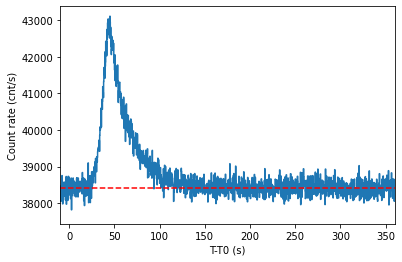

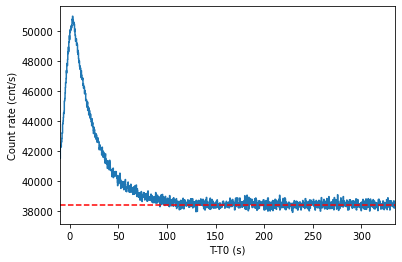

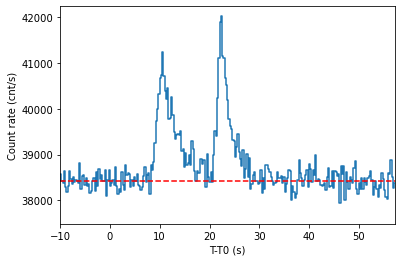

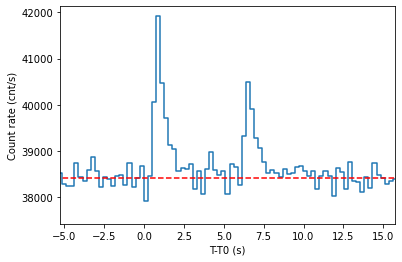

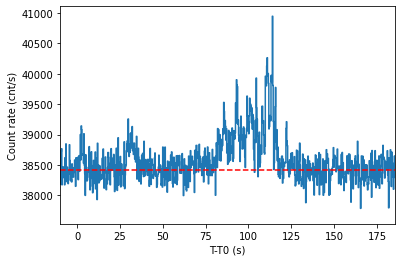

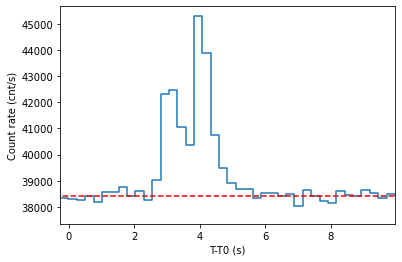

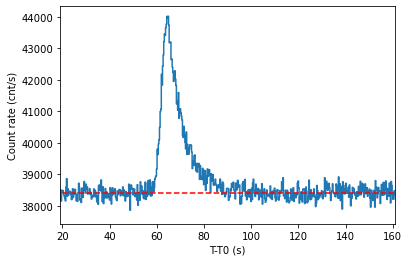

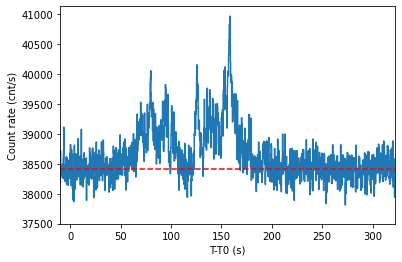

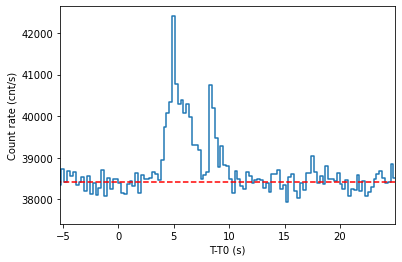

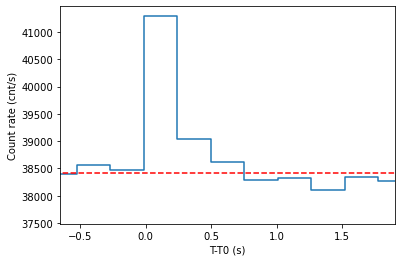

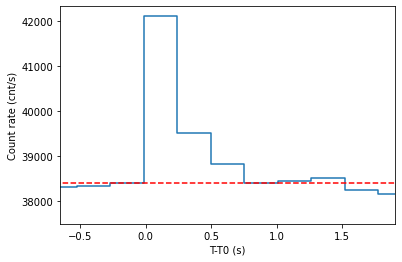

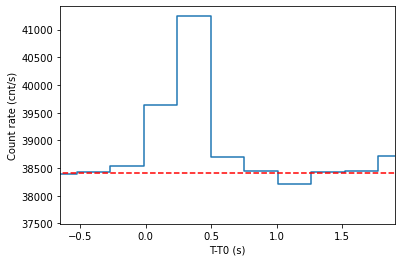

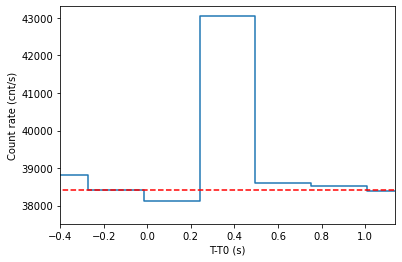

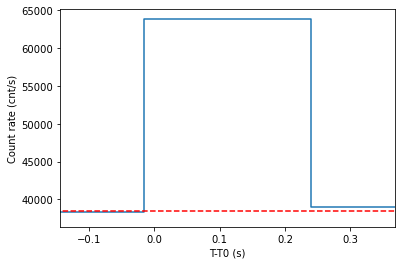

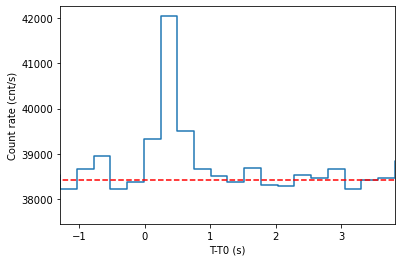

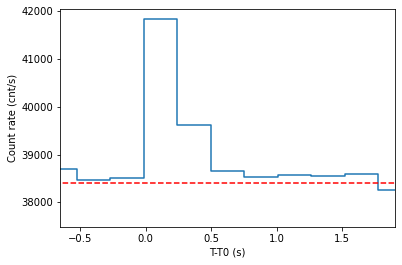

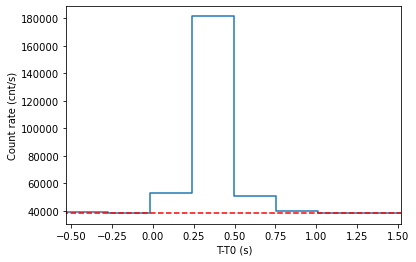

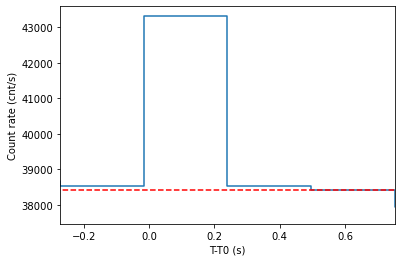

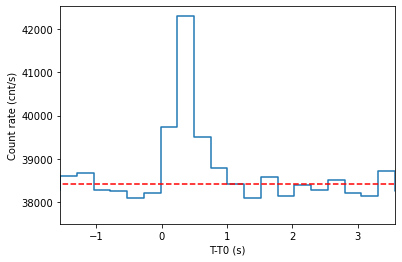

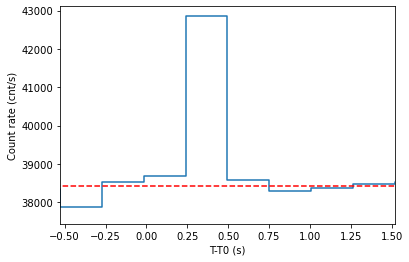

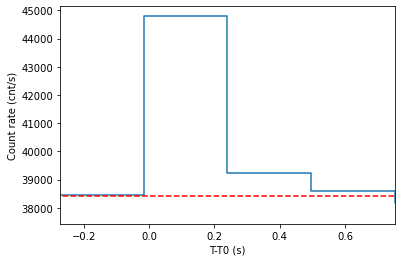

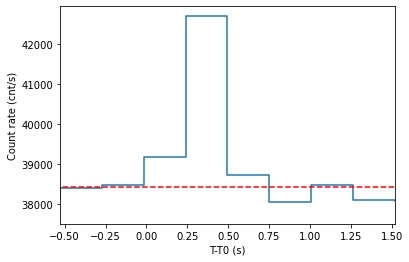

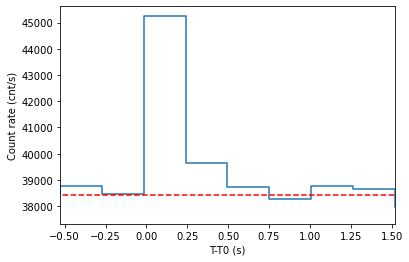

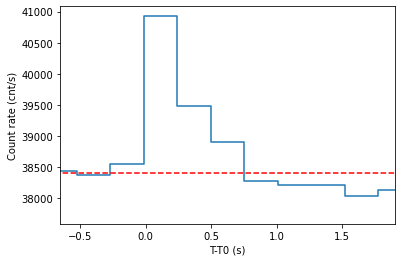

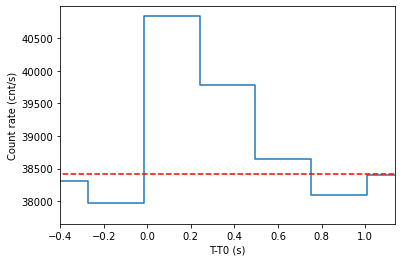

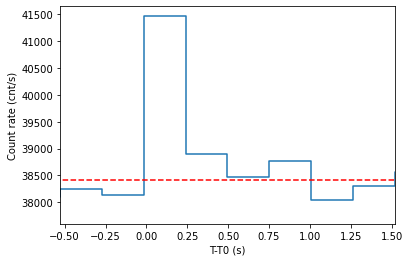

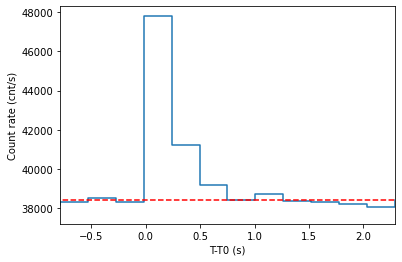

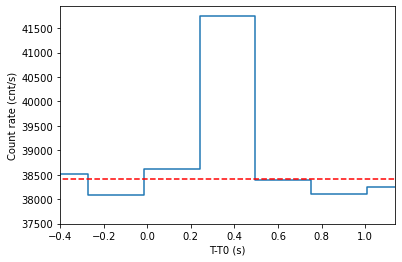

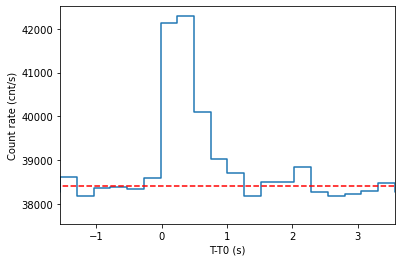

In [5]:
T90 = list()

for name in loaded_data:
    par_list=list(name.values())[0]
    lc=Restored_LC(par_list)
    lc._with_bg=True
    lc.plot_lc()
    T90.append(float(lc.T90[0]))

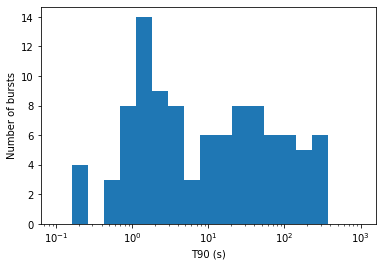

In [4]:
plt.hist(T90, bins=np.geomspace(0.1,1000,20))
plt.xlabel("T90 (s)")
plt.ylabel("Number of bursts")
plt.xscale('log')
plt.show()